<img src="../../images/wt4.png" align="right" width="70"/>

  #     Notebook for early bearing fault detection for WT02



## Table of contents
1. Load Raw filtered signal
2. Extract Optimal Bandwidth Based on SK
3. Read Kurtogram Plots
4. Filter Signal with Optimal Bandpass Based on SK
5. Frequency study: obtain different envelope order spectrums for different narrow-bands

In [1]:
%load_ext autoreload

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os,os.path
from scipy.stats import kurtosis, skew

ROOT_PATH = os.path.abspath("..").split("data_processing")[0]
module_paths = []
module_paths.append(os.path.abspath(os.path.join(ROOT_PATH+"/data_processing/")))
module_paths.append(os.path.abspath(os.path.join(ROOT_PATH+"/hybrid_analysis_process_functions/")))
module_paths.append(os.path.abspath(os.path.join(ROOT_PATH+"/utils/")))
for module_path in module_paths:
    if module_path not in sys.path:
        print("appended")
        sys.path.append(module_path)
%autoreload
import functions as f
import wt_data, ff_transform, explore_fft_time_data, envelope, build_dataset, load_raw_signals, envelope, envelope_emd,plotting_methods
import resample_signals, filter_signals, plotting_methods,filters,correlation_coeff


appended
appended
appended
ROOT /Users/mortenolsenosvik/Documents/NTNU/Master/master-thesis/src
/Users/mortenolsenosvik/Documents/NTNU/Master/master-thesis/src
ROOT /Users/mortenolsenosvik/Documents/NTNU/Master/master-thesis/src
ROOT /Users/mortenolsenosvik/Documents/NTNU/Master/master-thesis/src
ROOT /Users/mortenolsenosvik/Documents/NTNU/Master/master-thesis/src


## 1. Load Raw Filtered signal 

In [3]:
turbine = 'wt02'
vib_signals, times, op_data_intervals, peak_array = load_raw_signals.load_raw('gearbox',turbine)
avg_rpm = np.asarray(op_data_intervals['AvgSpeed'])
avg_power = np.asarray(op_data_intervals['AvgPower'])

wt_date_path = f'/Volumes/OsvikExtra/signal_data/raw_data/gearbox/{turbine}/'
dates = pd.read_csv(f'{wt_date_path}interval_dates_{turbine}.csv')
dates = dates.drop(columns=['Unnamed: 0'])


File exist


In [5]:
# Reading filtered from disk
wt_folder_path = f'/Volumes/OsvikExtra/signal_data/raw_filtered_6000Hz/gearbox/{turbine}/'
filtered_path = f'{wt_folder_path}filtered/'

num_csvs = len([f for f in os.listdir(filtered_path) 
     if f.endswith('.csv') and os.path.isfile(os.path.join(filtered_path, f)) and f[0]=='f'])

filtered_signals = []
filtered_freqs = []
columns = []
for i in range(num_csvs):
    acc=pd.read_csv(filtered_path+'filtered_raw_6000_'+str(i)+'.csv')
    columns.append('filtered_' + str(i))
    filtered_signals.append(acc.values.T[0])
    filtered_freqs.append(acc.shape[0] / times[i][-1])
    print(f'Reading {i+1} / {num_csvs} files', end='\r')

## 2. Extract Optimal Bandwidth Based on SK

In [6]:
# Finding the optimal bandwidth by taking the mean from the SK
fc_and_bw_path = f'{wt_folder_path}center_frequencies_&_bandwidth/fc_and_bw_data.csv'
# Finding the optimal bandwidth by taking the mean from the SK
fc_and_bw_data = pd.read_csv(fc_and_bw_path)
fc_and_bw_data

File   Frequencies   Bandwidths
0      filtered_raw_6000_0.csv   5825.022221    50.000191
1      filtered_raw_6000_1.csv   9600.036621  6400.024414
2     filtered_raw_6000_10.csv   7525.028706    50.000191
3    filtered_raw_6000_100.csv   9600.036621  6400.024414
4    filtered_raw_6000_101.csv   9600.036621  6400.024414
5    filtered_raw_6000_102.csv   9600.036621  6400.024414
6    filtered_raw_6000_103.csv   5825.022221    50.000191
7    filtered_raw_6000_104.csv   9600.036621  6400.024414
8    filtered_raw_6000_105.csv   9600.036621  6400.024414
9    filtered_raw_6000_106.csv   5575.021267    50.000191
10   filtered_raw_6000_107.csv   9600.036621  6400.024414
11   filtered_raw_6000_108.csv   6025.022984    50.000191
12   filtered_raw_6000_109.csv  10675.040722    50.000191
13    filtered_raw_6000_11.csv   7525.028706    50.000191
14   filtered_raw_6000_110.csv   7625.029087    50.000191
15   filtered_raw_6000_111.csv   9600.036621  6400.024414
16   filtered_raw_6000_112.csv   6025.022984    50.000191
17   filtered_raw_6000_113.csv  11125.042439    50.000191
18   filtered_raw_6000_114.csv   9600.036621  6400.024414
19   filtered_raw_6000_115.csv  12375.047207    50.000191
20   filtered_raw_6000_116.csv   9600.036621  6400.024414
21   filtered_raw_6000_117.csv   5625.021458    50.000191
22   filtered_raw_6000_118.csv   9600.036621  6400.024414
23   filtered_raw_6000_119.csv   9600.036621  6400.024414
24    filtered_raw_6000_12.csv   6025.022984    50.000191
25   filtered_raw_6000_120.csv  11625.044346    50.000191
26   filtered_raw_6000_121.csv   9600.036621  6400.024414
27   filtered_raw_6000_122.csv   9600.036621  6400.024414
28   filtered_raw_6000_123.csv   9600.036621  6400.024414
29   filtered_raw_6000_124.csv   9600.036621  6400.024414
..                         ...           ...          ...
389   filtered_raw_6000_72.csv   6025.022984    50.000191
390   filtered_raw_6000_73.csv   5925.022602    50.000191
391   filtered_raw_6000_74.csv   5975.022793    50.000191
392   filtered_raw_6000_75.csv   7475.028515    50.000191
393   filtered_raw_6000_76.csv   9600.036621  6400.024414
394   filtered_raw_6000_77.csv    925.003529    50.000191
395   filtered_raw_6000_78.csv   9600.036621  6400.024414
396   filtered_raw_6000_79.csv   9600.036621  6400.024414
397    filtered_raw_6000_8.csv   9600.036621  6400.024414
398   filtered_raw_6000_80.csv   9600.036621  6400.024414
399   filtered_raw_6000_81.csv   9600.036621  6400.024414
400   filtered_raw_6000_82.csv   9600.036621  6400.024414
401   filtered_raw_6000_83.csv   7275.027752    50.000191
402   filtered_raw_6000_84.csv   5625.021458    50.000191
403   filtered_raw_6000_85.csv   9625.036717    50.000191
404   filtered_raw_6000_86.csv   9600.036621  6400.024414
405   filtered_raw_6000_87.csv   6375.024319    50.000191
406   filtered_raw_6000_88.csv   9600.036621  6400.024414
407   filtered_raw_6000_89.csv   9600.036621  6400.024414
408    filtered_raw_6000_9.csv   9600.036621  6400.024414
409   filtered_raw_6000_90.csv   9600.036621  6400.024414
410   filtered_raw_6000_91.csv  12025.045872    50.000191
411   filtered_raw_6000_92.csv   9600.036621  6400.024414
412   filtered_raw_6000_93.csv   9600.036621  6400.024414
413   filtered_raw_6000_94.csv   8766.700109    66.666921
414   filtered_raw_6000_95.csv   9600.036621  6400.024414
415   filtered_raw_6000_96.csv   9600.036621  6400.024414
416   filtered_raw_6000_97.csv   9600.036621  6400.024414
417   filtered_raw_6000_98.csv   8725.033283    50.000191
418   filtered_raw_6000_99.csv   9600.036621  6400.024414

[419 rows x 3 columns]

Before filter shape: (419, 9)
After filtering: (322, 9)


Unnamed: 0     AvgPower     ActPower  WindSpeed  NacelleDirection  \
0             0   406.781433   431.200012        5.2        208.300003   
1             1  2818.207520  3291.300049       14.2        226.699997   
2             2  2528.062988  2454.500000       10.6        231.699997   
3             3  2500.473145  1772.500000        8.4        284.600006   
4             4   467.837036   441.200012        6.2        322.100006   
5             5  2555.221924  2492.899902        9.0        132.000000   
6             6  1464.688110  3177.500000       15.0        255.600006   
7             7  3065.522217  3304.800049       12.7        245.000000   
8             8  2579.510986  2786.899902       11.3        301.100006   
9             9  2537.796631  2466.000000       10.0        131.500000   
10           10   797.876892   811.099976        6.1        168.199997   
11           11  2588.696533  2586.899902       11.1        229.600006   
12           12  3300.607666  2901.800049        8.3         92.699997   
13           13   525.611084   355.100006        3.5        241.600006   
14           14  2534.070312  2769.000000        9.8        141.899994   
15           15   469.046082   577.500000        5.5        228.300003   
16           16  2595.996338  2209.300049        8.9        100.400002   
17           17  2590.941895  1751.300049        8.0        150.100006   
18           18  2971.055664  2790.300049       11.4        220.000000   
19           19   465.166656   494.100006        5.0        122.199997   
20           20   402.255524   489.100006        6.0        233.300003   
21           21   405.711090   407.600006        4.2        133.899994   
22           22  2643.957520  2466.199951       10.1        130.399994   
23           23  2971.907227  3305.100098       13.3        128.000000   
24           24  2777.726318  3304.699951       15.2        121.900002   
25           25  2374.830078  2769.000000       11.2        151.199997   
26           26  3289.836914  3295.199951       12.1        145.800003   
27           27  2982.870361  3445.600098       10.9        220.300003   
28           28  1144.962891   793.000000        4.6        249.500000   
29           29  2529.151855  3081.000000       11.2        256.399994   
..          ...          ...          ...        ...               ...   
389         389  3291.407227  2639.399902       10.2          0.900000   
390         390   640.342285   713.099976        6.8         82.000000   
391         391  2736.974365  2807.100098       10.7        116.900002   
392         392  3300.692139  3299.899902       12.1        110.699997   
393         393  1593.973999  1612.800049        8.5        116.599998   
394         394  2598.489014  2203.800049        9.2        123.000000   
395         395  2440.544678  2501.699951       11.0        117.900002   
396         396  2594.177734  2941.199951       11.1        122.199997   
397         397  2575.330566  2928.800049        9.2        118.199997   
398         398   433.838470   472.100006        5.5        126.699997   
399         399   413.665314   438.100006        5.5        116.599998   
400         400  2839.760254  2999.899902       10.8        106.500000   
401         401  3300.854004  3284.500000       13.4        116.099998   
402         402  2453.634521  3308.500000       10.1        130.899994   
403         403  3234.853271  3006.399902       10.1        133.899994   
404         404  2539.980713  3013.300049       10.4         26.700001   
405         405  3065.055664  2374.000000        9.2         15.300000   
406         406  3293.955811  3327.000000       15.7        111.500000   
407         407  2391.844727  3265.500000       12.1        117.400002   
408         408  2672.492676  2010.599976        9.6        193.699997   
409         409  2805.544922  3403.300049       25.9        228.800003   
410         410   446.877747   380.899994        4.7        203.500000   
411      

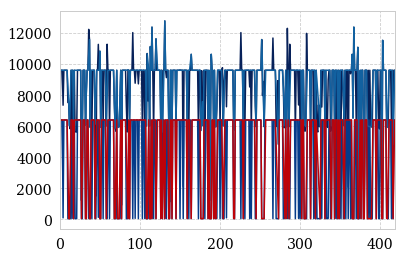

In [7]:
# Make the file column to an int
fc_and_bw_data['File']=fc_and_bw_data['File'].apply(lambda x: int((str(x).split('_'))[3].split('.csv')[0]))
# Sort the df based on this
fc_and_bw_data=fc_and_bw_data.sort_values('File',ascending=True)
fc_and_bw_data = fc_and_bw_data.reset_index(drop=True)

# How the frequencies and bandwidths vary across the intervals for wt:
fc_and_bw_data['Frequencies'].plot()
fc_and_bw_data['Bandwidths'].plot()

op_data_intervals
concated = pd.concat([op_data_intervals, fc_and_bw_data],axis=1)

print(f"Before filter shape: {concated.shape}")
filter_concated = concated.loc[(concated['AvgSpeed'] >= 1400)]
print(f"After filtering: {filter_concated.shape}")
mean_freq = filter_concated['Frequencies'].mean()
mean_bw = filter_concated['Bandwidths'].mean()
filter_concated['Frequencies'].plot()
filter_concated['Bandwidths'].plot()
concated

## 3. Read Kurtogram Plots

In [8]:
# Read kurtogram data
fc_and_bw_path = f'{wt_folder_path}center_frequencies_&_bandwidth/fc_and_bw_data.csv'
frequencies_path = f'{wt_folder_path}center_frequencies_&_bandwidth/frequencies.csv'
file_names_path = f'{wt_folder_path}center_frequencies_&_bandwidth/file_name.txt'

file_names = pd.read_csv(file_names_path, header=None)

frequencies = pd.read_csv(frequencies_path)
frequencies_numpy = np.asarray(frequencies).T
frequencies = pd.DataFrame(frequencies_numpy, columns= frequencies_numpy[0])
frequencies = frequencies.drop(frequencies.index[0]).reset_index(drop=True)

fc_and_bw = pd.read_csv(fc_and_bw_path)
fc_bw_numpy = fc_and_bw.values.T
fc_bw_pd = pd.DataFrame(fc_bw_numpy, columns=fc_bw_numpy[0])
fc_bw_pd = fc_bw_pd.drop(fc_bw_pd.index[0])
fc_bw_pd.insert(0, 'RowName', ['Center Frequency', 'BandWidth'])
fc_bw_pd=fc_bw_pd.set_index('RowName')
fc_bw_pd

filtered_raw_6000_0.csv filtered_raw_6000_1.csv  \
RowName                                                            
Center Frequency                 5825.02                 9600.04   
BandWidth                        50.0002                 6400.02   

                 filtered_raw_6000_10.csv filtered_raw_6000_100.csv  \
RowName                                                               
Center Frequency                  7525.03                   9600.04   
BandWidth                         50.0002                   6400.02   

                 filtered_raw_6000_101.csv filtered_raw_6000_102.csv  \
RowName                                                                
Center Frequency                   9600.04                   9600.04   
BandWidth                          6400.02                   6400.02   

                 filtered_raw_6000_103.csv filtered_raw_6000_104.csv  \
RowName                                                                
Center Frequency                   5825.02                   9600.04   
BandWidth                          50.0002                   6400.02   

                 filtered_raw_6000_105.csv filtered_raw_6000_106.csv  ...  \
RowName                                                               ...   
Center Frequency                   9600.04                   5575.02  ...   
BandWidth                          6400.02                   50.0002  ...   

                 filtered_raw_6000_90.csv filtered_raw_6000_91.csv  \
RowName                                                              
Center Frequency                  9600.04                    12025   
BandWidth                         6400.02                  50.0002   

                 filtered_raw_6000_92.csv filtered_raw_6000_93.csv  \
RowName                                                              
Center Frequency                  9600.04                  9600.04   
BandWidth                         6400.02                  6400.02   

                 filtered_raw_6000_94.csv filtered_raw_6000_95.csv  \
RowName                                                              
Center Frequency                   8766.7                  9600.04   
BandWidth                         66.6669                  6400.02   

                 filtered_raw_6000_96.csv filtered_raw_6000_97.csv  \
RowName                                                              
Center Frequency                  9600.04                  9600.04   
BandWidth                         6400.02                  6400.02   

                 filtered_raw_6000_98.csv filtered_raw_6000_99.csv  
RowName                                                             
Center Frequency                  8725.03                  9600.04  
BandWidth                         50.0002                  6400.02  

[2 rows x 419 columns]

In [8]:
def flip_date(date):
    splitted_date = date.split('-')
    year  = splitted_date[0]
    month = splitted_date[1]
    day   = splitted_date[2].split(' ')[0]
    time  = splitted_date[2].split(' ')[1]
    new_date = day + '.' + month + '.' + year + ' ' + time
    return new_date

Avg Power: 3065.522216797      Avg RPM: 1476.3647345620207


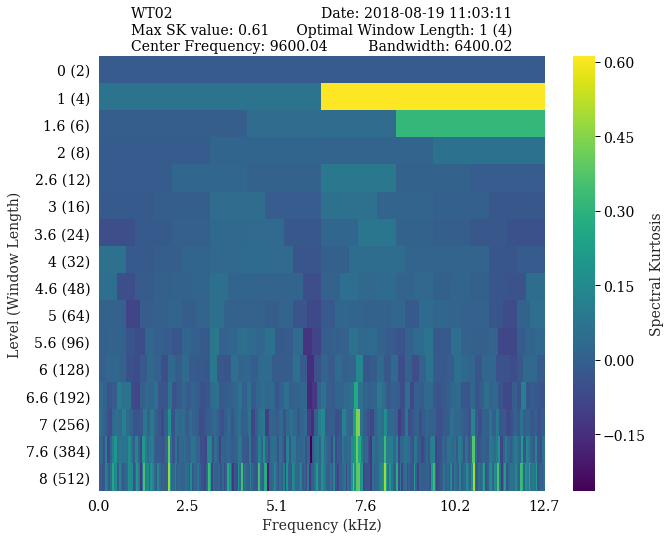

Avg Power: 3297.664794922      Avg RPM: 1467.026007612824


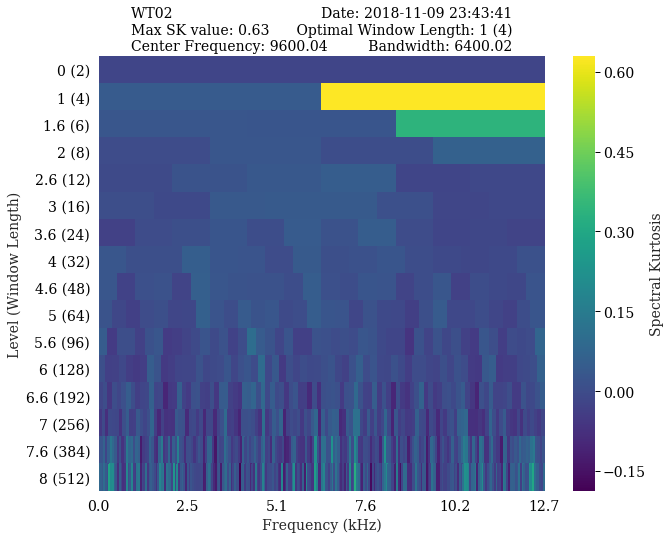

Avg Power: 3129.4033203129998      Avg RPM: 1480.8119753243855


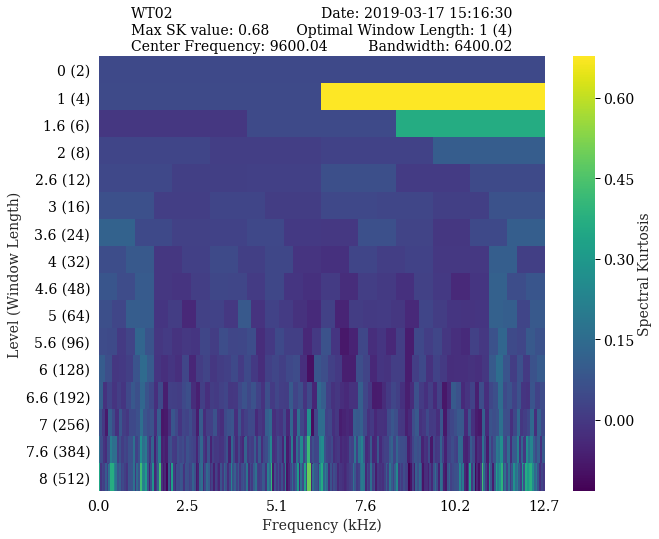

Avg Power: 2968.7744140629998      Avg RPM: 1492.502452604659


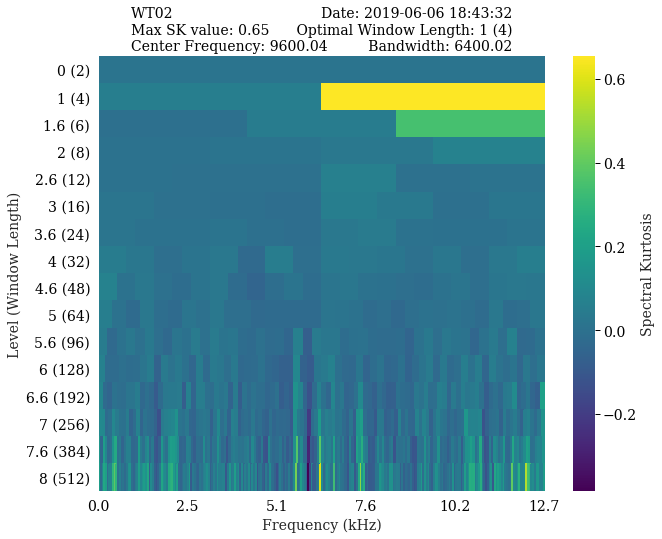

Avg Power: 2911.033203125      Avg RPM: 1518.7996100906214


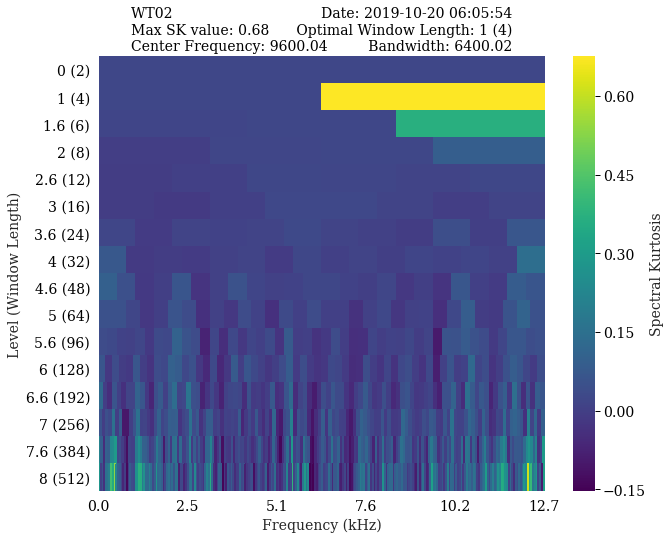

In [12]:
kurt_path = f'{wt_folder_path}kurtograms/';
#save_path = f'{wt_folder_path}kurt_plots/';
save_path = '../../plots/kurt_plots_right_interval/'
wt=turbine
num_csvs = len([f for f in os.listdir(kurt_path) 
     if f.endswith('.csv') and f[0]=='k' and os.path.isfile(os.path.join(kurt_path, f))])

interesting_intervals = [7, 101, 213, 293, 413]

#for i in range(num_csvs):
for i in interesting_intervals:
#    if i < 0:
 #       continue
    if False: #(i > 20 and i < 90) or (i > 110 and i < 290) or (i > 380 and i < 400) or (i > 400):
        continue
    filename = f'kgram_filtered_raw_6000_{i}.csv'
    if avg_power[i] > 2800:
        kurt_file = f'{kurt_path}{filename}'
        kurtogram = pd.read_csv(kurt_file, header=None)
        
        frequency_filename = '_'.join(filename.split('_')[1:])
        
        max_SK = np.max(np.max(kurtogram))
        center_frequency = fc_bw_pd[frequency_filename][0]
        bandwidth = fc_bw_pd[frequency_filename][1]
        highest_window = np.argmax(kurtogram.max(axis=1))
        dato = flip_date(dates.values[i][0])
        name = f'WT02                                 Date: {dato}'
        file_name = f'{save_path}kurt_{turbine}_{i}'

        print(f'Avg Power: {avg_power[i]}      Avg RPM: {avg_rpm[i]}')
        _ = plotting_methods.plot_kurtogram(kurtogram, 
                                        frequencies[frequency_filename], 
                                        file_name=frequency_filename,
                                        max_sk=max_SK,
                                        cf=center_frequency,
                                        bw=bandwidth,
                                        wt=wt,
                                        window=highest_window,
                                        title=name,
                                        save_path=file_name)

        print(f'Plot {i+1} / {num_csvs} created', end='\r')


## 4. Filter Signal with Average Optimal Bandpass Based on SK

In [9]:
# Perform bandpass filtering on the raw signal!
def filter_based_on_optimal_bw(low,high,signal,time,plot=False):
    #use_signal = sig
    #signal = use_signal
    fs, _, _, _ =  envelope.get_sampling_freq(signal, time)
    
    #### Hardcoding the filters
    y = filters.butter_bandpass_filter(signal,low,high,fs)
    if plot:
        plt.plot(signal)
        plt.margins(0)
        plt.xlabel("Samples")
        plt.ylabel("Amplitude")
        plt.show()
        plt.title('Resampled signal with highpass filtering')
        plt.plot(y)
        plt.xlabel("Samples")
        plt.margins(0)
        plt.ylabel("Amplitude")
        plt.title(f'Interval {i} from {turbine} filtered with average optimal bandpass from SK \n Component: Gearbox')
    return y

# Just loop through
optimal_bandpass_signals = []
signal_size = len(filtered_signals)
for i in range(len(filtered_signals)):
    use_signal = filtered_signals[i][0:(len(filtered_signals[i])//2)]
    time = times[i][0:(len(filtered_signals[i])//2)]
    low = mean_freq - mean_bw/4
    high = mean_freq + mean_bw/4
    y = filter_based_on_optimal_bw(low,high,use_signal, time)
    optimal_bandpass_signals.append(y)
    #plotting_methods.plot_fft(time, use_signal, interval_num=i)
    print(f'Filtering {i+1} / {signal_size} signals', end='\r')
#del filtered_signals

## 5. Frequency study (fault characteristics), fault development

### Exploring Envelope Order Spectrums of Different Frequency Ranges
Using 80% of nominal power: only comparing intervals with average power > 2400

### 5.1 Filter Signal with Individual Optimal Bandpass Based on SK

In [10]:
def normalise_fft(fft):
    N = fft.shape[0]
    y = np.abs(fft)[:N // 2] * 1 / N  # Normalized
    return y

In [11]:
fs = 25600

In [12]:
# Just loop through
optimal_bandpass_individual = []
signal_size = len(vib_signals)
for i in range(len(vib_signals)):
    use_signal = vib_signals[i]
    time = times[i]
    cf = float(concated['Frequencies'][i])
    bw = float(concated['Bandwidths'][i])
    low = cf - bw/2
    high = cf + bw/2
    
    #if bw < 100:
    #    low = cf - bw*3
    #    high = cf + bw*3
    if high > 0.5*fs:
        high = 0.5*fs -100
    if i==293:
        print(high, low, cf)
    
    y = filter_based_on_optimal_bw(low,high,use_signal, time)
    optimal_bandpass_individual.append(y)
    #plotting_methods.plot_fft(time, use_signal, interval_num=i)
    print(f'Filtering {i+1} / {signal_size} signals', end='\r')

12700.0 6400.024414155636 9600.03662123345


In [13]:
%autoreload
import ff_transform
import resample

In [14]:
interesting_intervals = [7, 101, 213, 293, 413]
all_fft_res  = []
all_freq_res = []
all_fft      = []
all_freq     = []

#for i, signal in enumerate(optimal_bandpass_individual):
for i in interesting_intervals:
    bw = float(concated['Bandwidths'][i])
    if avg_power[i] < 2400:
        continue
    if True: #i< 50 or i>370: #if bw < 1000 and i<50:# or (i>50 and i<60) or (i > 190 and i < 200)):
        # Plot SK filtered signal
        #plotting_methods.plot_signal(times[i][1:], optimal_bandpass_individual[i],name='SK Filtered', interval_num=i, avg_power=avg_power[i], avg_rpm=avg_rpm[i])
        fft, freq = plotting_methods.plot_fft(times[i][1:], optimal_bandpass_individual[i], name='SK Filtered', interval_num=i, avg_power=avg_power[i], avg_rpm=avg_rpm[i])
        all_fft.append(normalise_fft(fft))
        all_freq.append(freq)
        #Calcutale envelope
        
        highut_lp = 1000
        rectified = abs(optimal_bandpass_individual[i])**2
        bandpass_filtered_rect_lp = filters.butter_lp_filter(rectified, highut_lp, fs, order=5)
        
        #Plot envelope signal
        one_order = avg_rpm[i]/60
        freq=[one_order]
        #plotting_methods.plot_fft(times[i][1:], bandpass_filtered_rect_lp, x_max=100,frequency_lines=freq,name='SK Filtered Envelope', interval_num=i, avg_power=avg_power[i], avg_rpm=avg_rpm[i])
        
        #Calculate Envelope Order
        try:
            x_round, resampled_envelope, x_time = resample_signals.do_cubic_resampling(times[i][1:], bandpass_filtered_rect_lp, peak_array[i], number_of_resample_points=2000)
            fft_res, freq_res = plotting_methods.plot_fft(x_round, resampled_envelope, x_max=15,frequency_lines=[], name='SK Filtered Envelope Order', interval_num=i, avg_power=avg_power[i], avg_rpm=avg_rpm[i])
            all_fft_res.append(normalise_fft(fft_res))
            all_freq_res.append(freq_res)
        except:
            print('---------------------------------------\n\n')
            print(f'              INTERVAL {i}')
            print('ENVELOPE ORDER COULD NOT BE CALCULATED!\n\n')
            print('---------------------------------------')
        print(f'Kurtosis of {i} {kurtosis(optimal_bandpass_individual[i]):.3f}')
        print(f'Center Frequency: {concated["Frequencies"][i]:.3f}')
        print(f'Bandwidth from SK: {concated["Bandwidths"][i]:.3f}')
        print(f'Used Bandwidth: {concated["Bandwidths"][i]*8:.3f}')
        print(f'Used Bandwidth in orders: {concated["Bandwidths"][i]*6*60/avg_rpm[i]:.3f}')

Kurtosis of 7 -0.018
Center Frequency: 9600.037
Bandwidth from SK: 6400.024
Used Bandwidth: 51200.195
Used Bandwidth in orders: 1560.596
Kurtosis of 101 -0.019
Center Frequency: 9600.037
Bandwidth from SK: 6400.024
Used Bandwidth: 51200.195
Used Bandwidth in orders: 1570.530
Kurtosis of 213 0.046
Center Frequency: 9600.037
Bandwidth from SK: 6400.024
Used Bandwidth: 51200.195
Used Bandwidth in orders: 1555.909
Kurtosis of 293 0.013
Center Frequency: 9600.037
Bandwidth from SK: 6400.024
Used Bandwidth: 51200.195
Used Bandwidth in orders: 1543.722
Kurtosis of 413 0.023
Center Frequency: 9600.037
Bandwidth from SK: 6400.024
Used Bandwidth: 51200.195
Used Bandwidth in orders: 1516.993


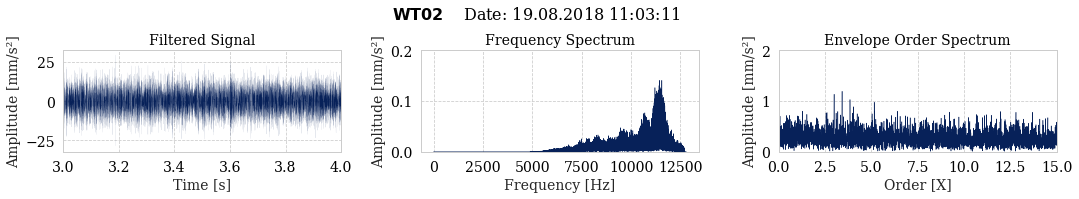

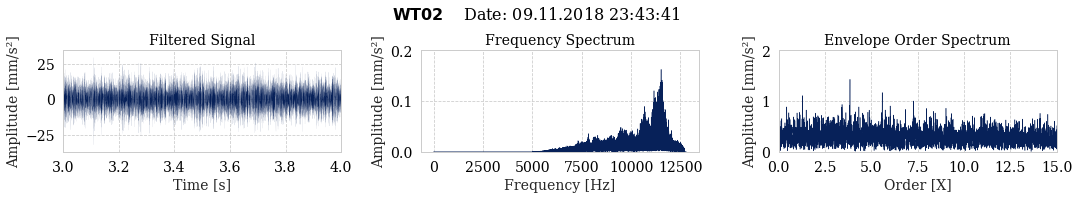

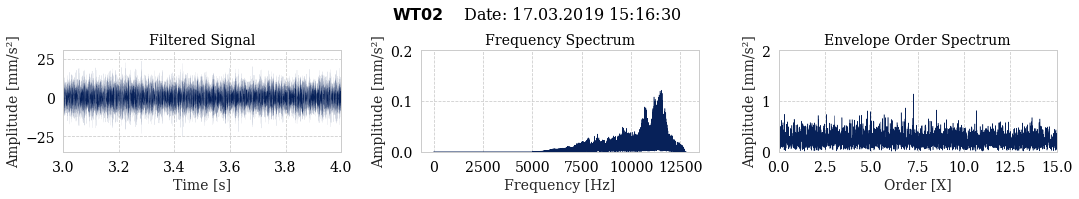

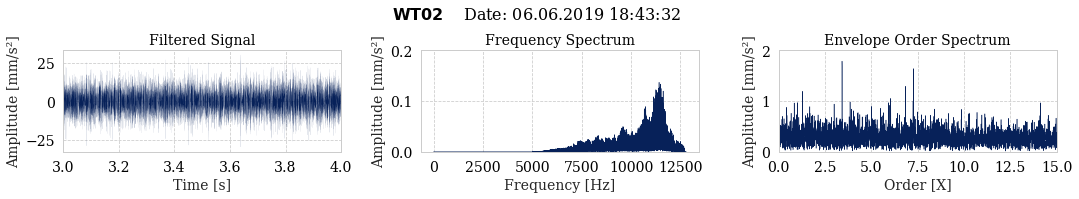

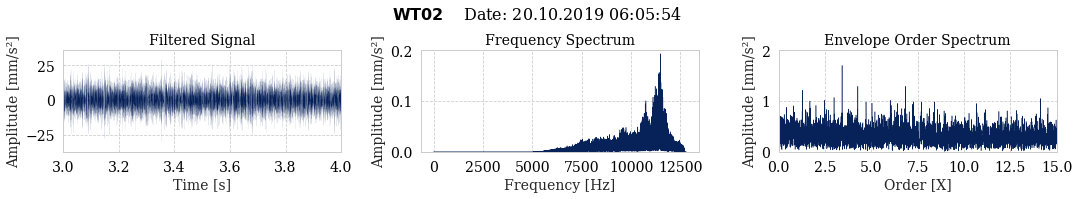

In [15]:
rows = 1
cols = 3
save_path = '../../plots/envelope_order_sk/'

for i, interval in enumerate(interesting_intervals):
    fig, ax = plt.subplots(rows, cols,figsize=(15,2.5))
    dato = flip_date(dates.values[interval][0])
    my_suptitle = fig.suptitle(r"$\bf{WT02}$" + f'    Date: {dato}',fontsize=16, y=1.09)
    
    ax[0].plot(times[interval][0:], optimal_bandpass_individual[interval], linewidth=0.05)
    ax[0].set_title(f"Filtered Signal")
    ax[0].set_ylabel("Amplitude [mm/s\u00b2]")
    ax[0].set_xlabel("Time [s]")
    ax[0].set_xlim(3, 4)

    ax[1].plot(all_freq[i], all_fft[i], linewidth=0.5)
    ax[1].set_title(f"Frequency Spectrum")
    ax[1].set_ylabel("Amplitude [mm/s\u00b2]")
    ax[1].set_xlabel("Frequency [Hz]")
    ax[1].set_ylim(0, 0.2)
    
    ax[2].plot(all_freq_res[i], all_fft_res[i], linewidth=0.5)
    ax[2].set_title(f"Envelope Order Spectrum")
    ax[2].set_ylabel("Amplitude [mm/s\u00b2]")
    ax[2].set_xlabel("Order [X]")
    ax[2].set_xlim(0, 15)
    ax[2].set_ylim(bottom=0)
    ax[2].set_ylim(top=2)


    plt.tight_layout()
    plt.margins(0)
    plt.savefig(f'{save_path}wt02_{interval}.png', dpi=300, bbox_extra_artists=[my_suptitle], bbox_inches='tight')
    plt.show()

### 5.2 Highpass Filter with Lowcut 2500Hz

In [14]:
# Just loop through
bandpassed_2K = []
signal_size = len(vib_signals)
for i in range(len(vib_signals)):
    use_signal = vib_signals[i]
    time = times[i]
    
    low = 2500
    high = 12700

    y = filter_based_on_optimal_bw(low,high,use_signal, time)
    bandpassed_2K.append(y)
    print(f'Filtering {i+1} / {signal_size} signals', end='\r')

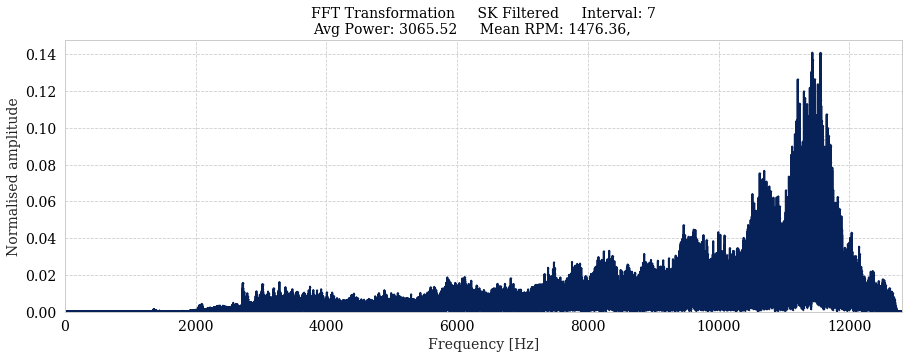

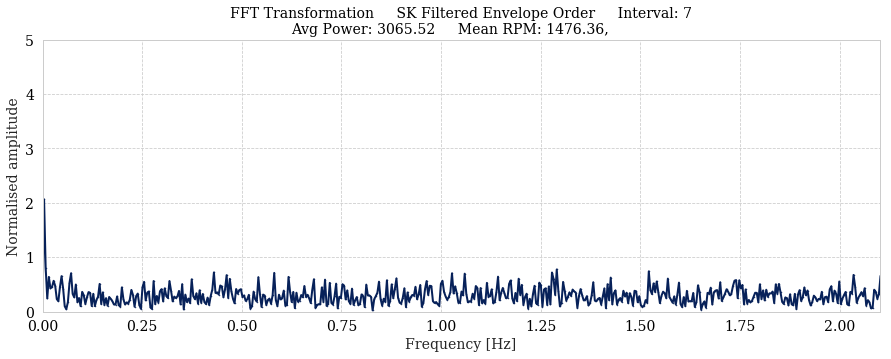

Kurtosis of 7 -0.017
Center Frequency: 2500.000
Used Bandwidth in orders: 16.256


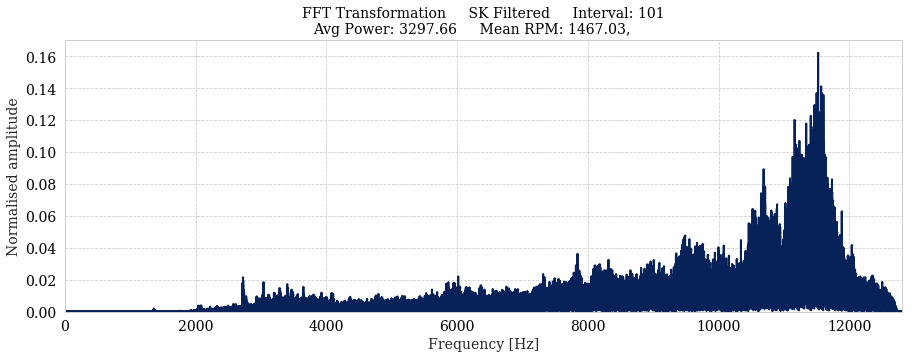

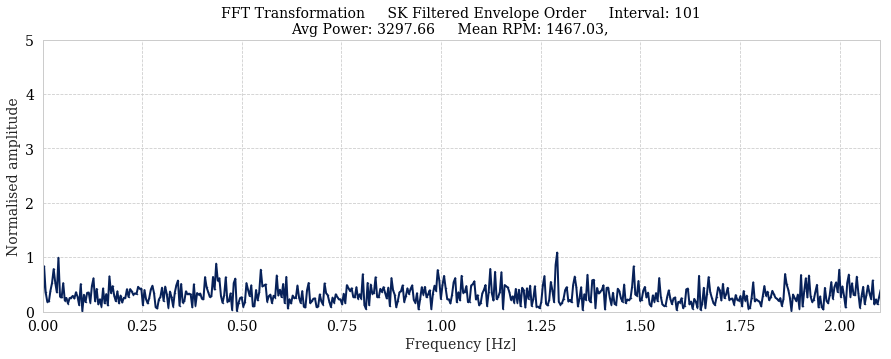

Kurtosis of 101 -0.017
Center Frequency: 2500.000
Used Bandwidth in orders: 16.360


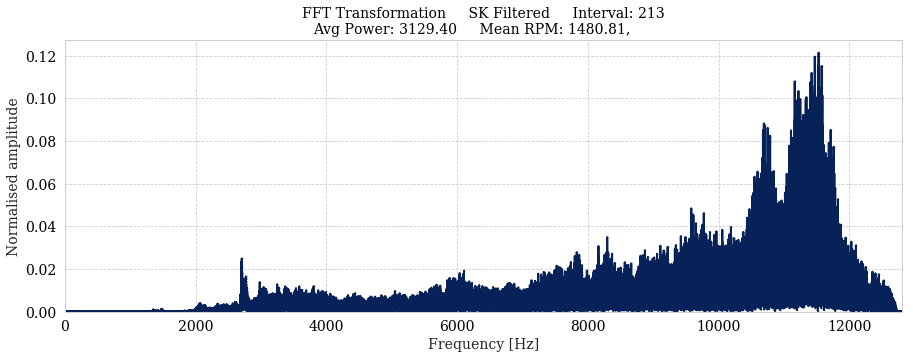

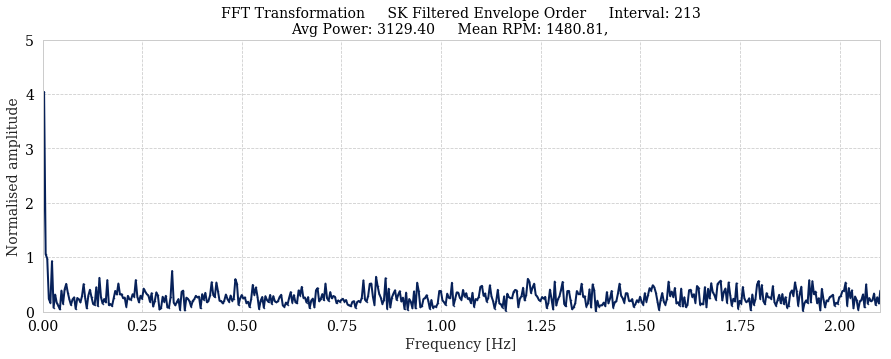

Kurtosis of 213 0.043
Center Frequency: 2500.000
Used Bandwidth in orders: 16.207


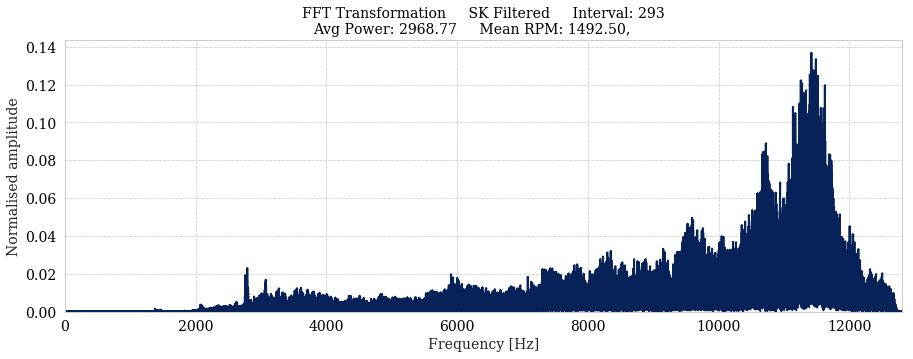

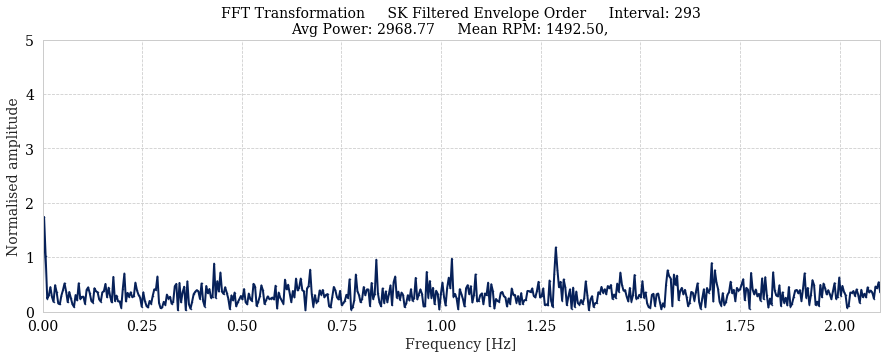

Kurtosis of 293 0.011
Center Frequency: 2500.000
Used Bandwidth in orders: 16.080


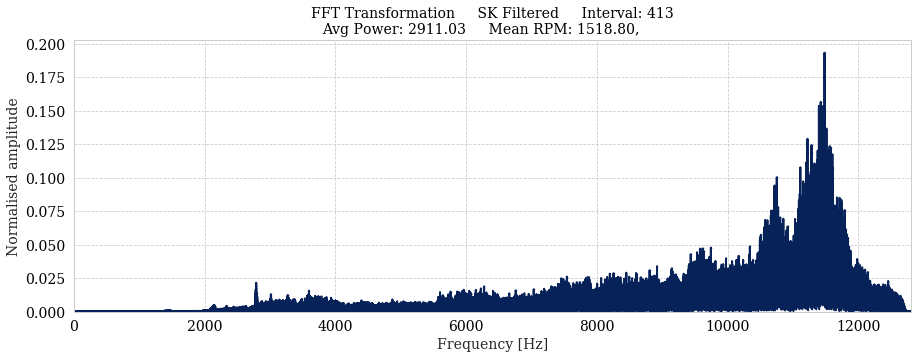

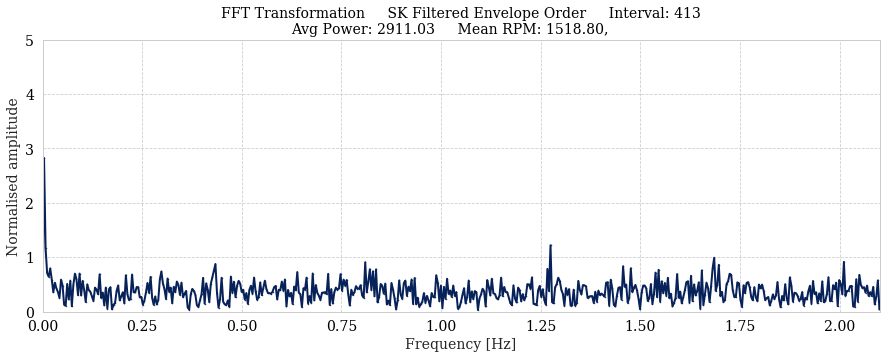

Kurtosis of 413 0.023
Center Frequency: 2500.000
Used Bandwidth in orders: 15.802


In [17]:
interesting_intervals = [7, 101, 213, 293, 413]
bandpassed_signal = bandpassed_2K
cf =2500
ffts = []
fft_times = []

#for i, signal in enumerate(bandpassed_signal):
for i in interesting_intervals:
    if avg_power[i] < 2400:
        continue
    bw = float(concated['Bandwidths'][i])
    if i == 50:
        print('------------------------------------------------\n\n')
        print('               FIRST 50 FINISHED')
        print('\n\n------------------------------------------------')
    if True: #i< 50 or i>370: #bw < 1000 and i<50:# or (i>50 and i<60) or (i > 190 and i < 200)):
        # Plot SK filtered signal
        #plotting_methods.plot_signal(times[i][1:], bandpassed_signal[i],name='SK Filtered', interval_num=i, avg_power=avg_power[i], avg_rpm=avg_rpm[i])
        plotting_methods.plot_fft(times[i][1:], bandpassed_signal[i], name='SK Filtered', interval_num=i, avg_power=avg_power[i], avg_rpm=avg_rpm[i])
        
        #Calcutale envelope
        highut_lp = 1000
        rectified = abs(bandpassed_signal[i])**2
        bandpass_filtered_rect_lp = filters.butter_lp_filter(rectified, highut_lp, fs, order=5)
        
        #Plot envelope signal
        one_order = avg_rpm[i]/60
        freq=[one_order]
        #plotting_methods.plot_fft(times[i][1:], bandpass_filtered_rect_lp, x_max=100,frequency_lines=freq,name='SK Filtered Envelope', interval_num=i, avg_power=avg_power[i], avg_rpm=avg_rpm[i])
        
        #Calculate Envelope Order
        try:
            x_round, resampled_envelope, x_time = resample_signals.do_cubic_resampling(times[i][1:], bandpass_filtered_rect_lp, peak_array[i], number_of_resample_points=2000)
            fft, fft_time = plotting_methods.plot_fft(x_round, resampled_envelope, x_max=2.1, y_max=5,frequency_lines=[], name='SK Filtered Envelope Order', interval_num=i, avg_power=avg_power[i], avg_rpm=avg_rpm[i])
            ffts.append(normalise_fft(fft))
            fft_times.append(fft_time)
        except: #If resampling fails for some reason
            print('---------------------------------------\n\n')
            print(f'              INTERVAL {i}')
            print('ENVELOPE ORDER COULD NOT BE CALCULATED!\n\n')
            print('---------------------------------------')
        
        # Print key values
        print(f'Kurtosis of {i} {kurtosis(bandpassed_signal[i]):.3f}')
        print(f'Center Frequency: {cf:.3f}')
        print(f'Used Bandwidth in orders: {400*60/avg_rpm[i]:.3f}')


In [16]:
path = wt_folder_path + 'high_pass_2500_.npz'
np.savez(path, fft=ffts, freq=fft_times, intervals=interesting_intervals, dates=dates)


### 5.3 Filter on Center Frequency 6400 Hz and Bandwidth 400 Hz 

In [16]:
# Just loop through
bandpassed_6K = []
signal_size = len(filtered_signals)
for i in range(len(filtered_signals)):
    use_signal = filtered_signals[i]
    time = times[i]
    
    cf = 7500
    bw = 50
    low = cf - bw
    high = cf + bw

    if high > 0.5*fs:
        high = 0.5*fs -100    
    
    y = filter_based_on_optimal_bw(low,high,use_signal, time)
    bandpassed_6K.append(y)
    print(f'Filtering {i+1} / {signal_size} signals', end='\r')

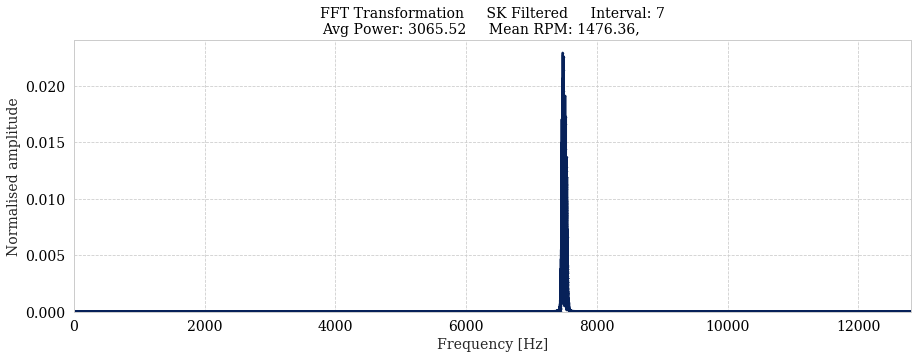

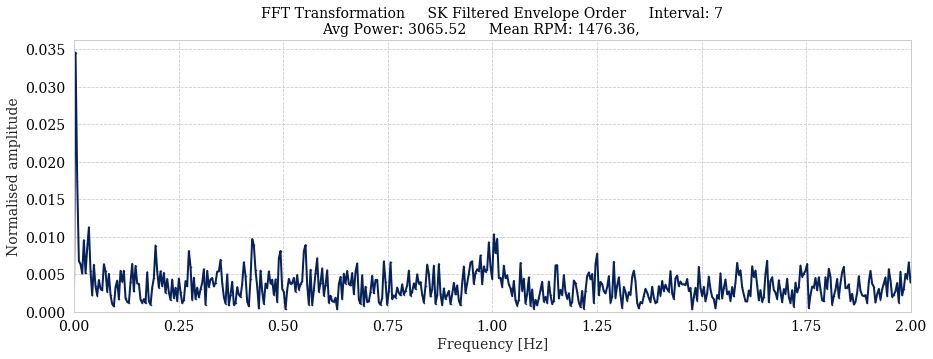

Kurtosis of 7 0.415
Center Frequency: 7500.000
Used Bandwidth in orders: 16.256


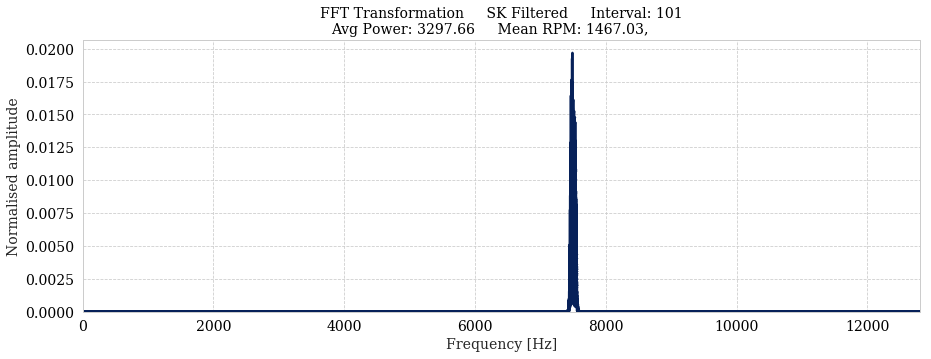

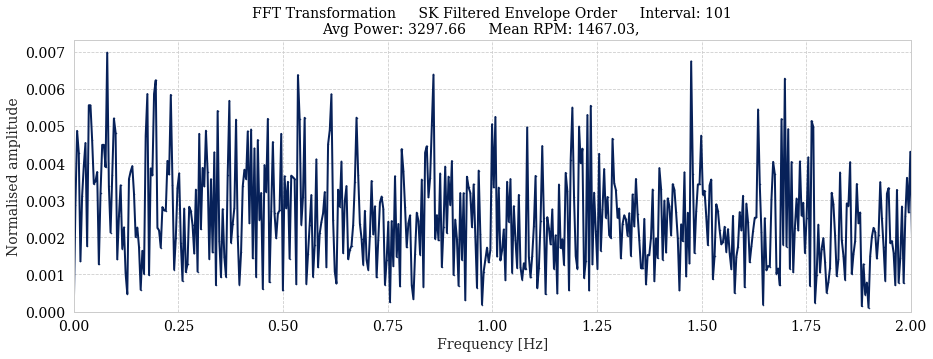

Kurtosis of 101 0.036
Center Frequency: 7500.000
Used Bandwidth in orders: 16.360


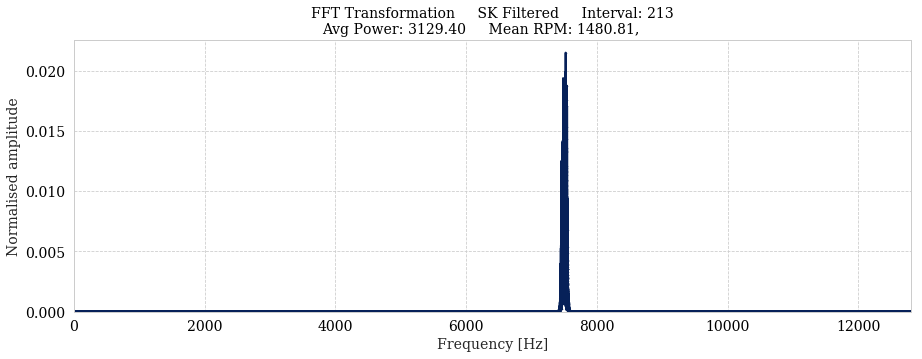

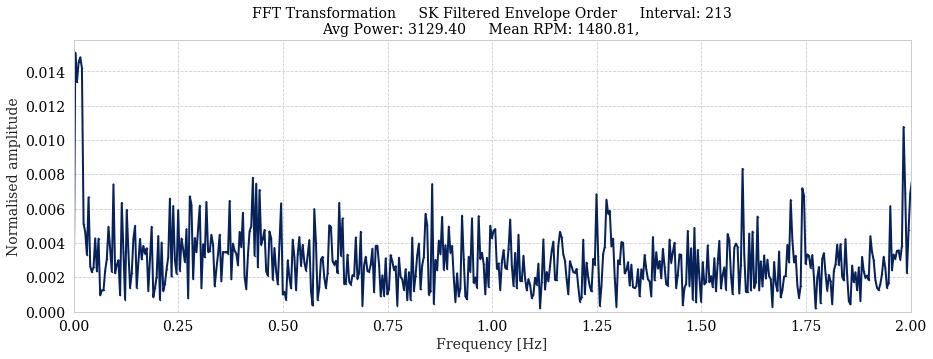

Kurtosis of 213 0.299
Center Frequency: 7500.000
Used Bandwidth in orders: 16.207


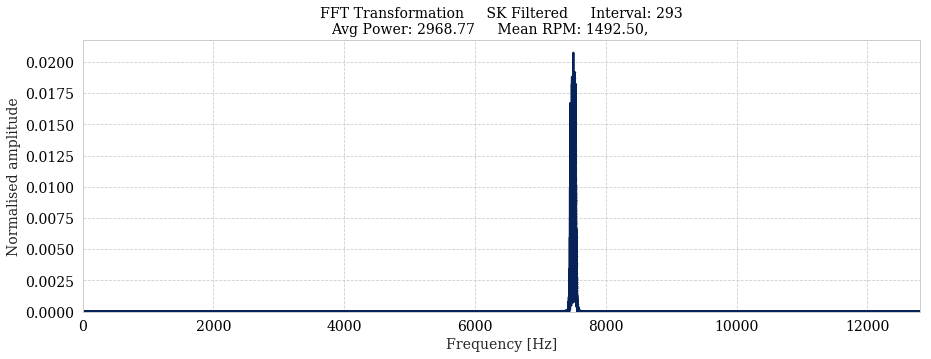

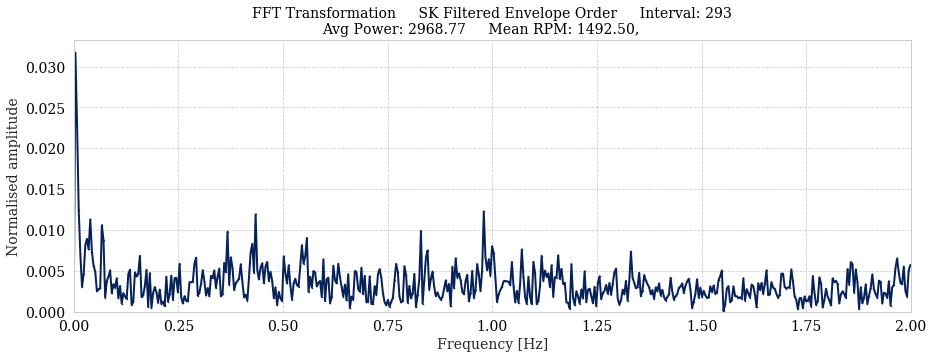

Kurtosis of 293 0.211
Center Frequency: 7500.000
Used Bandwidth in orders: 16.080


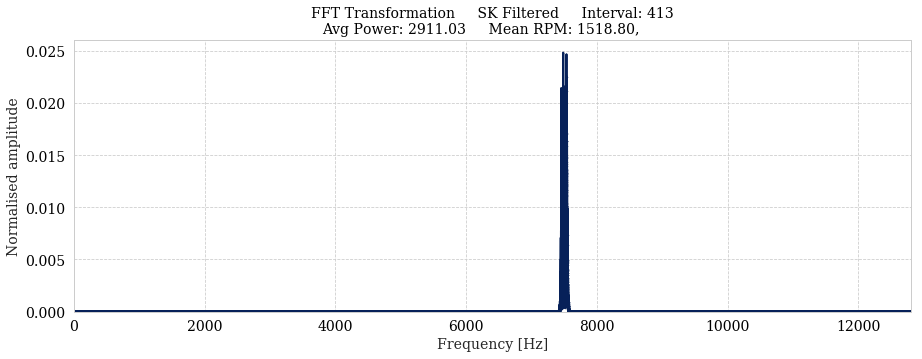

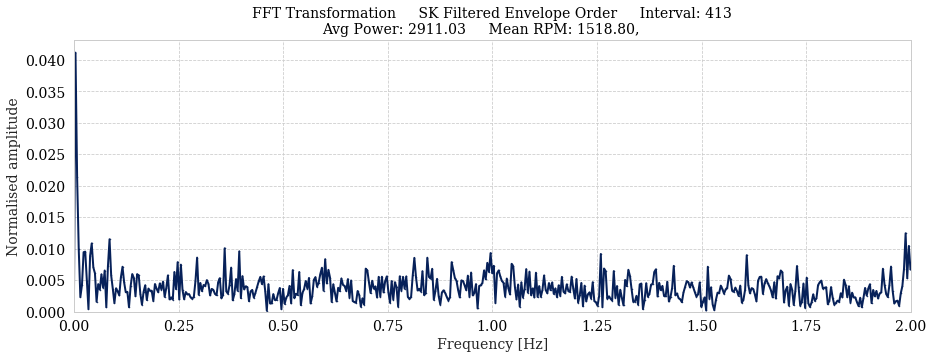

Kurtosis of 413 0.244
Center Frequency: 7500.000
Used Bandwidth in orders: 15.802


In [20]:
interesting_intervals = [7, 101, 213, 293, 413]
bandpassed_signal = bandpassed_6K
ffts = []
fft_times = []

#for i, signal in enumerate(bandpassed_signal):
for i in interesting_intervals:
    if avg_power[i] < 2400:
        continue
    bw = float(concated['Bandwidths'][i])
    if i == 50:
        print('------------------------------------------------\n\n')
        print('               FIRST 50 FINISHED')
        print('\n\n------------------------------------------------')
    if True: #i< 50 or i>370: #bw < 1000 and i<50:# or (i>50 and i<60) or (i > 190 and i < 200)):
        # Plot SK filtered signal
        #plotting_methods.plot_signal(times[i][1:], bandpassed_signal[i],name='SK Filtered', interval_num=i, avg_power=avg_power[i], avg_rpm=avg_rpm[i])
        plotting_methods.plot_fft(times[i][1:], bandpassed_signal[i], name='SK Filtered', interval_num=i, avg_power=avg_power[i], avg_rpm=avg_rpm[i])
        
        #Calcutale envelope
        highut_lp = 1000
        rectified = abs(bandpassed_signal[i])**2
        bandpass_filtered_rect_lp = filters.butter_lp_filter(rectified, highut_lp, fs, order=5)
        
        #Plot envelope signal
        one_order = avg_rpm[i]/60
        freq=[one_order]
        #plotting_methods.plot_fft(times[i][1:], bandpass_filtered_rect_lp, x_max=100,frequency_lines=freq,name='SK Filtered Envelope', interval_num=i, avg_power=avg_power[i], avg_rpm=avg_rpm[i])
        
        #Calculate Envelope Order
        try:
            x_round, resampled_envelope, x_time = resample_signals.do_cubic_resampling(times[i][1:], bandpass_filtered_rect_lp, peak_array[i], number_of_resample_points=2000)
            fft, fft_time = plotting_methods.plot_fft(x_round, resampled_envelope, x_max=2, y_max=None,frequency_lines=[], name='SK Filtered Envelope Order', interval_num=i, avg_power=avg_power[i], avg_rpm=avg_rpm[i])
            ffts.append(normalise_fft(fft))
            fft_times.append(fft_time)
        except: #If resampling fails for some reason
            print('---------------------------------------\n\n')
            print(f'              INTERVAL {i}')
            print('ENVELOPE ORDER COULD NOT BE CALCULATED!\n\n')
            print('---------------------------------------')
        
        # Print key values
        print(f'Kurtosis of {i} {kurtosis(bandpassed_signal[i]):.3f}')
        print(f'Center Frequency: {cf:.3f}')
        print(f'Used Bandwidth in orders: {400*60/avg_rpm[i]:.3f}')


In [21]:
path = wt_folder_path + 'cf_7500_bw_50.npz'
np.savez(path, fft=ffts, freq=fft_times, intervals=interesting_intervals, dates=dates)


### 5.4 Filter on Center Frequency 8 kHz and Bandwidth 400 Hz

In [63]:
# Just loop through
bandpassed_8K = []
signal_size = len(filtered_signals)
for i in range(len(filtered_signals)):
    use_signal = filtered_signals[i]
    time = times[i]
    
    cf = 8000
    bw = 200
    low = cf - bw
    high = cf + bw

    if high > 0.5*fs:
        high = 0.5*fs -100    
    
    y = filter_based_on_optimal_bw(low,high,use_signal, time)
    bandpassed_8K.append(y)
    print(f'Filtering {i+1} / {signal_size} signals', end='\r')

### 5.5 Filter on Center Frequency 9 kHz and Bandwidth 6400 Hz

In [125]:
# Just loop through
bandpassed_9K = []
signal_size = len(vib_signals)
for i in range(len(vib_signals)):
    use_signal = vib_signals[i]
    time = times[i]
    
    cf = 9000
    bw = 6400/2
    low = cf - bw
    high = cf + bw

    if high > 0.5*fs:
        high = 0.5*fs -100    
    
    y = filter_based_on_optimal_bw(low,high,use_signal, time)
    bandpassed_9K.append(y)
    print(f'Filtering {i+1} / {signal_size} signals', end='\r')

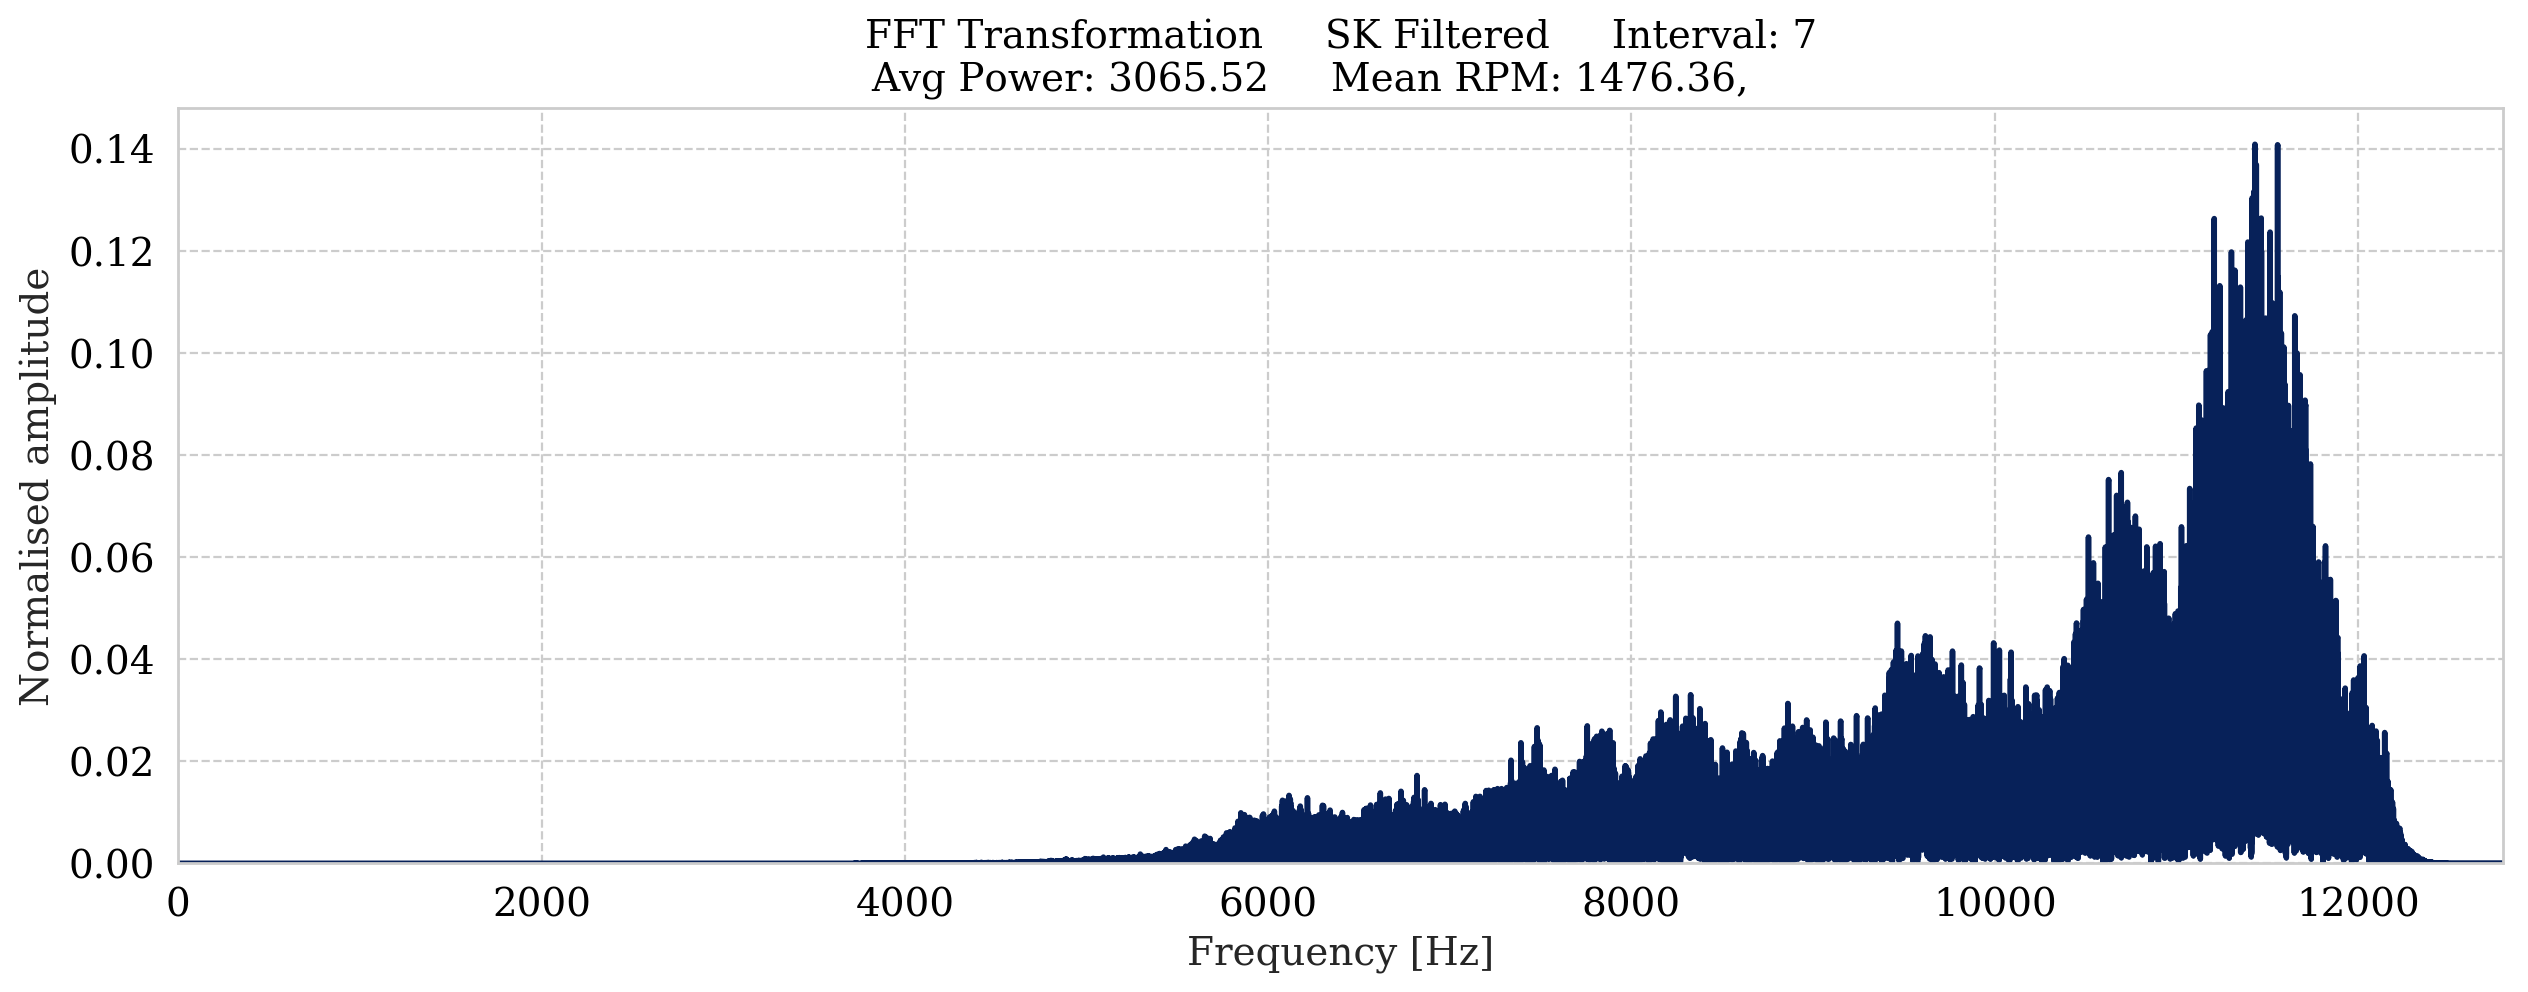

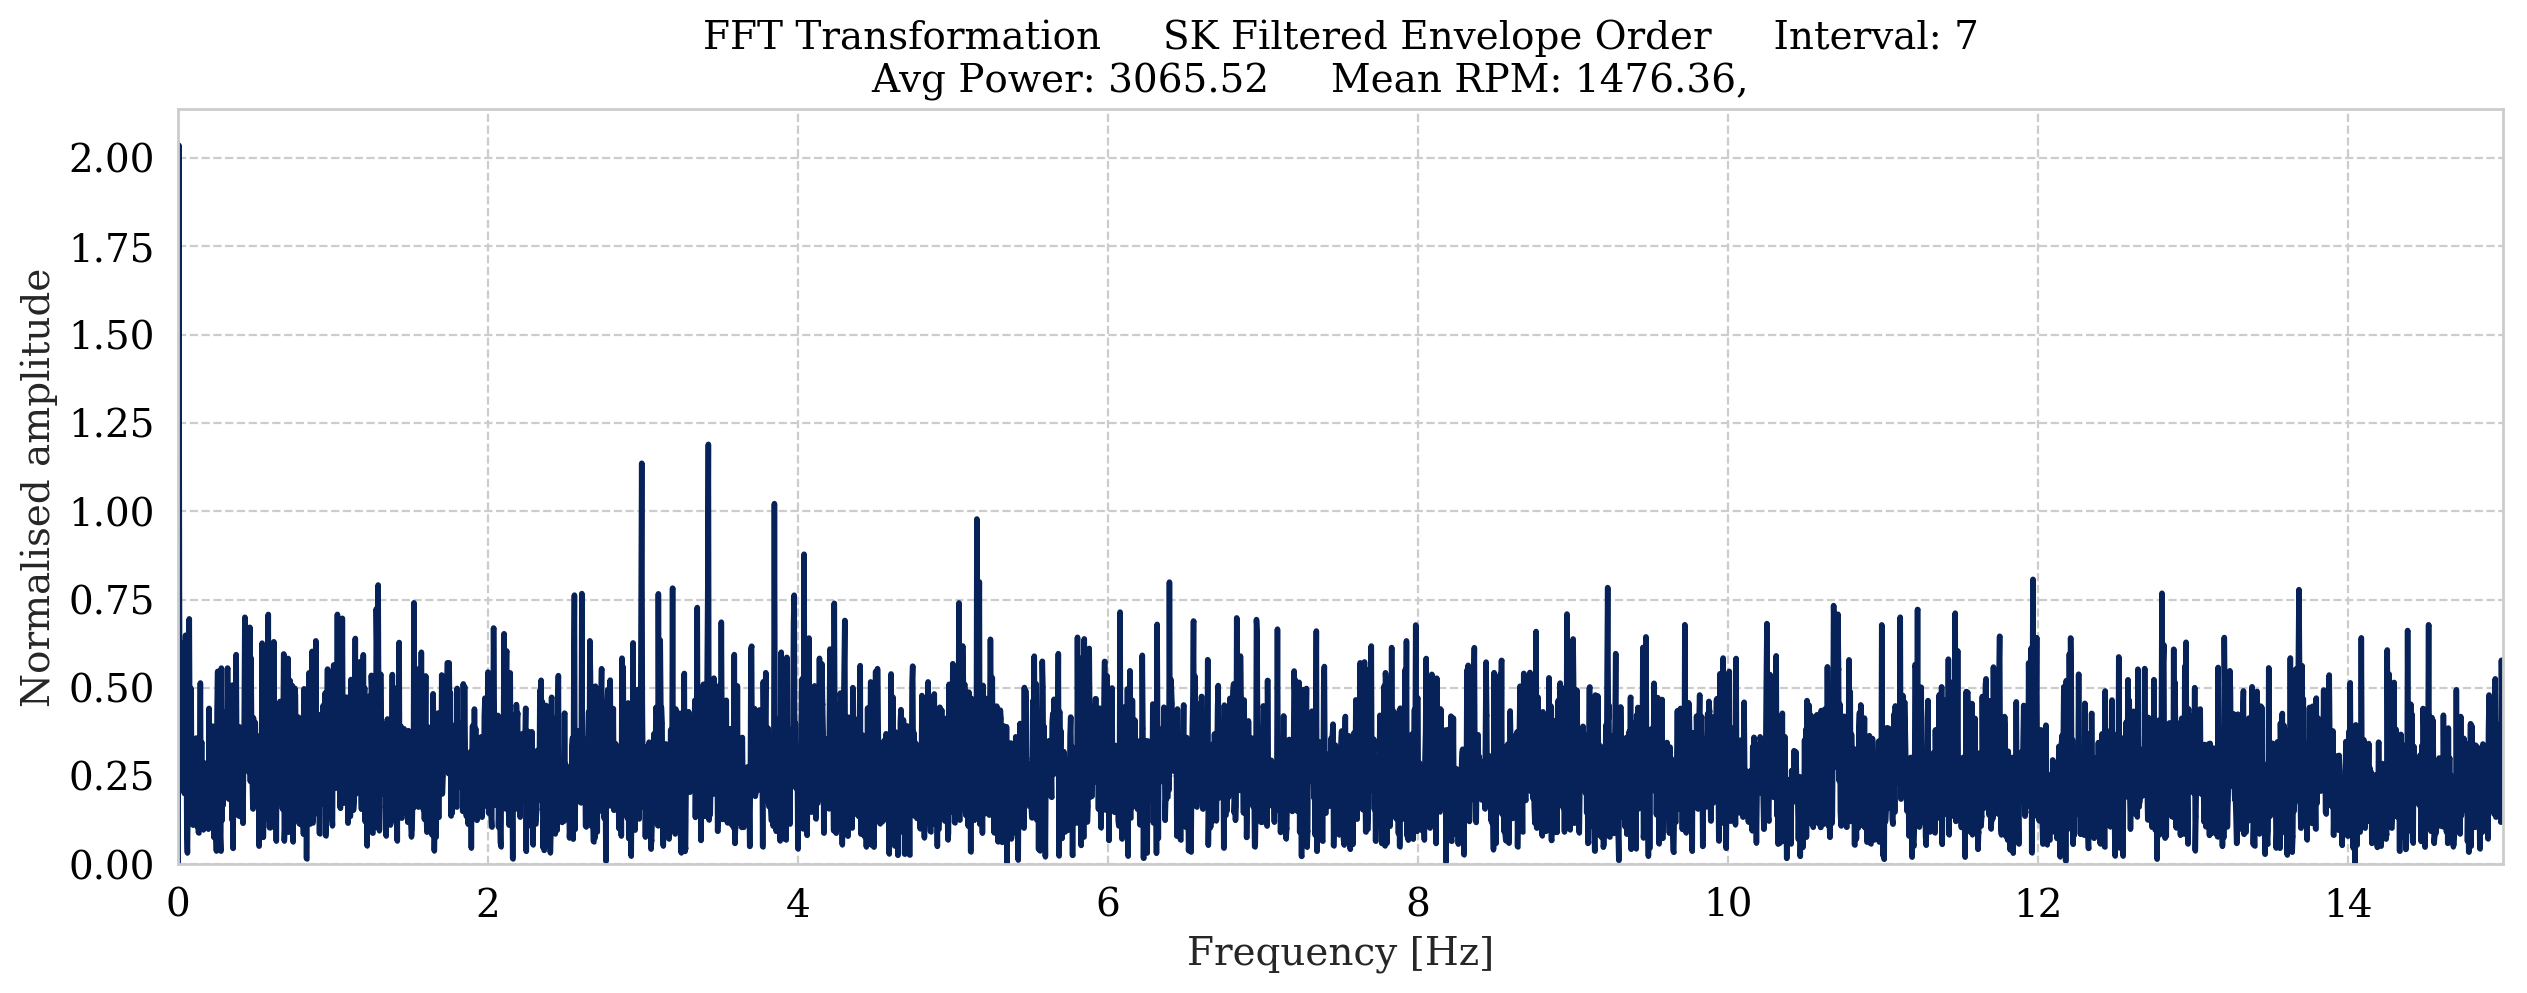

Kurtosis of 7 -0.020
Center Frequency: 9000.000
Used Bandwidth in orders: 16.256


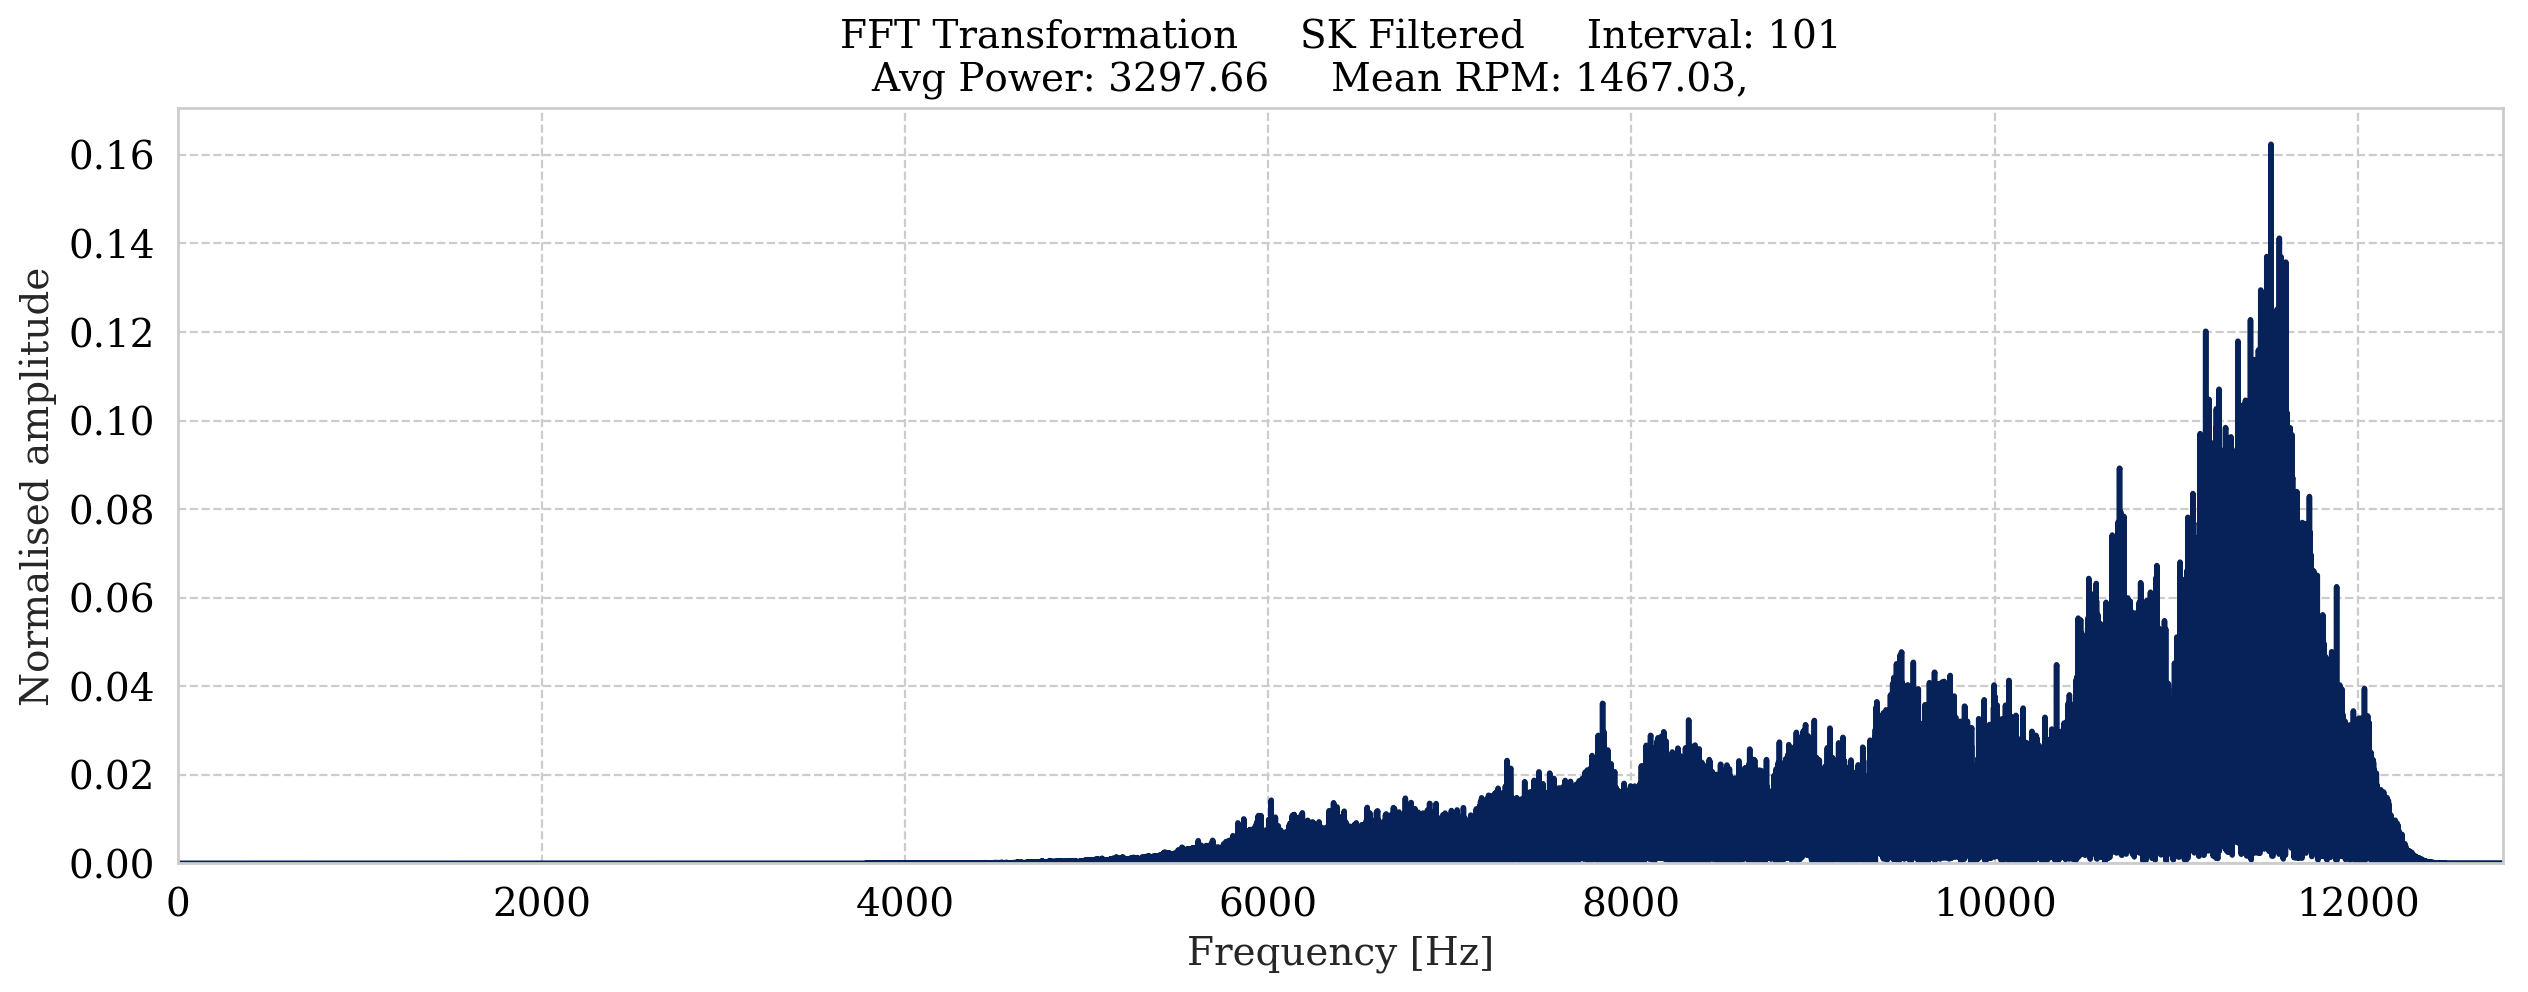

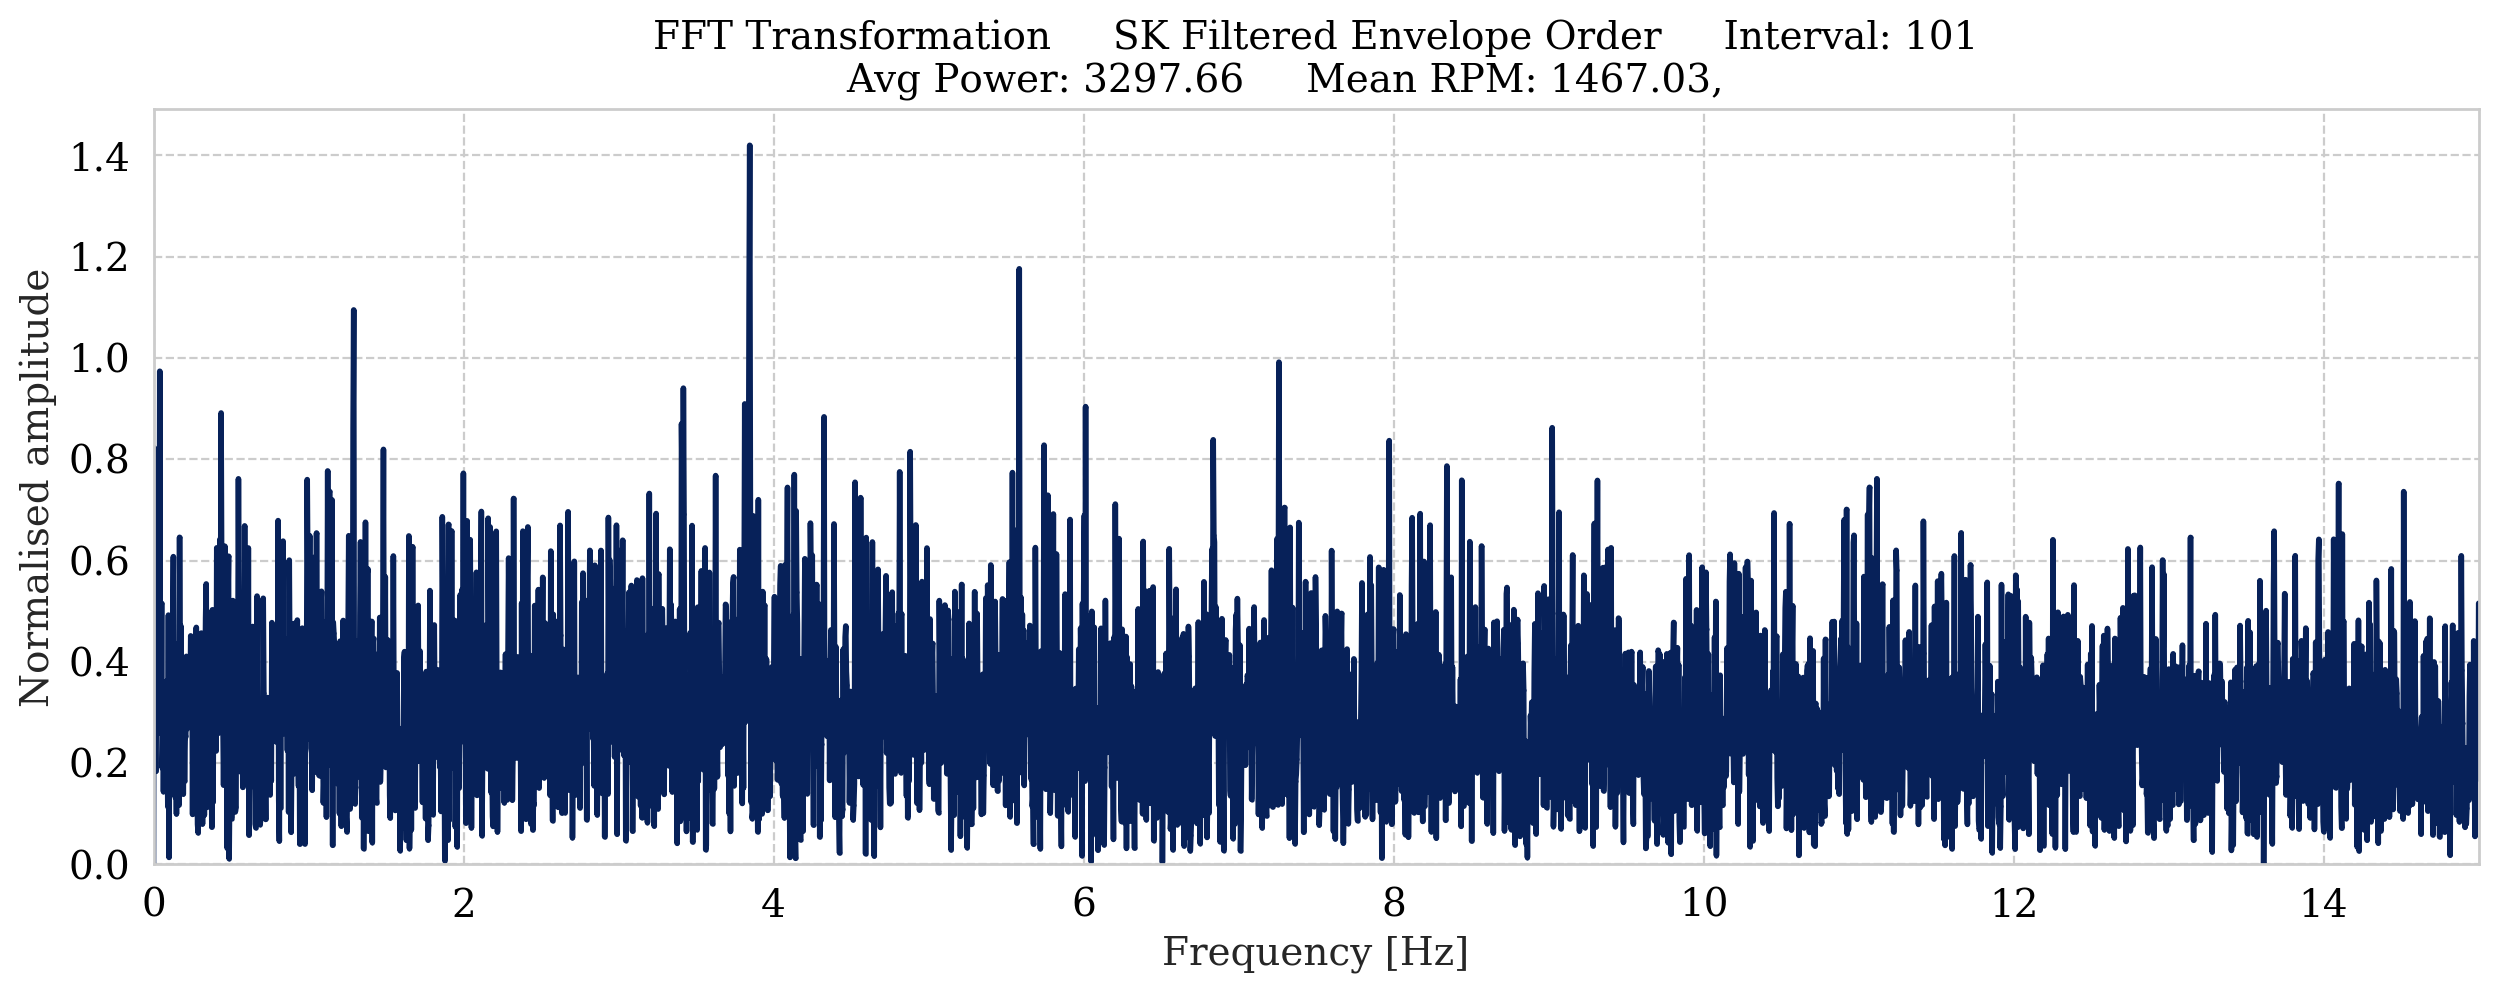

Kurtosis of 101 -0.017
Center Frequency: 9000.000
Used Bandwidth in orders: 16.360


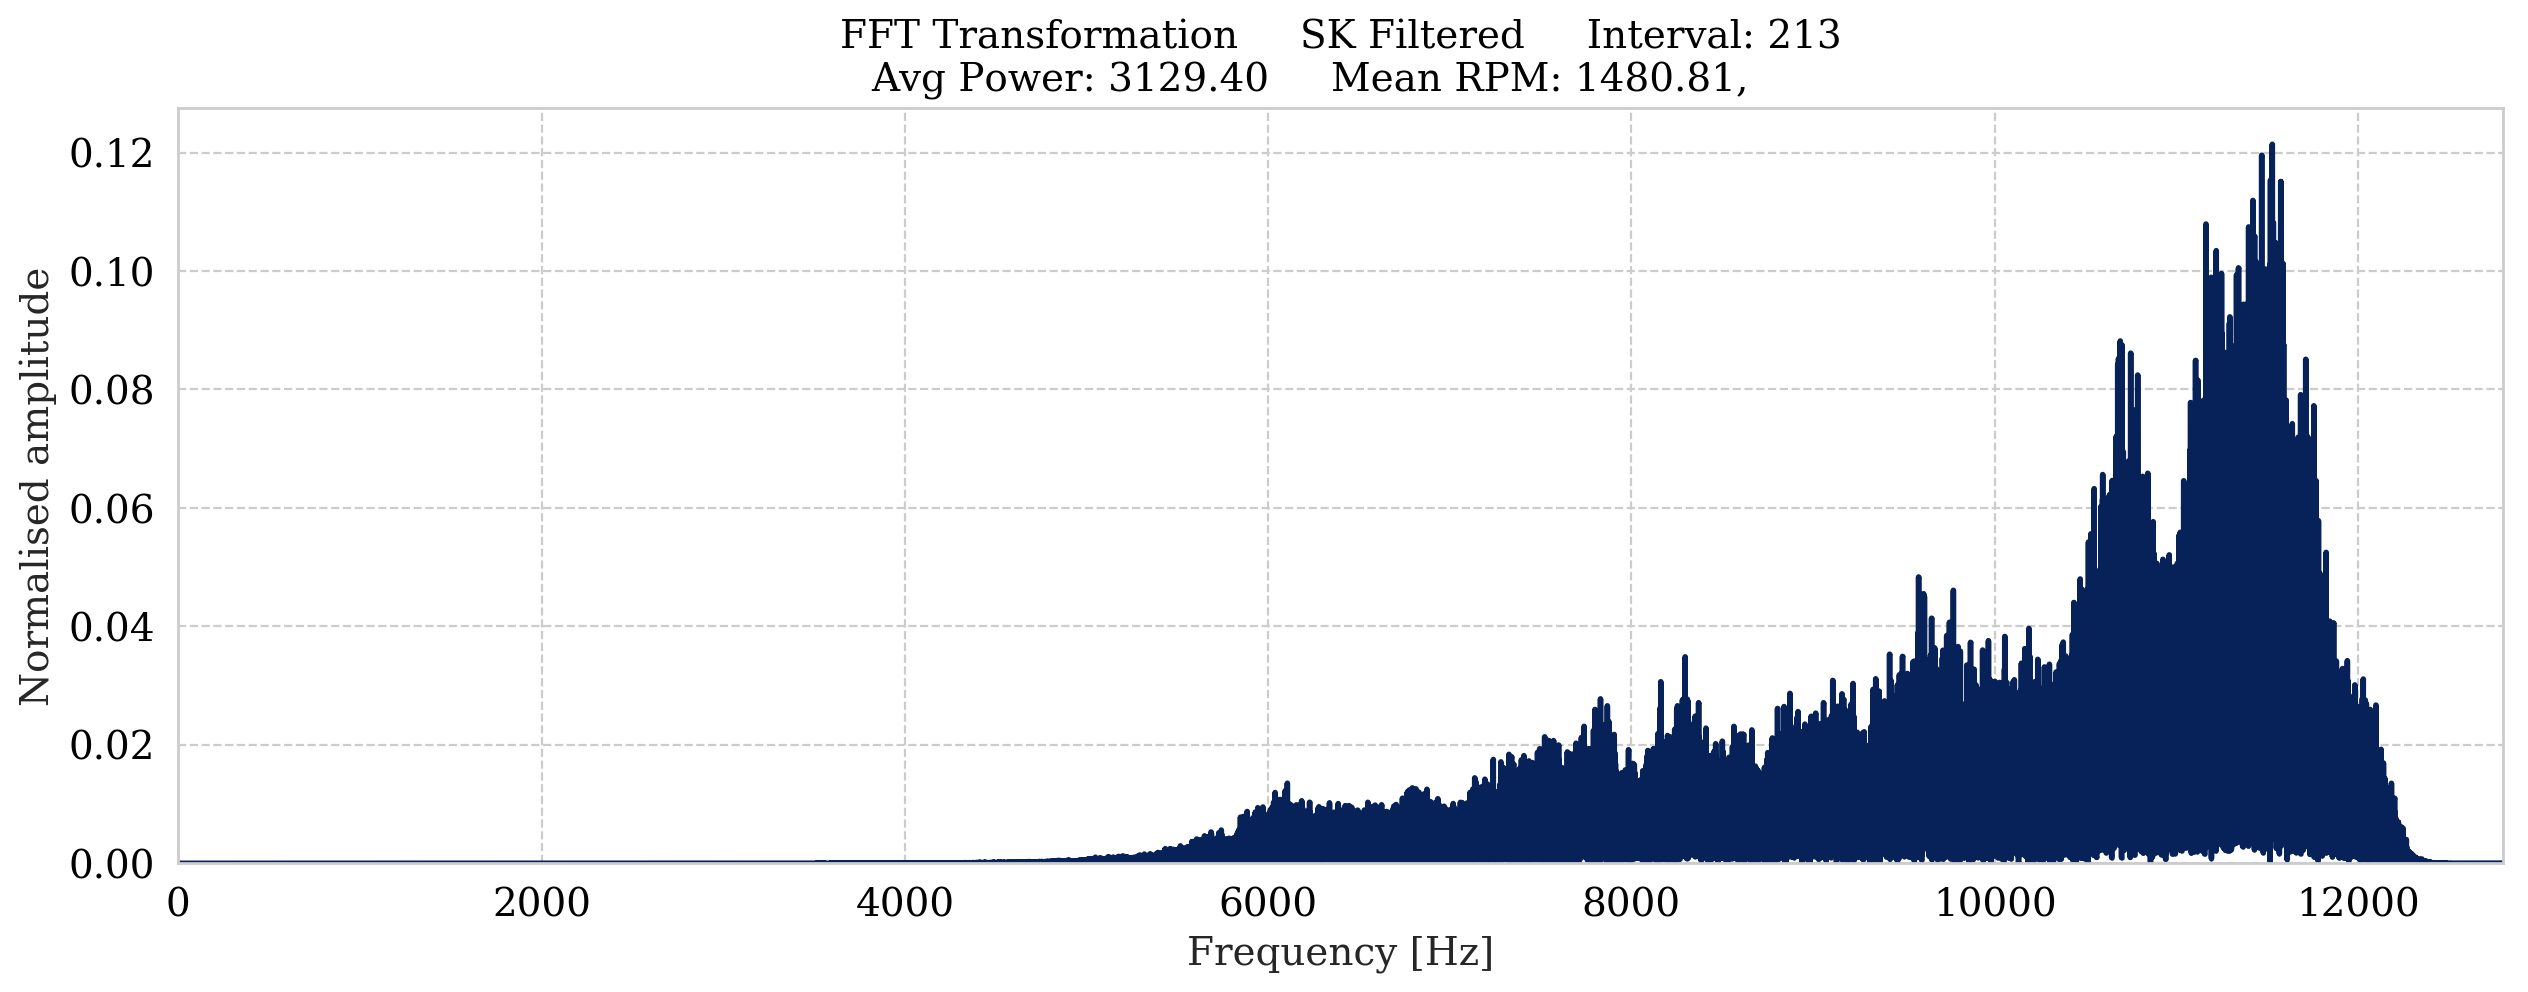

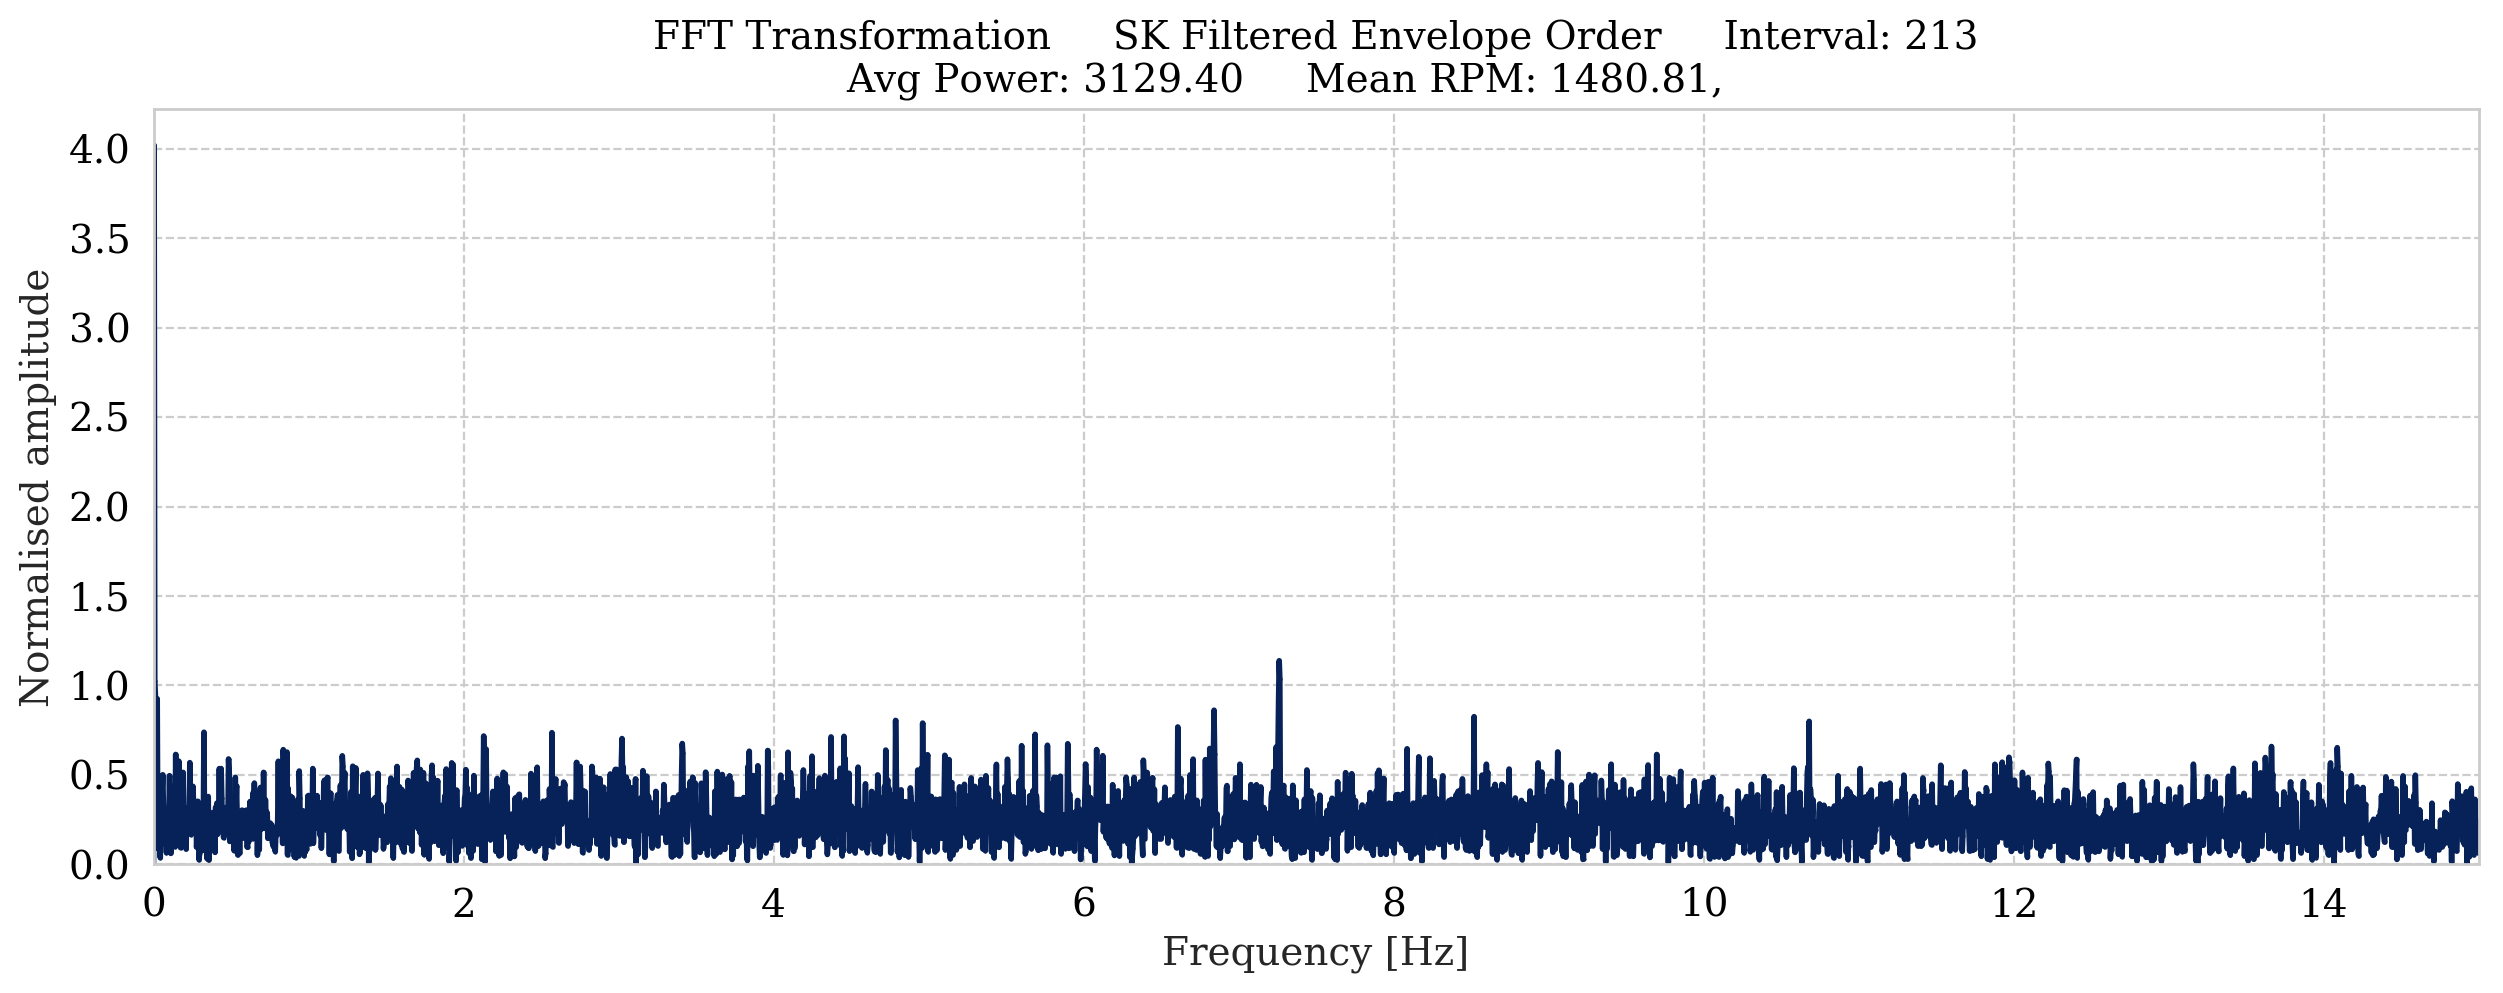

Kurtosis of 213 0.046
Center Frequency: 9000.000
Used Bandwidth in orders: 16.207


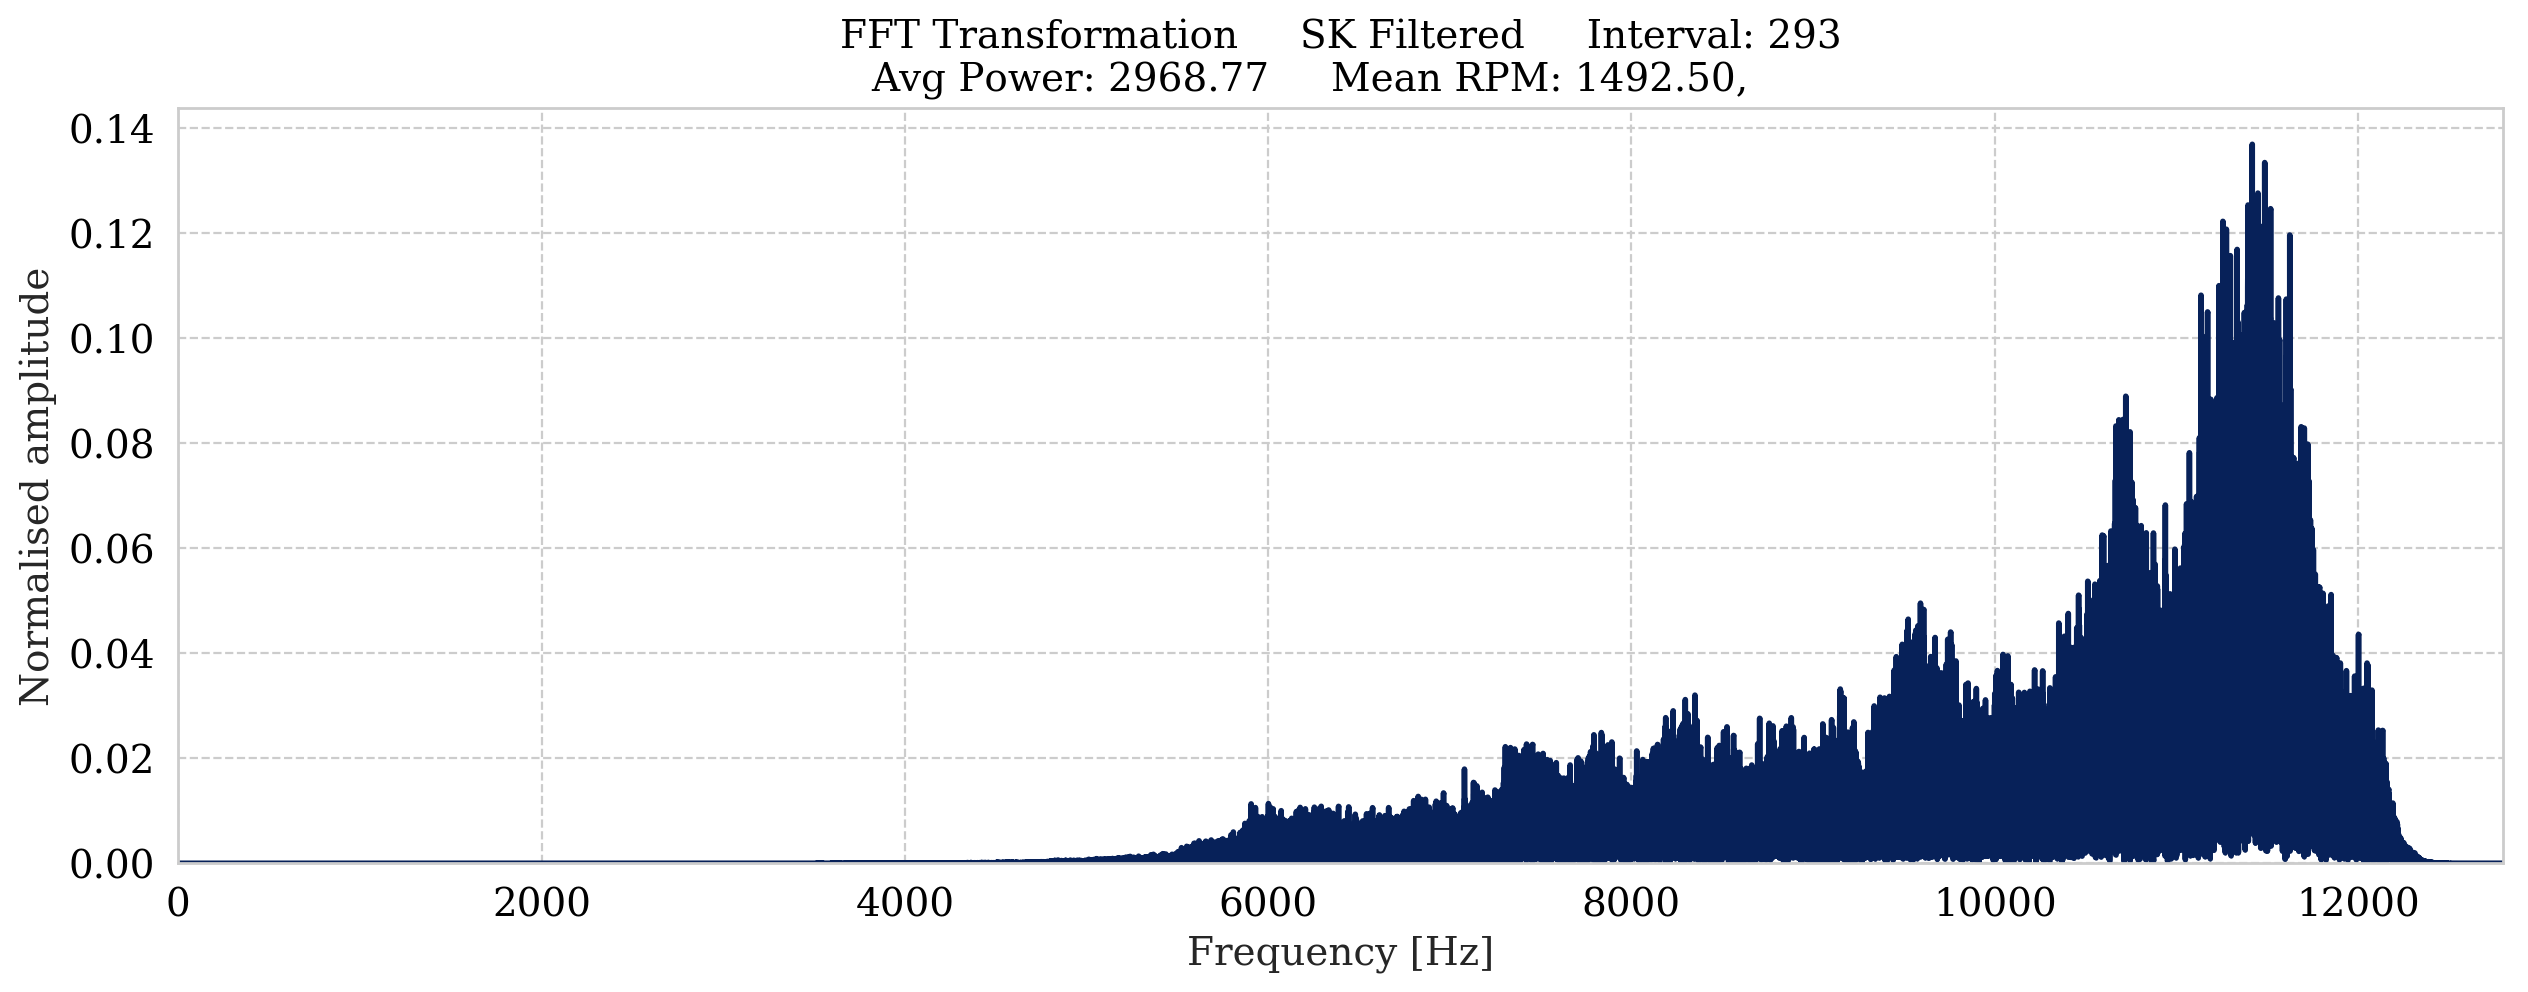

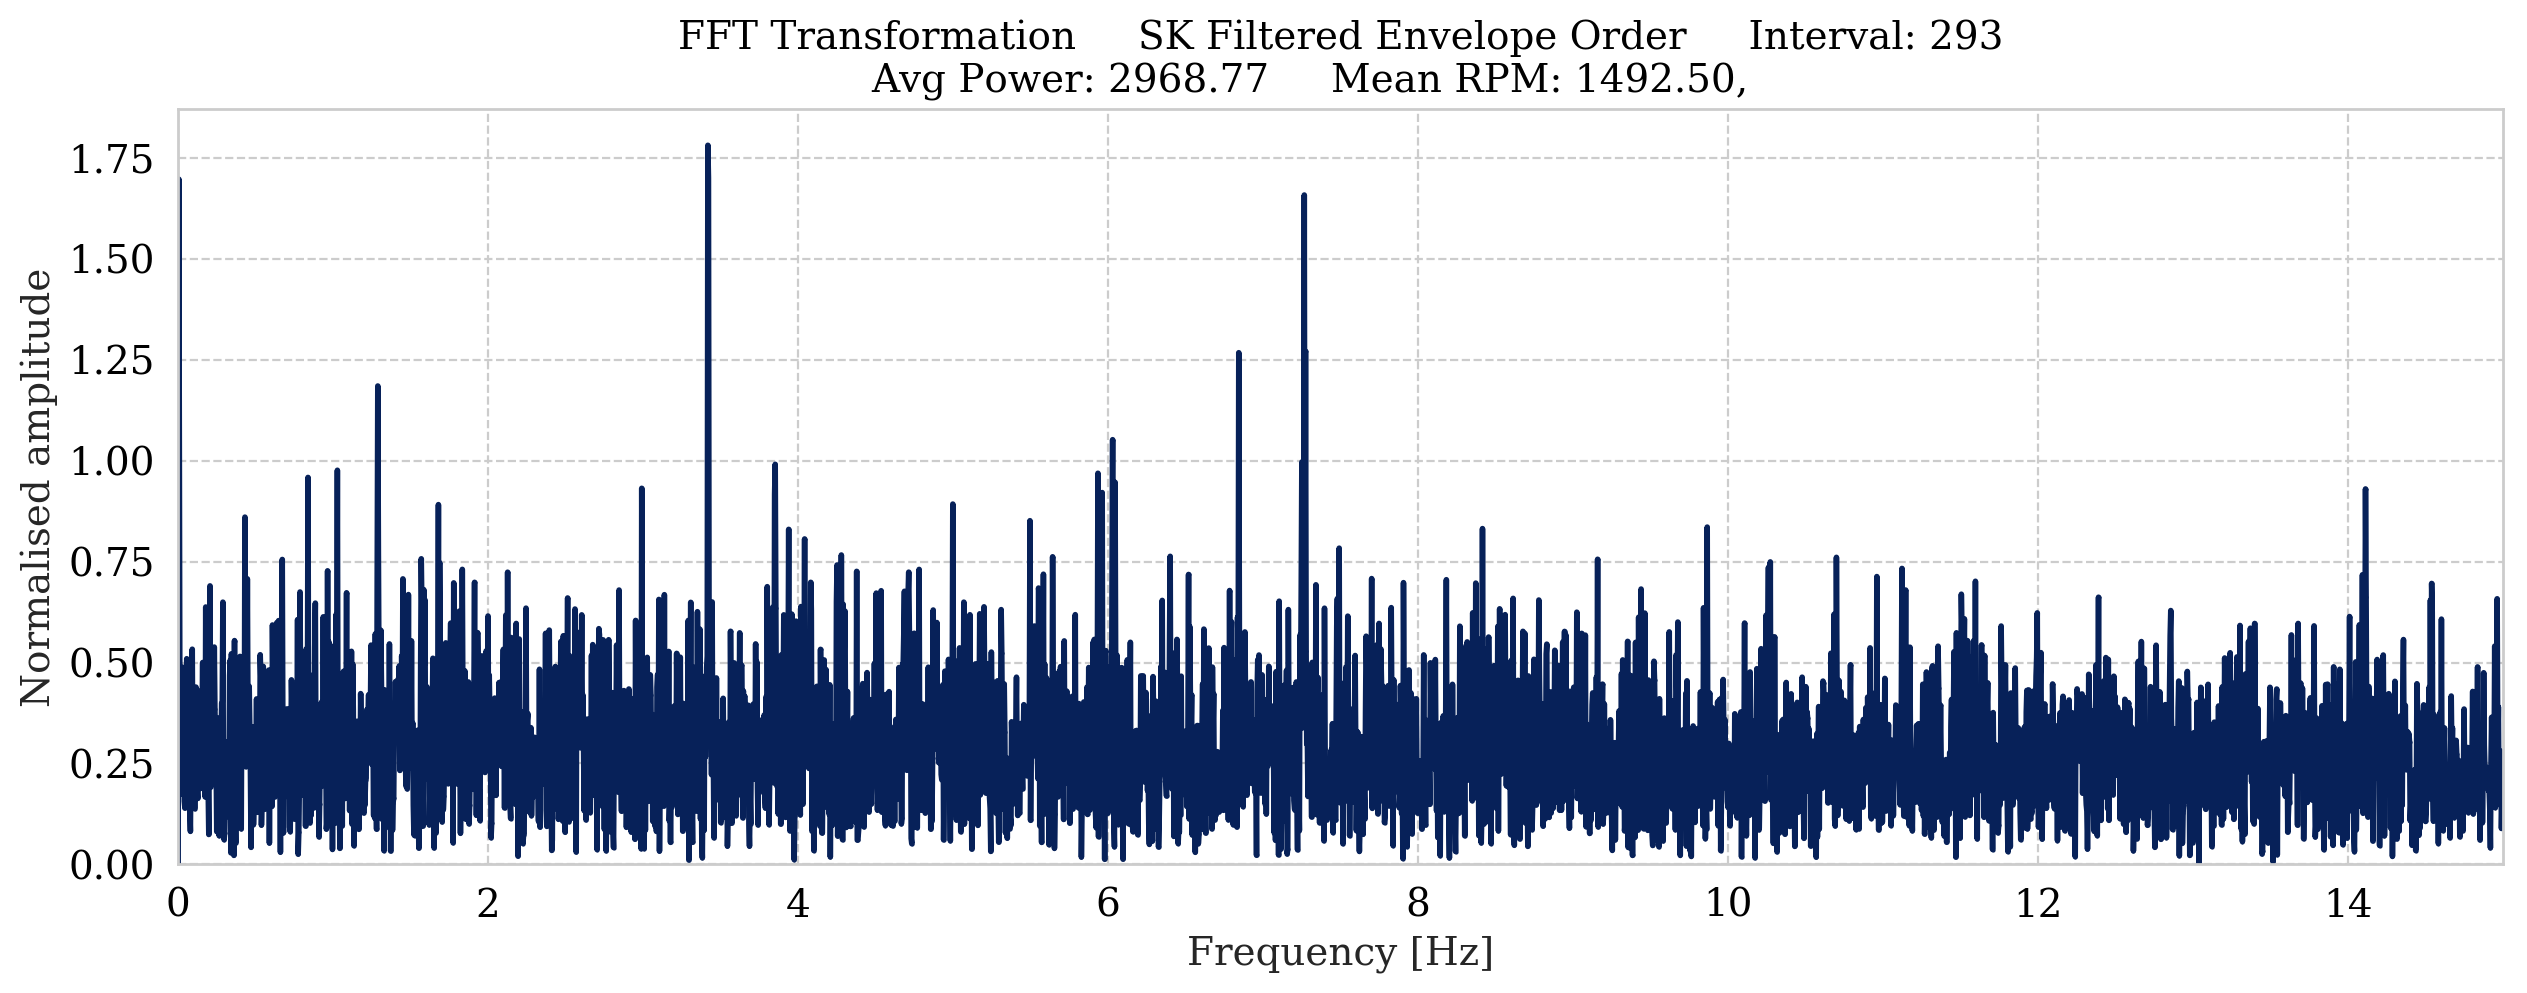

Kurtosis of 293 0.011
Center Frequency: 9000.000
Used Bandwidth in orders: 16.080


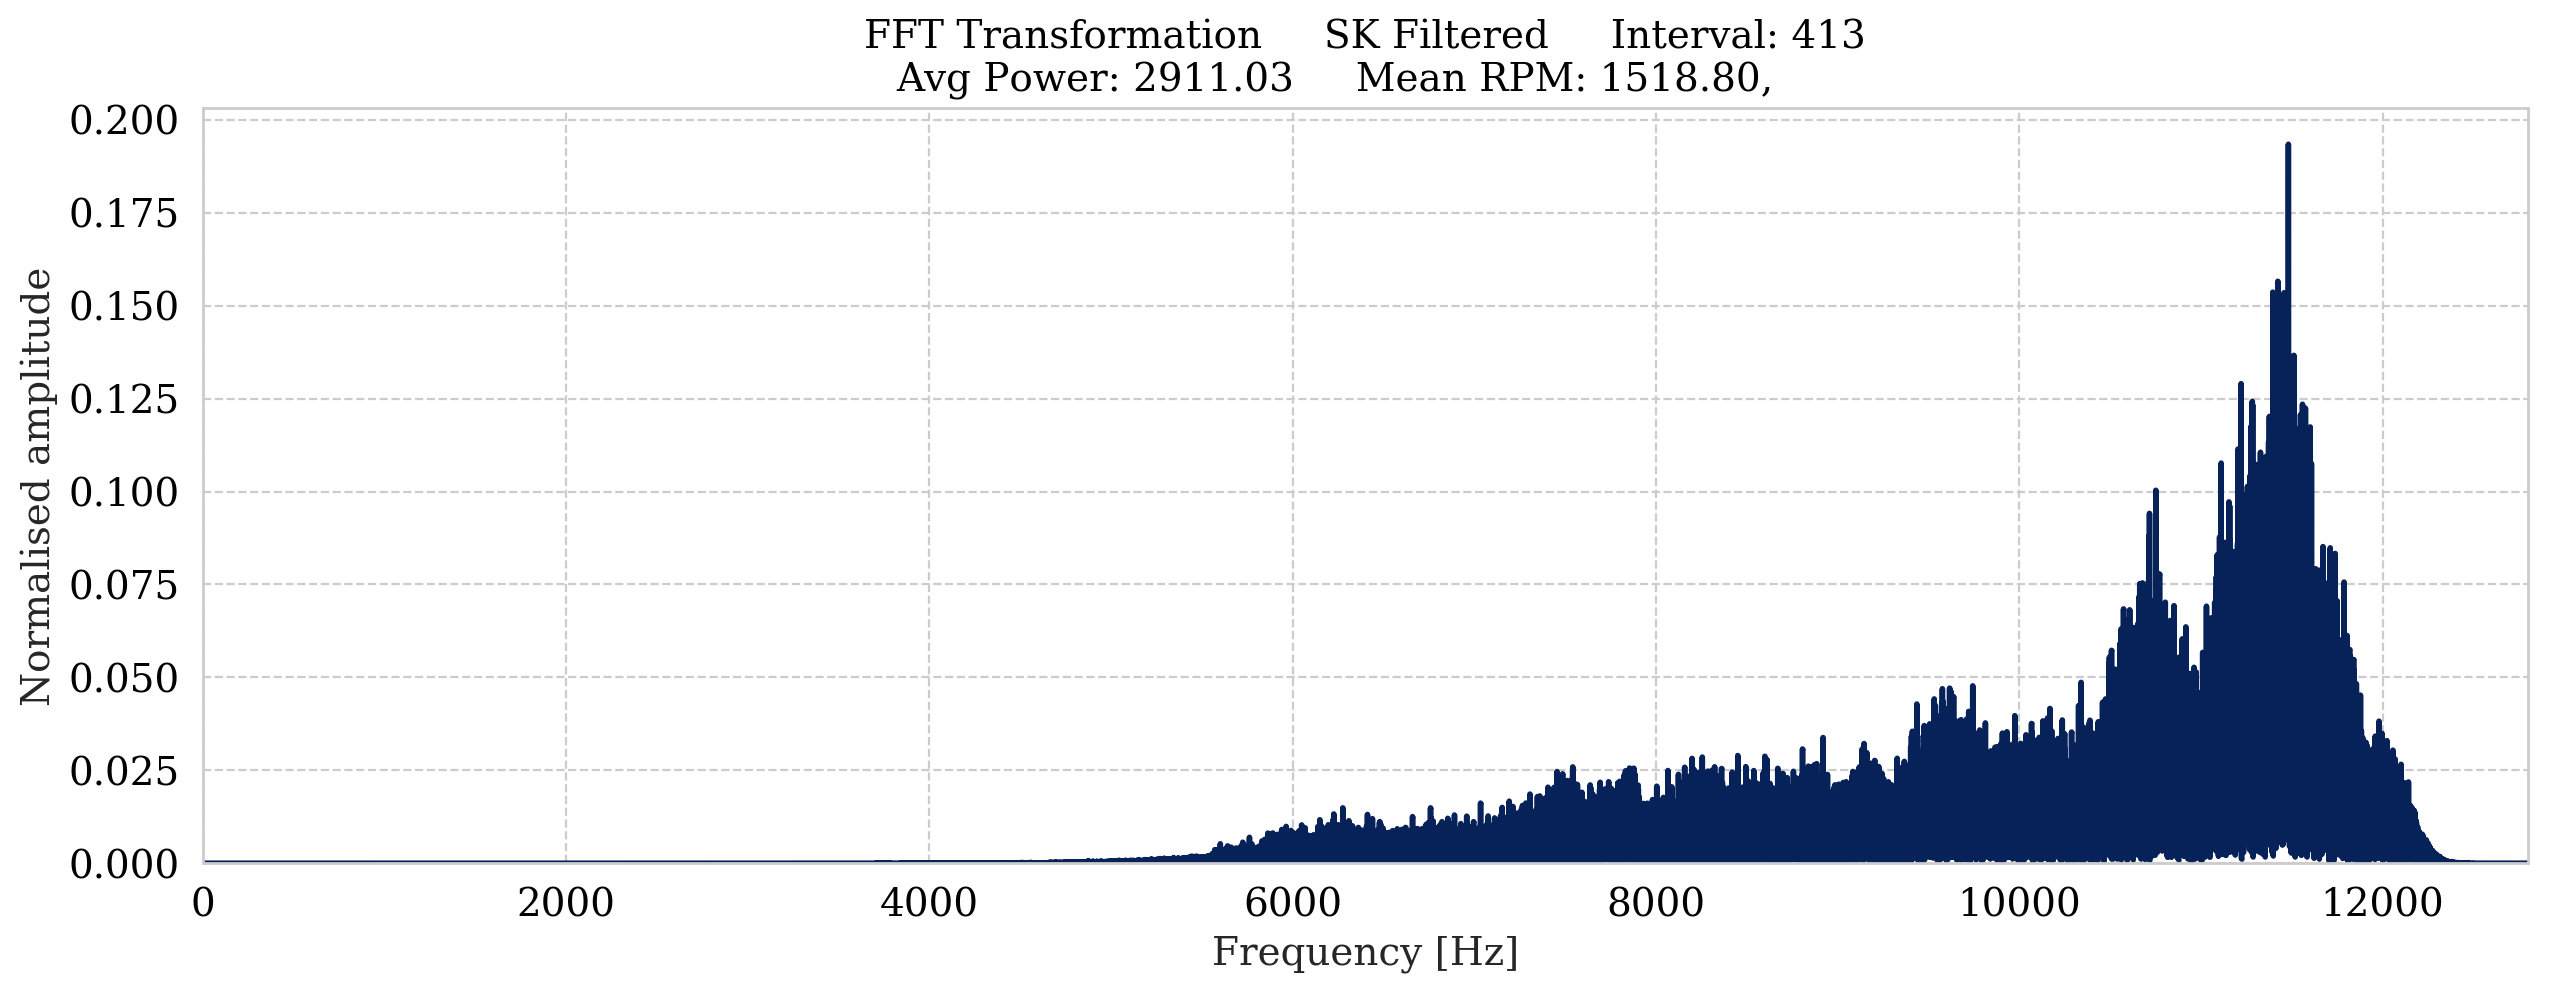

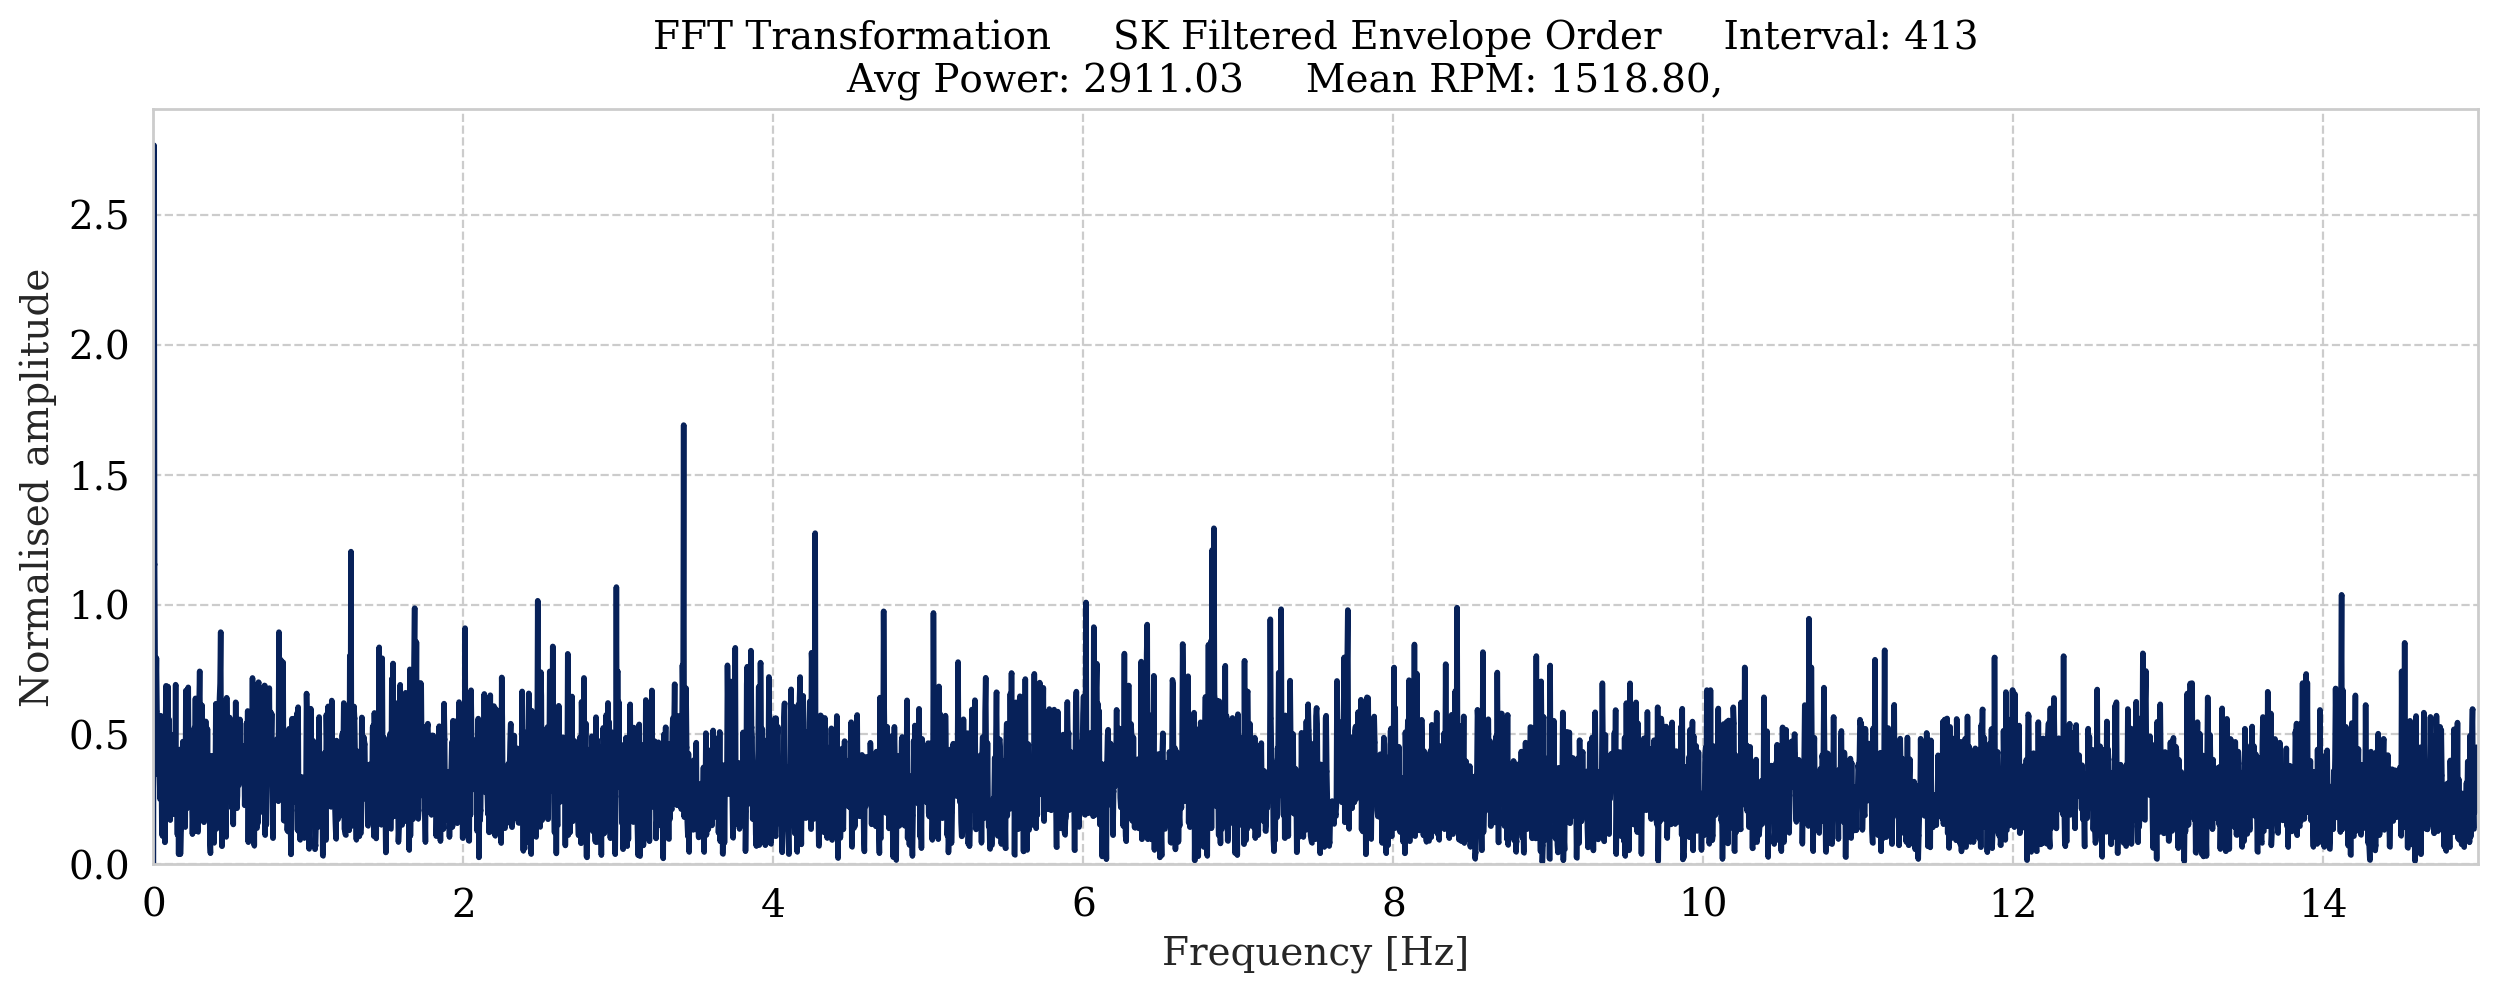

Kurtosis of 413 0.013
Center Frequency: 9000.000
Used Bandwidth in orders: 15.802


In [131]:
interesting_intervals = [7, 101, 213, 293, 413]
bandpassed_signal = bandpassed_9K
ffts = []
fft_times = []

#for i, signal in enumerate(bandpassed_signal):
for i in interesting_intervals:
    if avg_power[i] < 2400:
        continue
    bw = float(concated['Bandwidths'][i])
    if i == 50:
        print('------------------------------------------------\n\n')
        print('               FIRST 50 FINISHED')
        print('\n\n------------------------------------------------')
    if True: #i< 50 or i>370: #bw < 1000 and i<50:# or (i>50 and i<60) or (i > 190 and i < 200)):
        # Plot SK filtered signal
        #plotting_methods.plot_signal(times[i][1:], bandpassed_signal[i],name='SK Filtered', interval_num=i, avg_power=avg_power[i], avg_rpm=avg_rpm[i])
        plotting_methods.plot_fft(times[i][1:], bandpassed_signal[i], name='SK Filtered', interval_num=i, avg_power=avg_power[i], avg_rpm=avg_rpm[i])
        
        #Calcutale envelope
        highut_lp = 1000
        rectified = abs(bandpassed_signal[i])**2
        bandpass_filtered_rect_lp = filters.butter_lp_filter(rectified, highut_lp, fs, order=5)
        
        #Plot envelope signal
        one_order = avg_rpm[i]/60
        freq=[one_order]
        #plotting_methods.plot_fft(times[i][1:], bandpass_filtered_rect_lp, x_max=100,frequency_lines=freq,name='SK Filtered Envelope', interval_num=i, avg_power=avg_power[i], avg_rpm=avg_rpm[i])
        
        #Calculate Envelope Order
        try:
            x_round, resampled_envelope, x_time = resample_signals.do_cubic_resampling(times[i][1:], bandpass_filtered_rect_lp, peak_array[i], number_of_resample_points=2000)
            fft, fft_time = plotting_methods.plot_fft(x_round, resampled_envelope, x_max=15, y_max=None,frequency_lines=[], name='SK Filtered Envelope Order', interval_num=i, avg_power=avg_power[i], avg_rpm=avg_rpm[i])
            ffts.append(normalise_fft(fft))
            fft_times.append(fft_time)
        except: #If resampling fails for some reason
            print('---------------------------------------\n\n')
            print(f'              INTERVAL {i}')
            print('ENVELOPE ORDER COULD NOT BE CALCULATED!\n\n')
            print('---------------------------------------')
        
        # Print key values
        print(f'Kurtosis of {i} {kurtosis(bandpassed_signal[i]):.3f}')
        print(f'Center Frequency: {cf:.3f}')
        print(f'Used Bandwidth in orders: {400*60/avg_rpm[i]:.3f}')


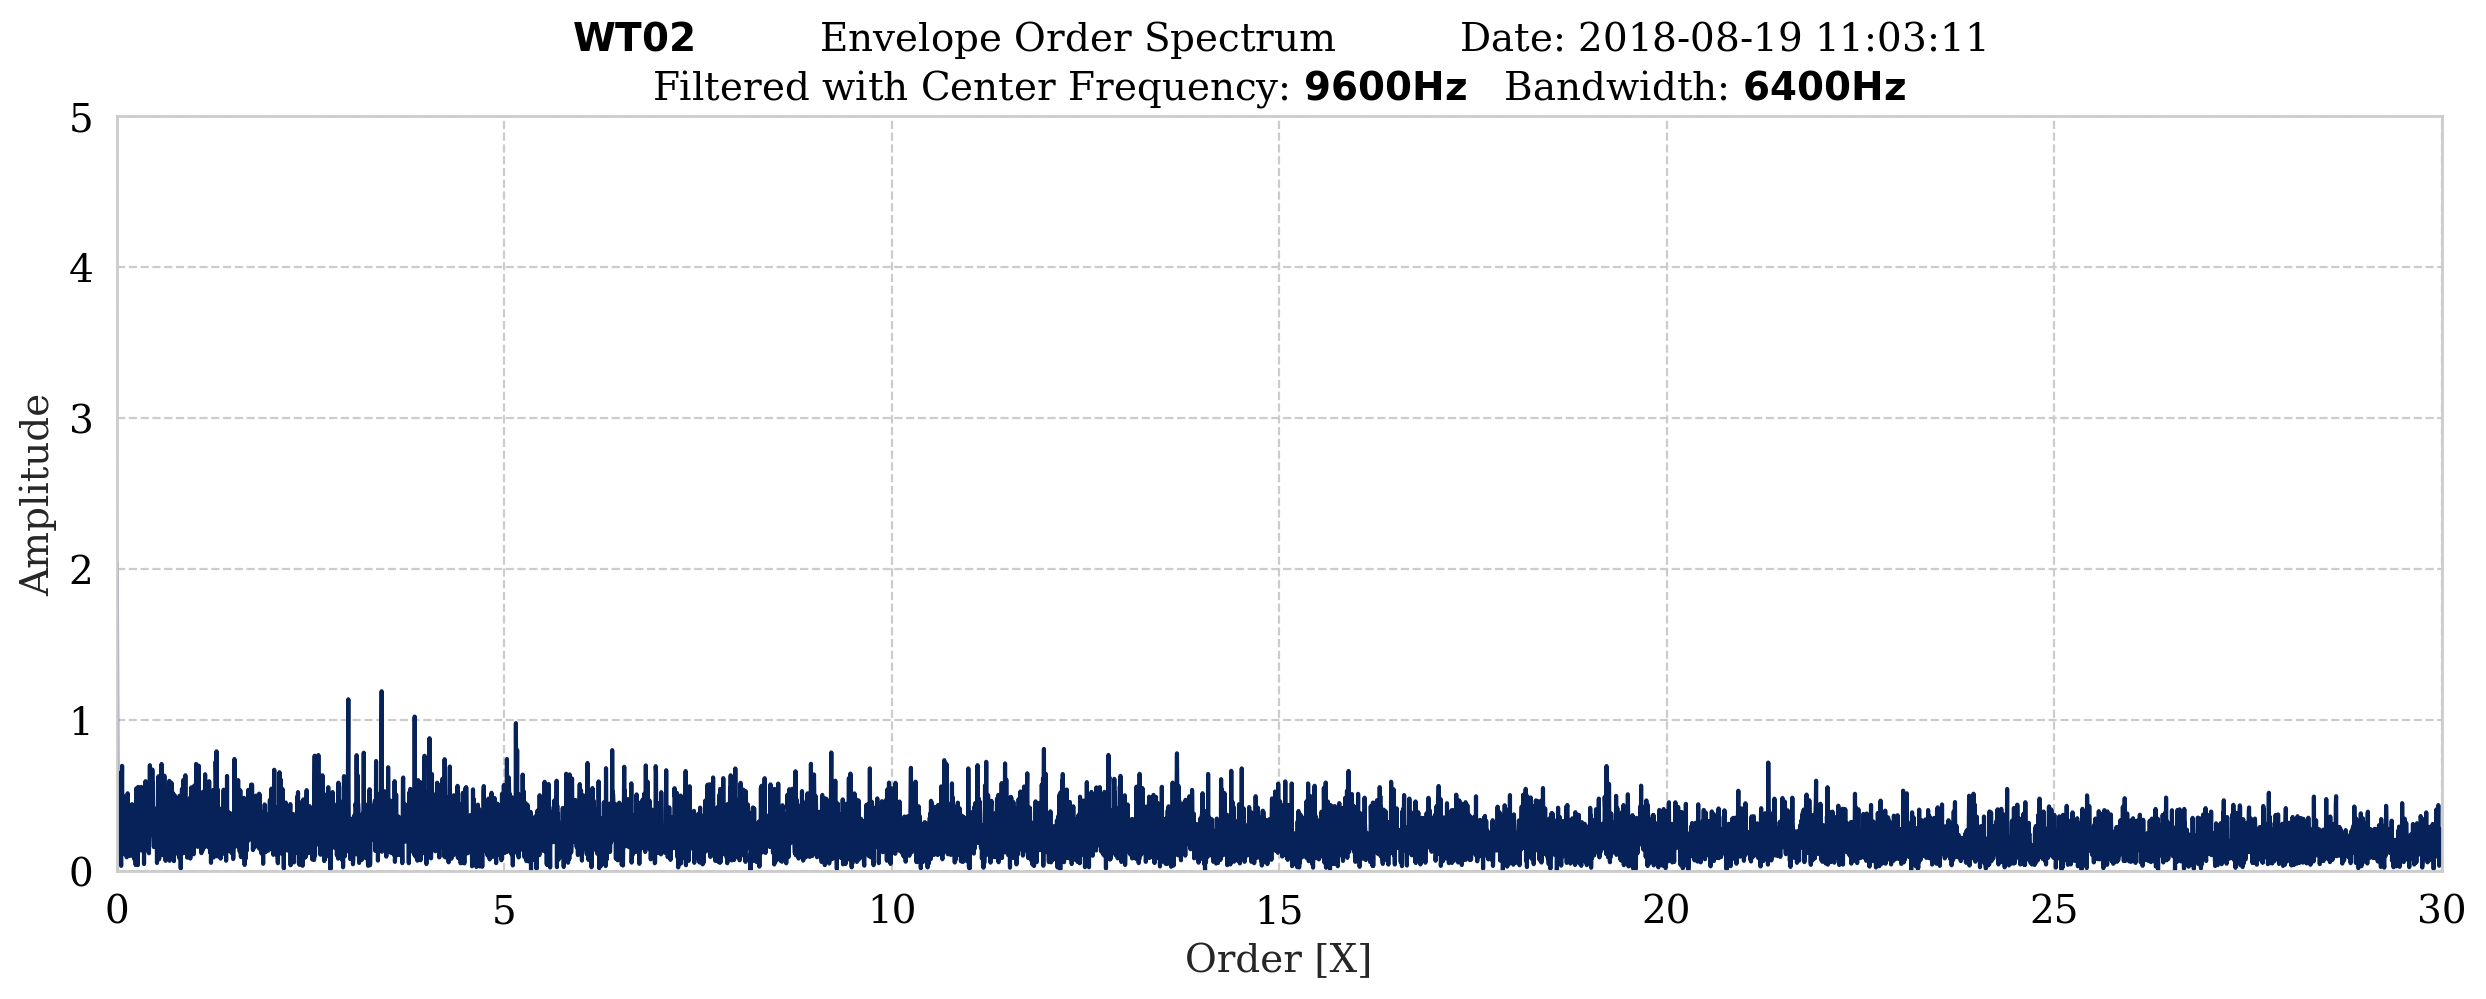

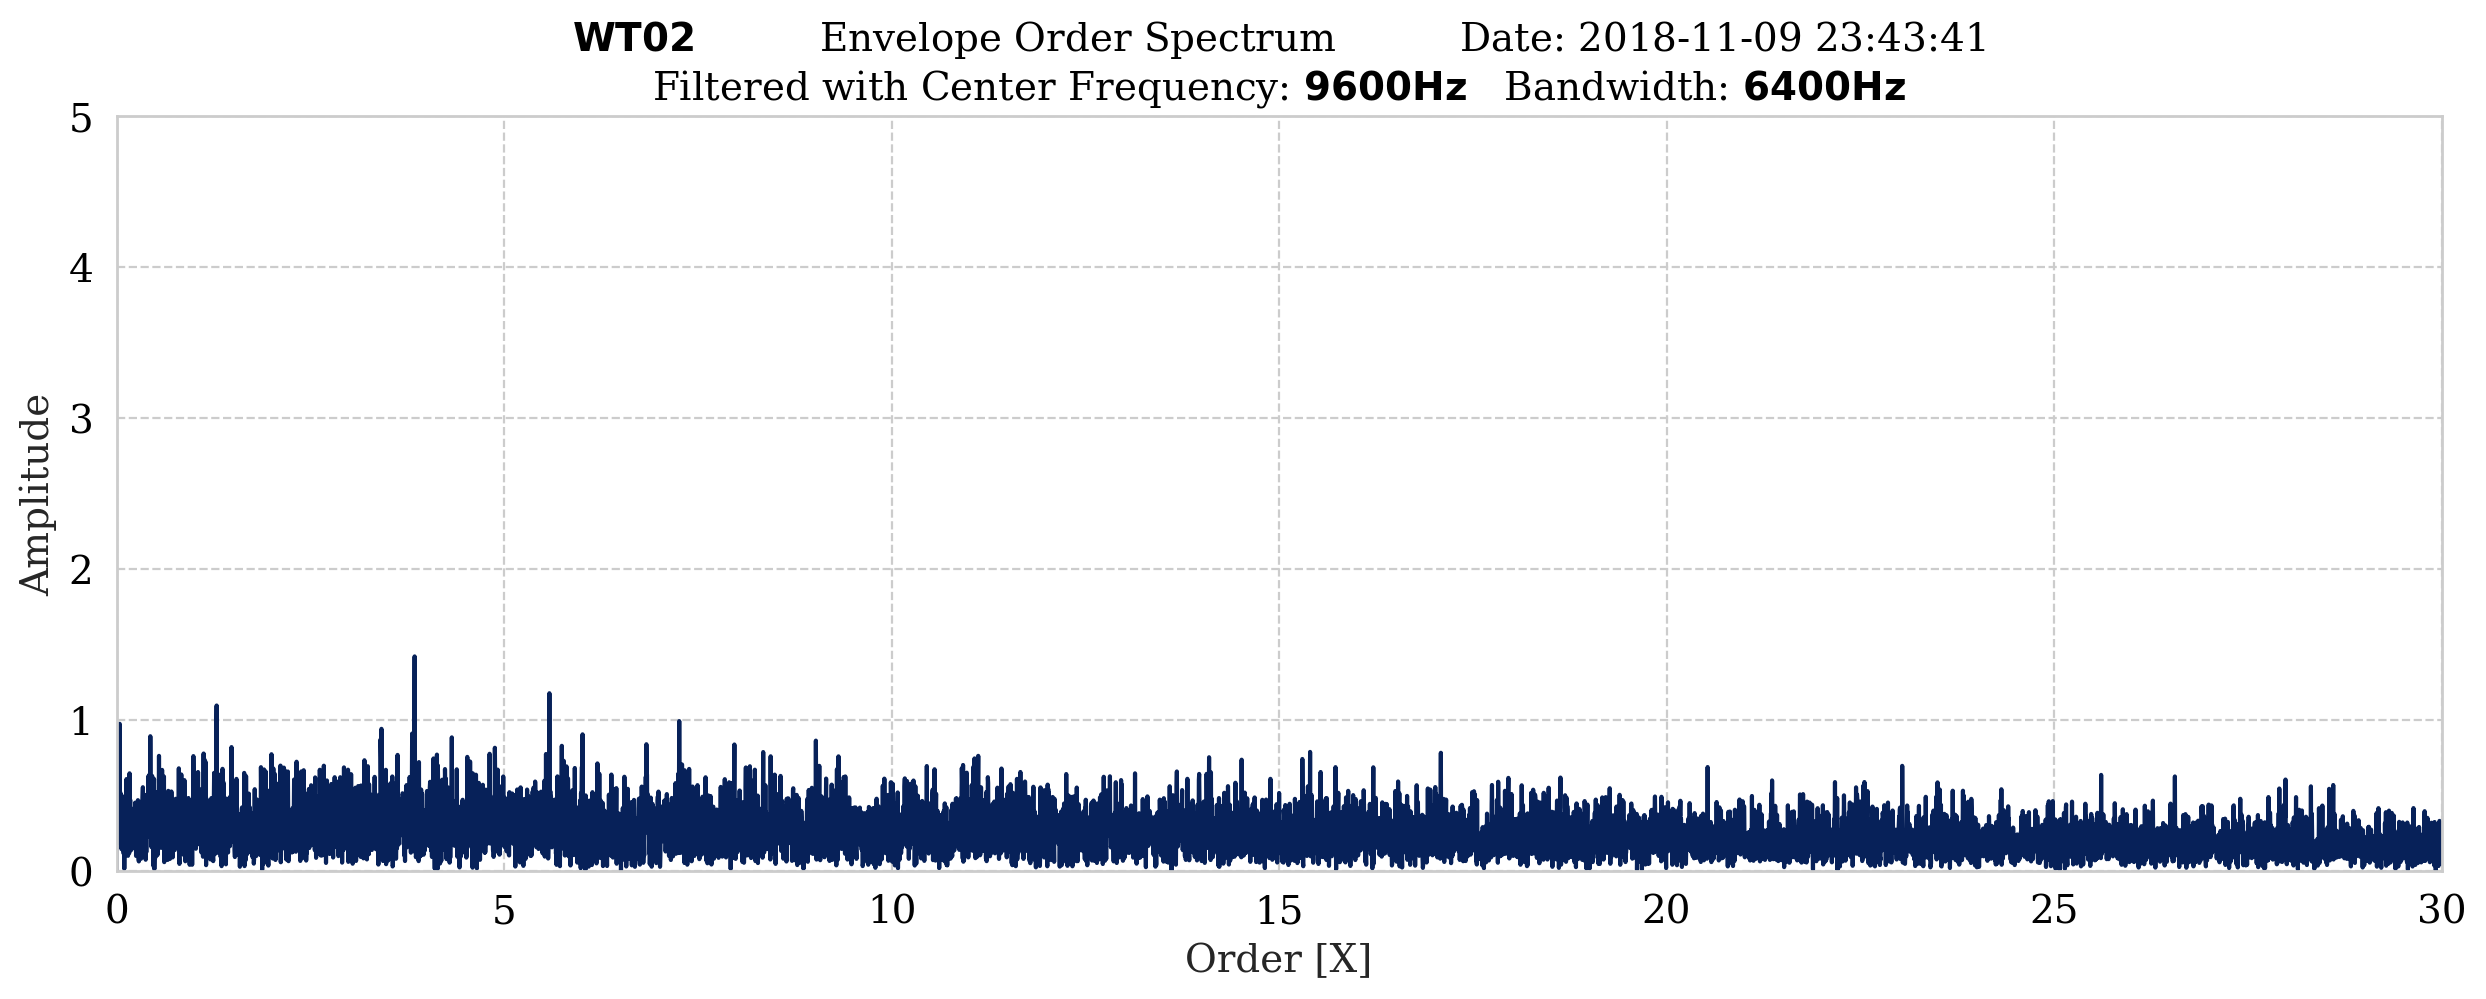

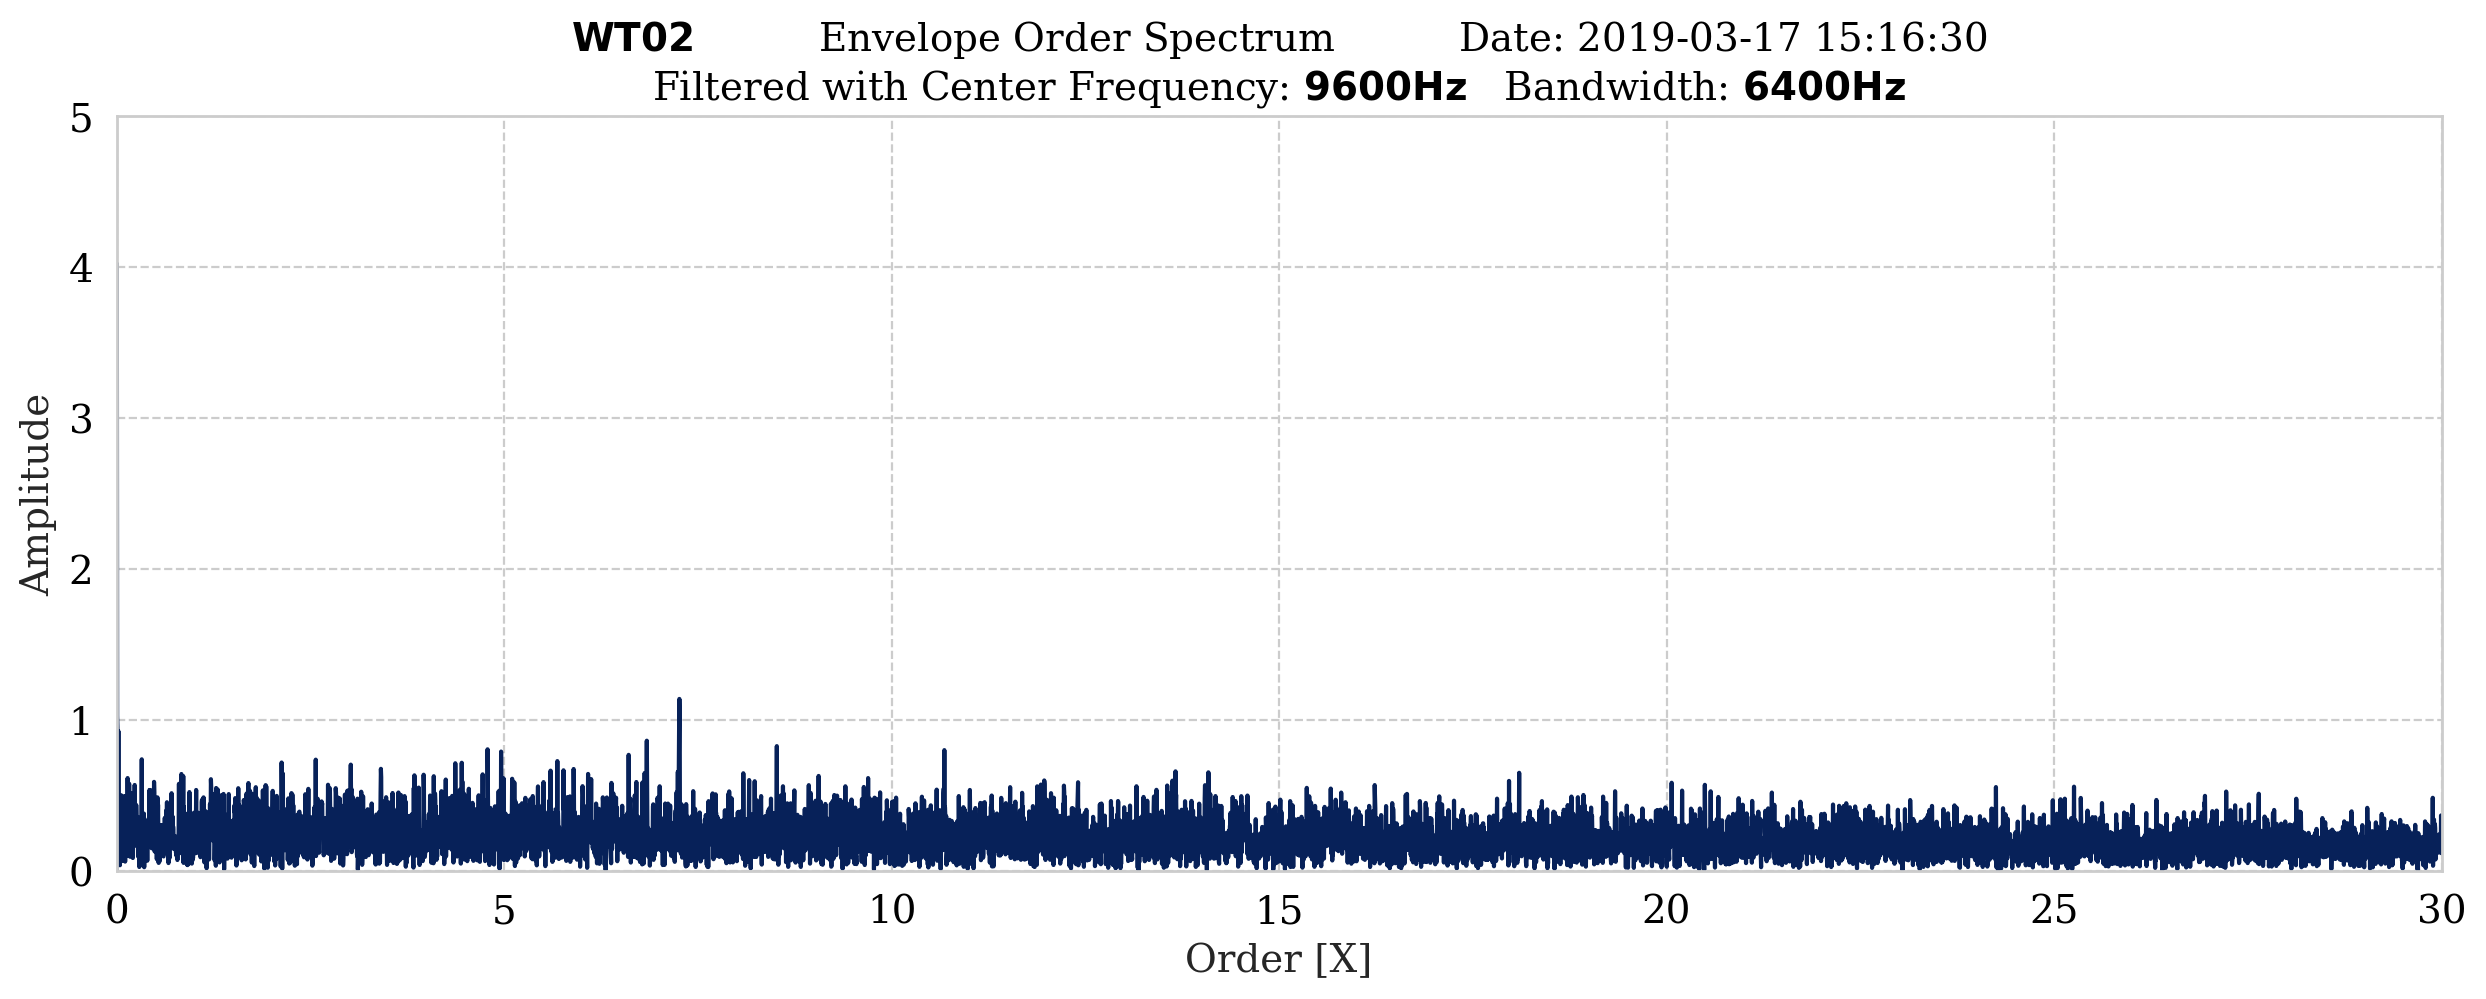

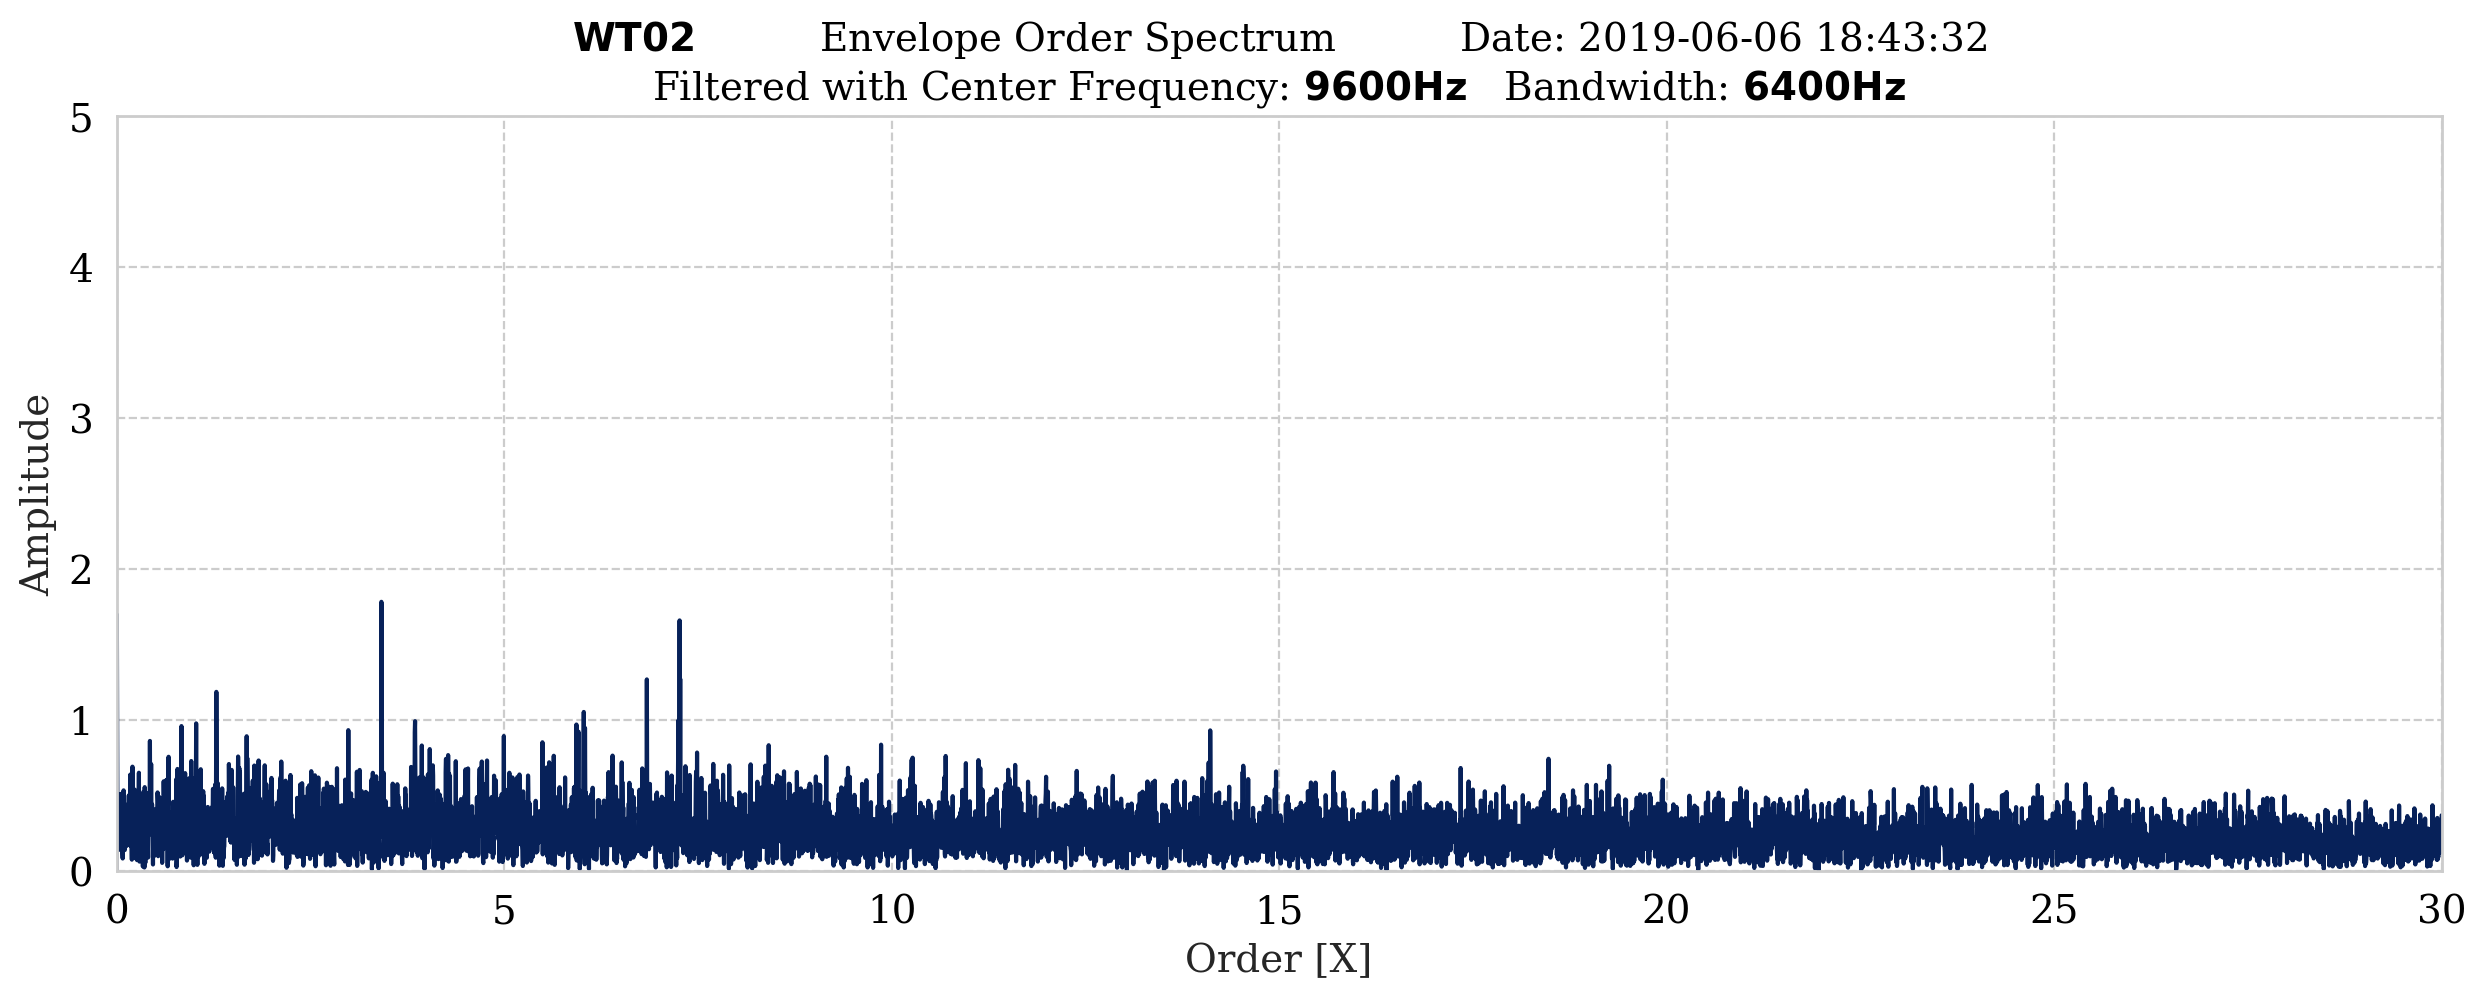

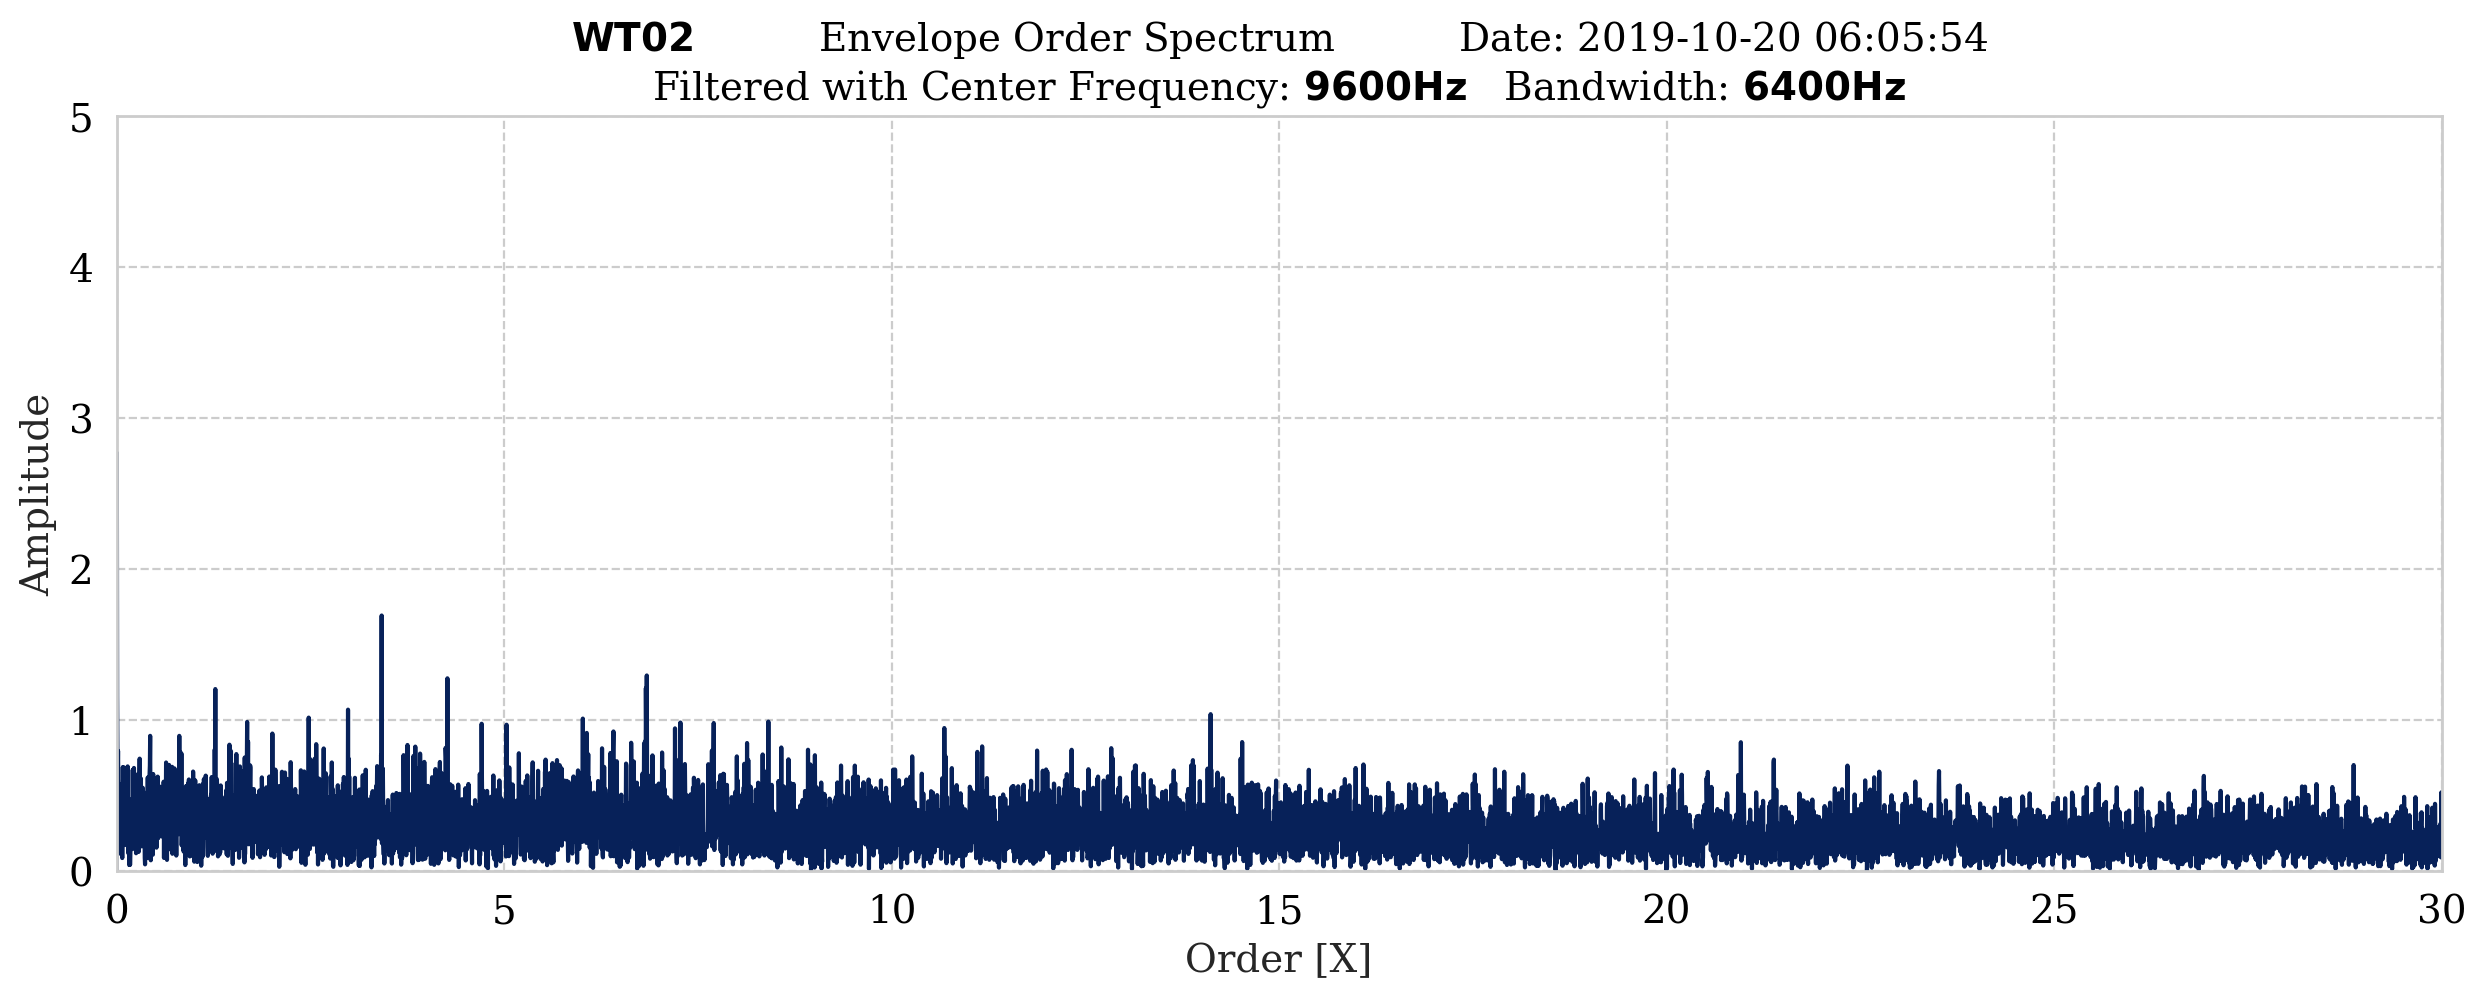

In [133]:
save_path = '../../plots/envelope_order_higher_freq/'
for i,interval in enumerate(interesting_intervals):
    plt.figure(figsize=(15,5))
    plt.plot(fft_times[i], ffts[i])
    plt.xlim(0, 30)
    plt.ylim(0,5)
    heading = r"$\bf{WT02}$" + f'          Envelope Order Spectrum          Date: {dates.values[interesting_intervals[i]][0]}'
    heading += f'\nFiltered with Center Frequency: ' + r"$\bf{9600Hz}$" + '   Bandwidth: ' + r"$\bf{6400Hz}$"
    plt.title(heading)
    plt.ylabel('Amplitude')
    plt.xlabel('Order [X]')
    plt.margins(0)
    plt.savefig(f'{save_path}wt02_high_freq_{interval}.png', dpi=300)
    plt.show()

In [134]:
path = wt_folder_path + 'higfreq.npz'
np.savez(path, fft=ffts, freq=fft_times, intervals=interesting_intervals, dates=dates)


### 9.6 Filter on Center Frequency 12 kHz and Bandwidth 400 Hz


In [60]:
# Just loop through
bandpassed_12K = []
signal_size = len(filtered_signals)
for i in range(len(filtered_signals)):
    use_signal = filtered_signals[i]
    time = times[i]
    
    cf = 12000
    bw = 200
    low = cf - bw
    high = cf + bw

    if high > 0.5*fs:
        high = 0.5*fs -100    
    
    y = filter_based_on_optimal_bw(low,high,use_signal, time)
    bandpassed_12K.append(y)
    print(f'Filtering {i+1} / {signal_size} signals', end='\r')

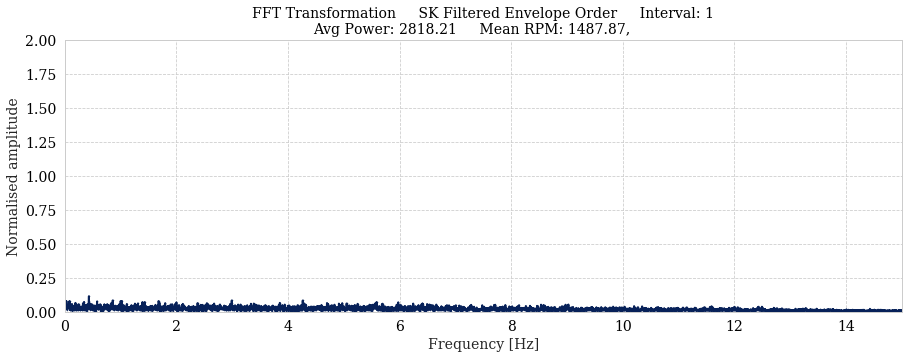

Kurtosis of 1 -0.067
Center Frequency: 12000.000
Used Bandwidth in orders: 16.130


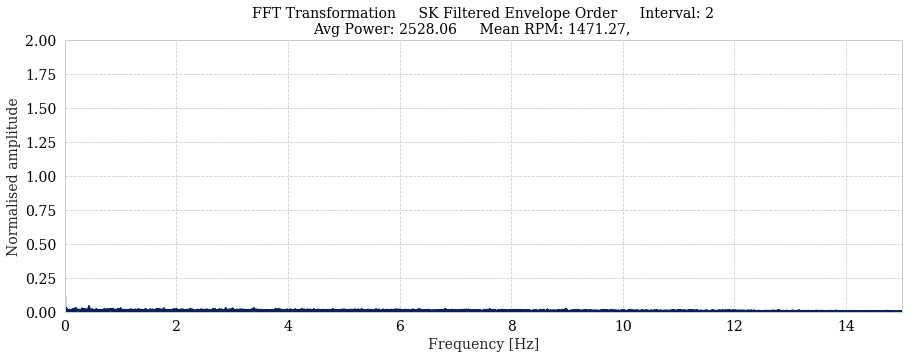

Kurtosis of 2 0.345
Center Frequency: 12000.000
Used Bandwidth in orders: 16.312


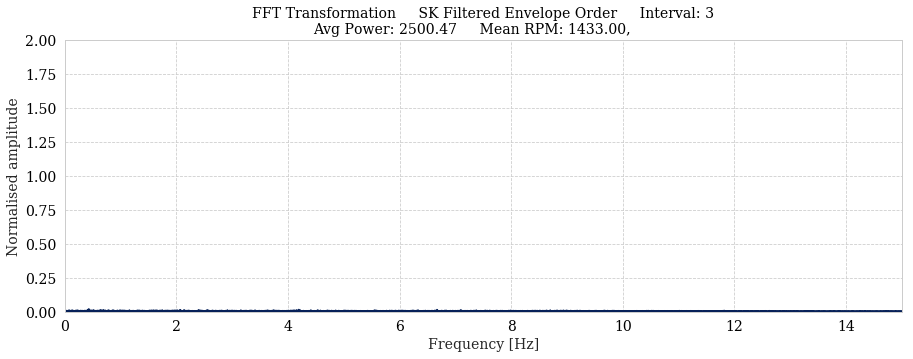

Kurtosis of 3 -0.002
Center Frequency: 12000.000
Used Bandwidth in orders: 16.748


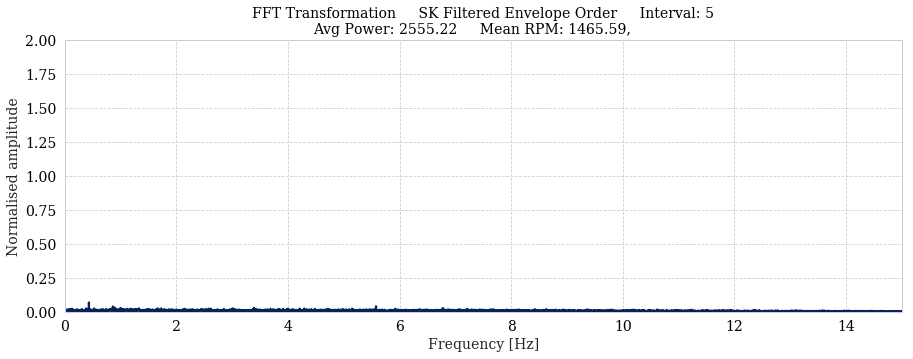

Kurtosis of 5 0.049
Center Frequency: 12000.000
Used Bandwidth in orders: 16.376


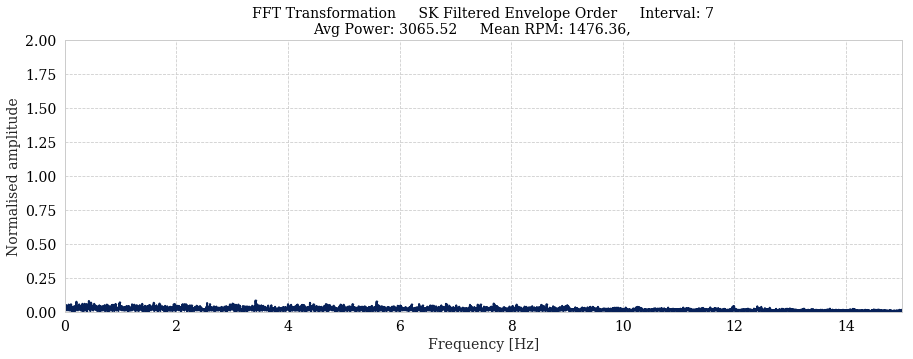

Kurtosis of 7 -0.033
Center Frequency: 12000.000
Used Bandwidth in orders: 16.256


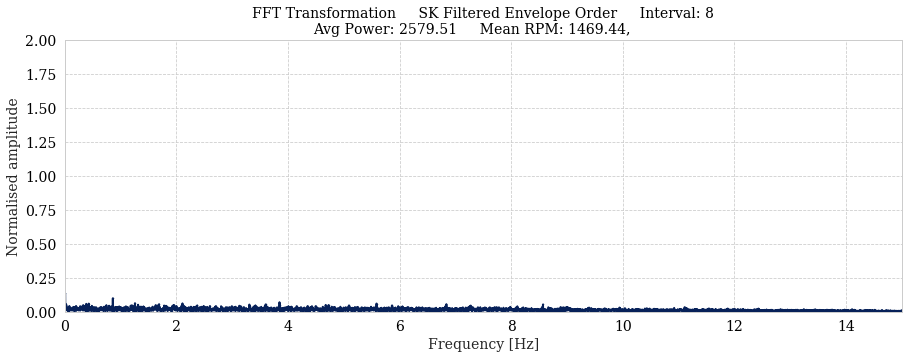

Kurtosis of 8 0.017
Center Frequency: 12000.000
Used Bandwidth in orders: 16.333


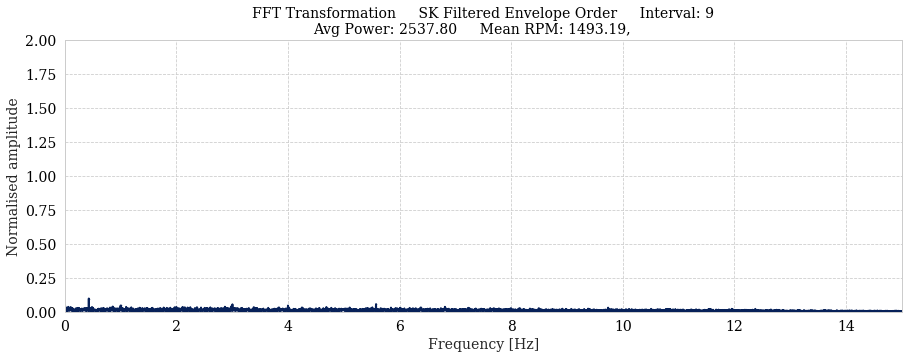

Kurtosis of 9 0.078
Center Frequency: 12000.000
Used Bandwidth in orders: 16.073


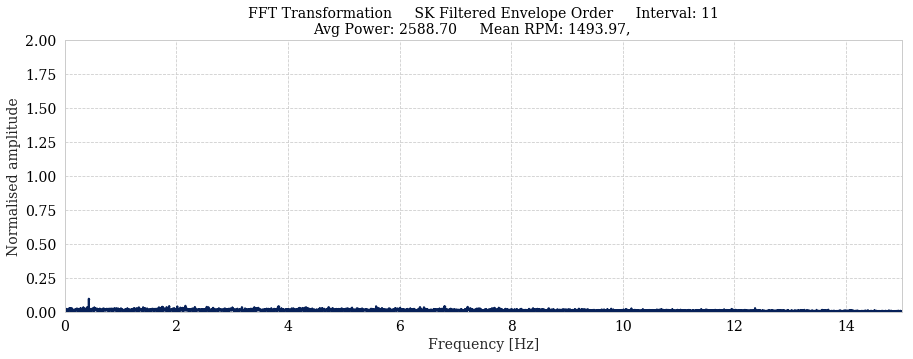

Kurtosis of 11 0.057
Center Frequency: 12000.000
Used Bandwidth in orders: 16.065


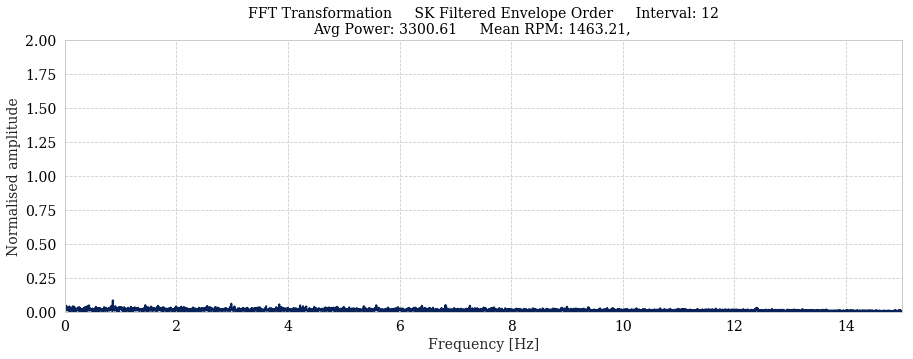

Kurtosis of 12 0.019
Center Frequency: 12000.000
Used Bandwidth in orders: 16.402


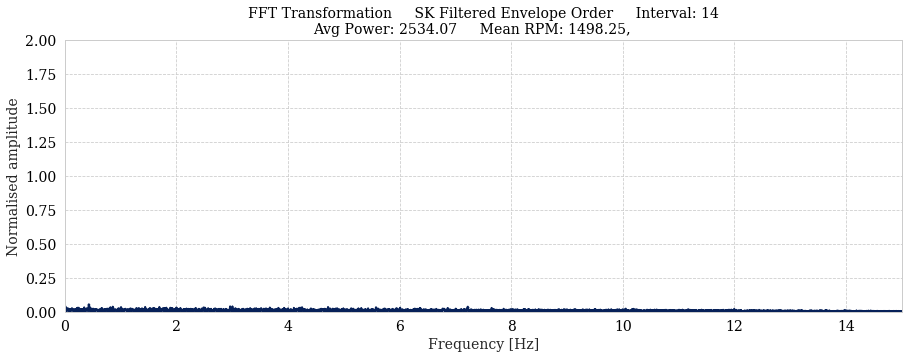

Kurtosis of 14 0.062
Center Frequency: 12000.000
Used Bandwidth in orders: 16.019


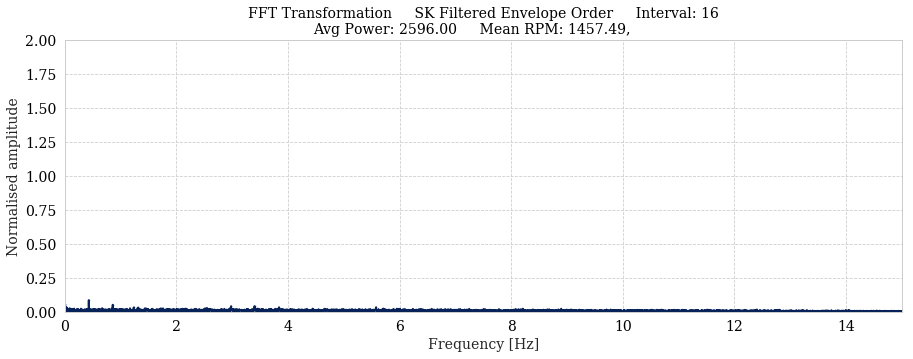

Kurtosis of 16 0.136
Center Frequency: 12000.000
Used Bandwidth in orders: 16.467


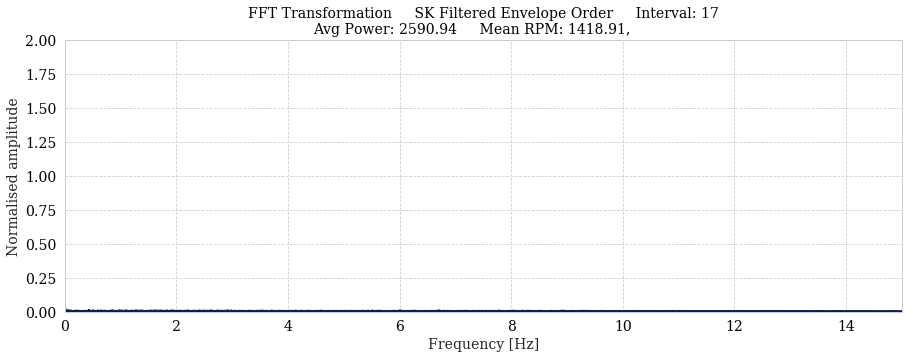

Kurtosis of 17 0.069
Center Frequency: 12000.000
Used Bandwidth in orders: 16.914


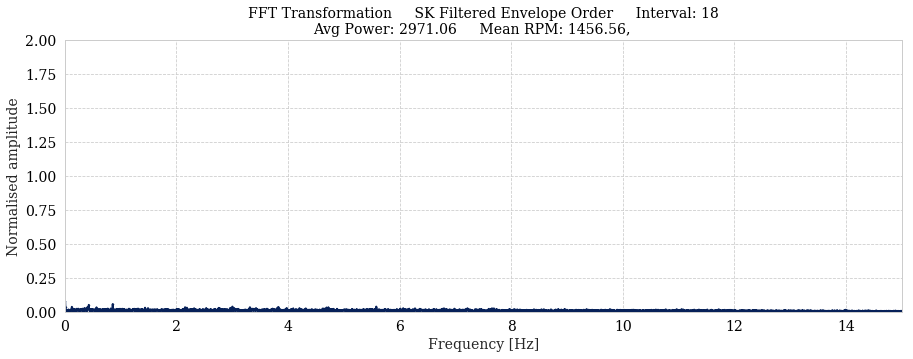

Kurtosis of 18 0.111
Center Frequency: 12000.000
Used Bandwidth in orders: 16.477


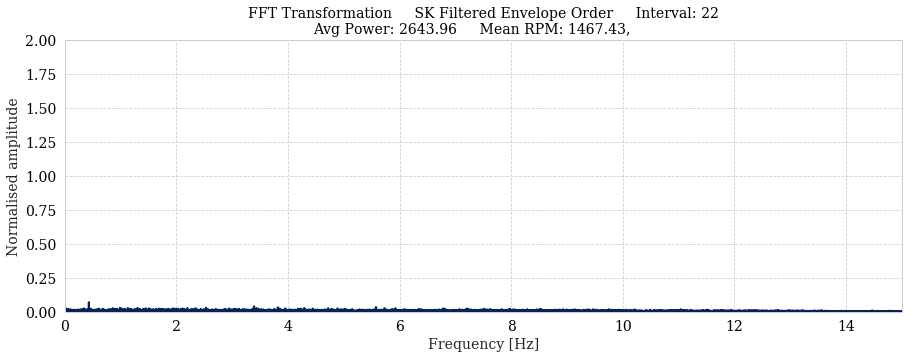

Kurtosis of 22 0.108
Center Frequency: 12000.000
Used Bandwidth in orders: 16.355


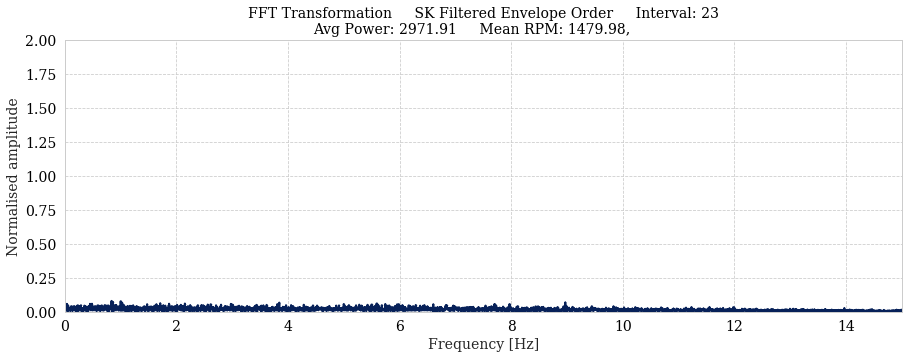

Kurtosis of 23 -0.024
Center Frequency: 12000.000
Used Bandwidth in orders: 16.216


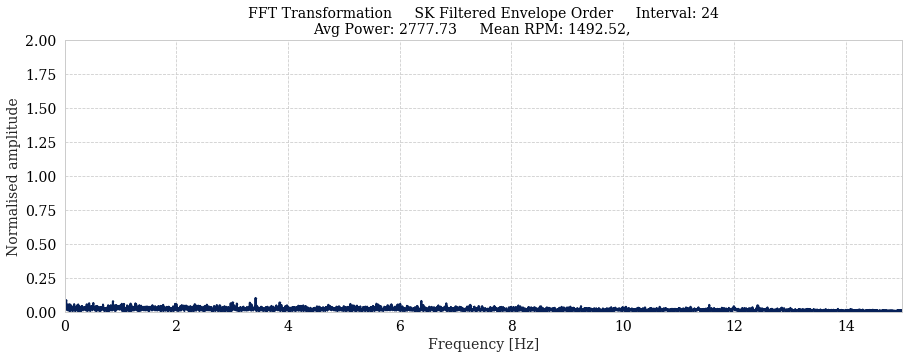

Kurtosis of 24 0.054
Center Frequency: 12000.000
Used Bandwidth in orders: 16.080


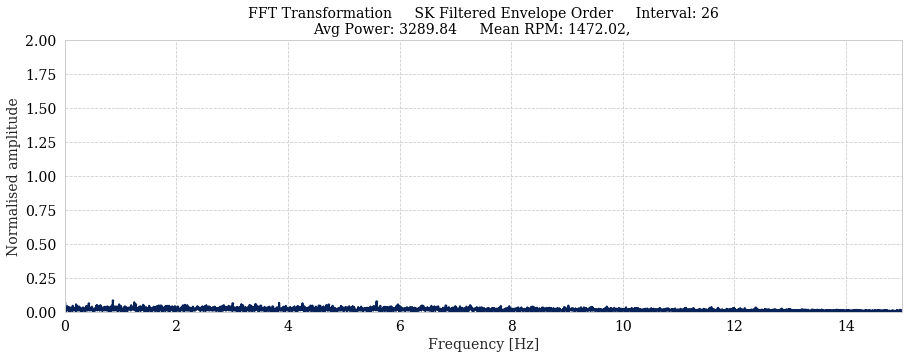

Kurtosis of 26 -0.013
Center Frequency: 12000.000
Used Bandwidth in orders: 16.304


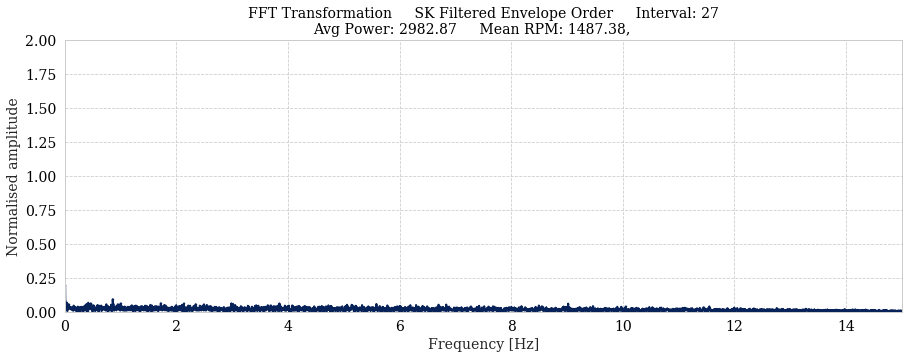

Kurtosis of 27 0.071
Center Frequency: 12000.000
Used Bandwidth in orders: 16.136


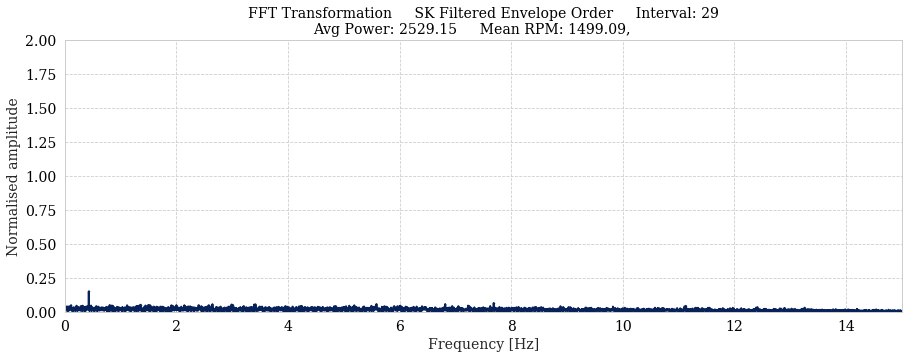

Kurtosis of 29 -0.034
Center Frequency: 12000.000
Used Bandwidth in orders: 16.010
------------------------------------------------


               FIRST 50 FINISHED


------------------------------------------------


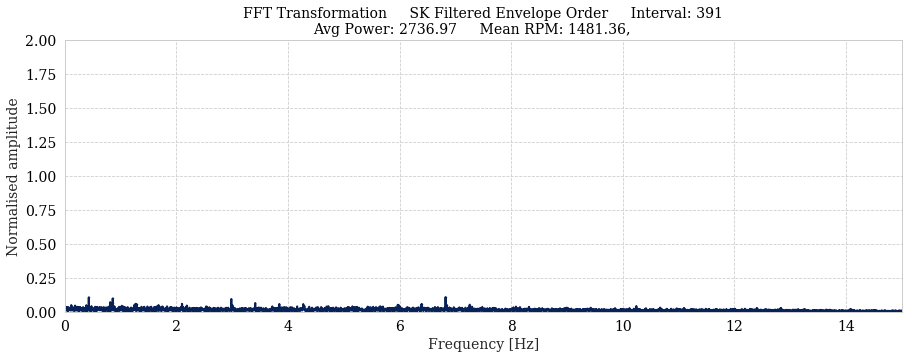

Kurtosis of 391 0.143
Center Frequency: 12000.000
Used Bandwidth in orders: 16.201


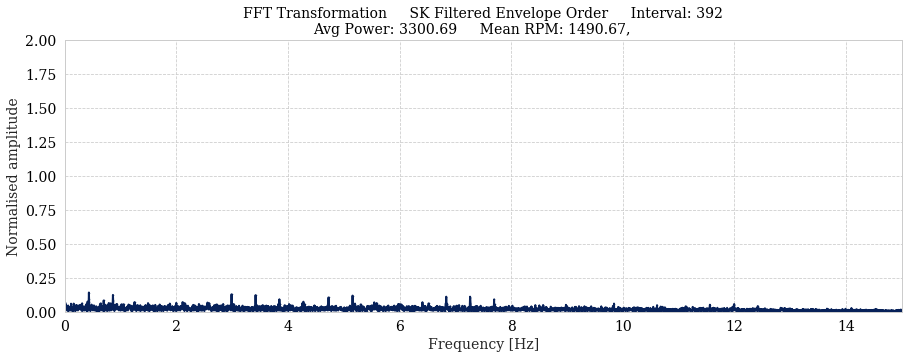

Kurtosis of 392 0.119
Center Frequency: 12000.000
Used Bandwidth in orders: 16.100


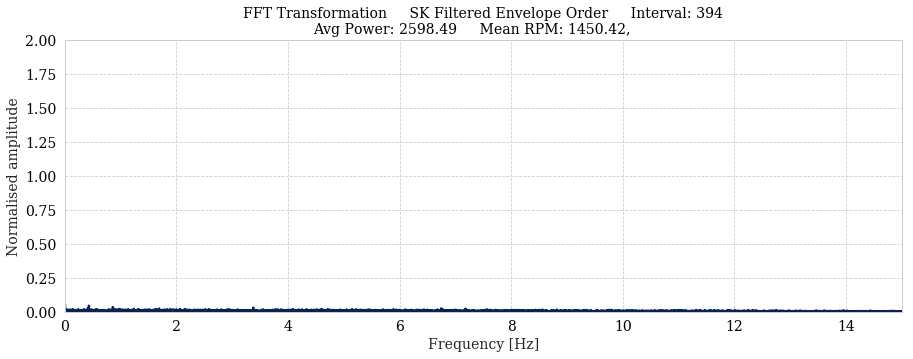

Kurtosis of 394 0.166
Center Frequency: 12000.000
Used Bandwidth in orders: 16.547


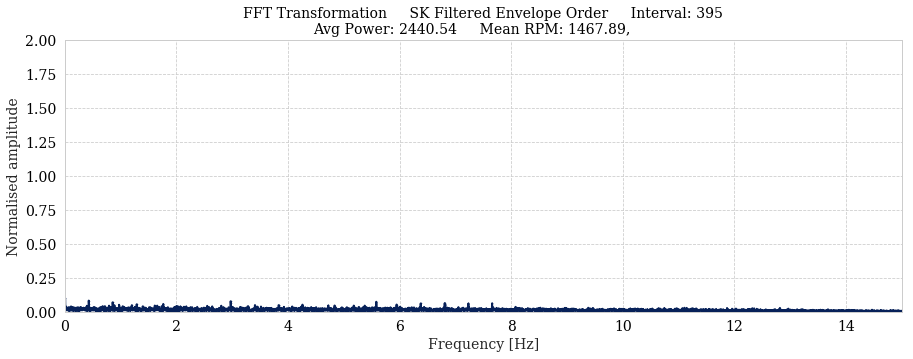

Kurtosis of 395 0.125
Center Frequency: 12000.000
Used Bandwidth in orders: 16.350


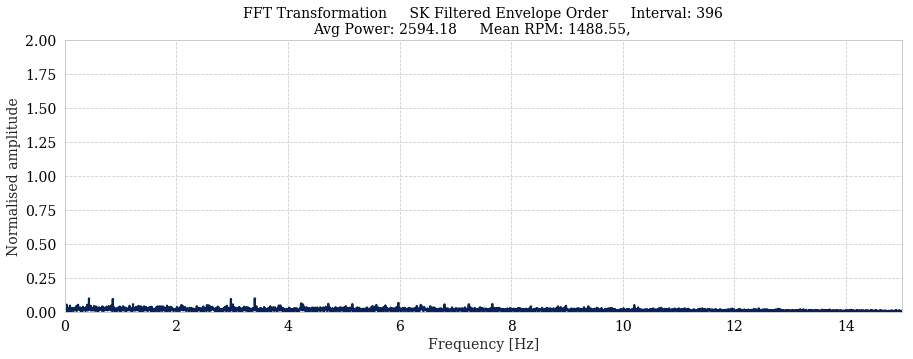

Kurtosis of 396 0.115
Center Frequency: 12000.000
Used Bandwidth in orders: 16.123


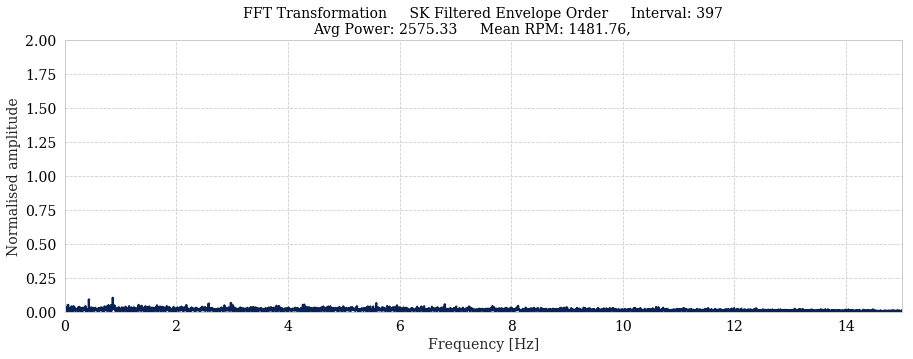

Kurtosis of 397 0.070
Center Frequency: 12000.000
Used Bandwidth in orders: 16.197


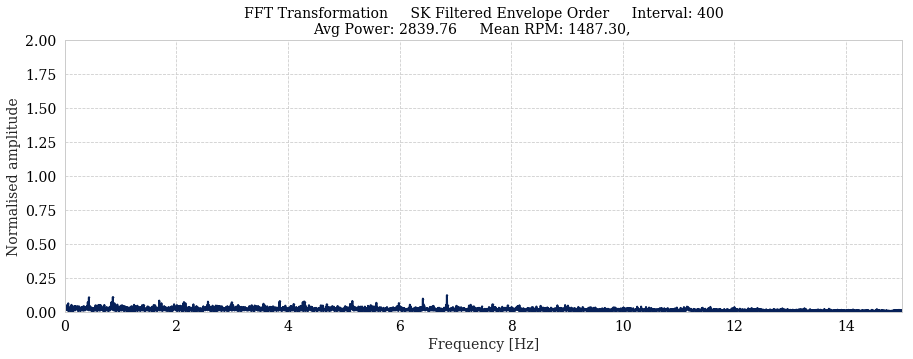

Kurtosis of 400 0.112
Center Frequency: 12000.000
Used Bandwidth in orders: 16.137


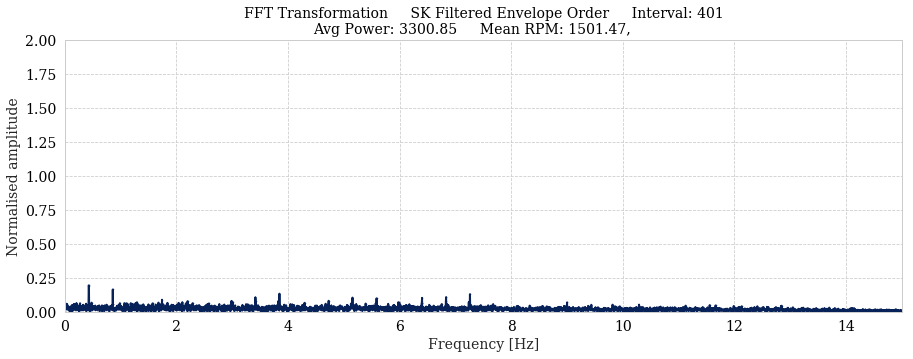

Kurtosis of 401 0.065
Center Frequency: 12000.000
Used Bandwidth in orders: 15.984


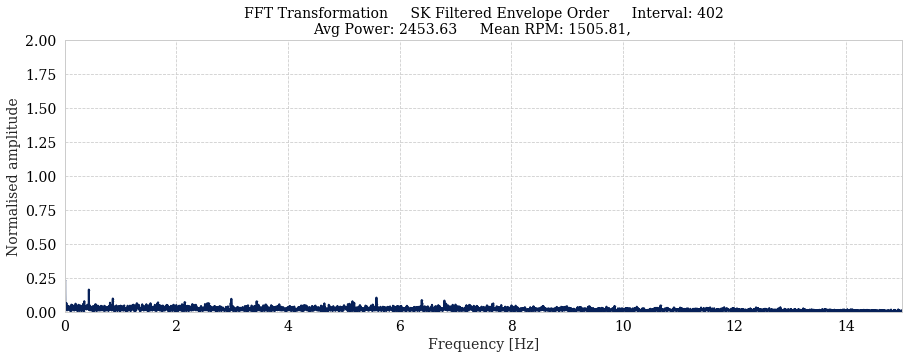

Kurtosis of 402 0.193
Center Frequency: 12000.000
Used Bandwidth in orders: 15.938


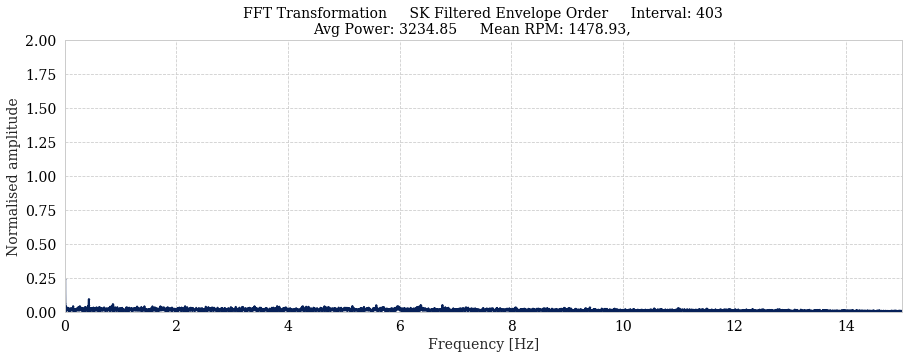

Kurtosis of 403 0.365
Center Frequency: 12000.000
Used Bandwidth in orders: 16.228


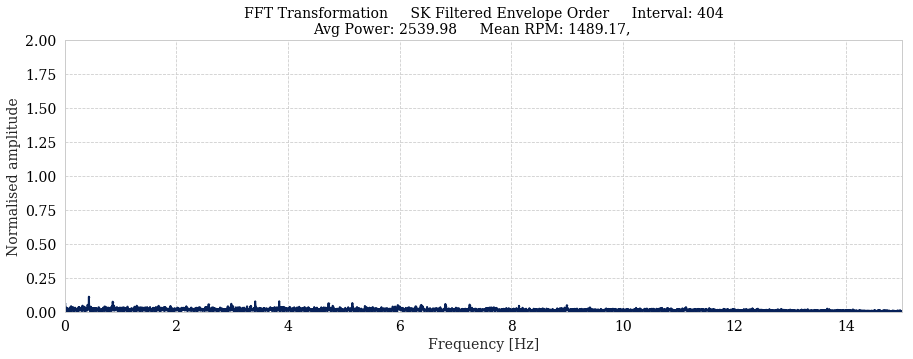

Kurtosis of 404 0.188
Center Frequency: 12000.000
Used Bandwidth in orders: 16.116


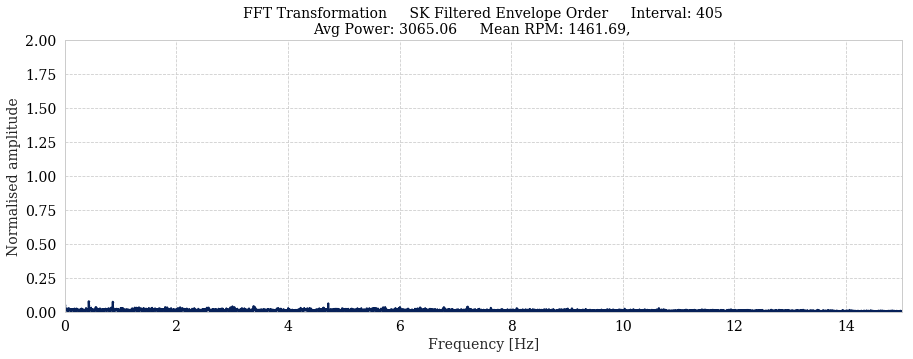

Kurtosis of 405 0.040
Center Frequency: 12000.000
Used Bandwidth in orders: 16.419


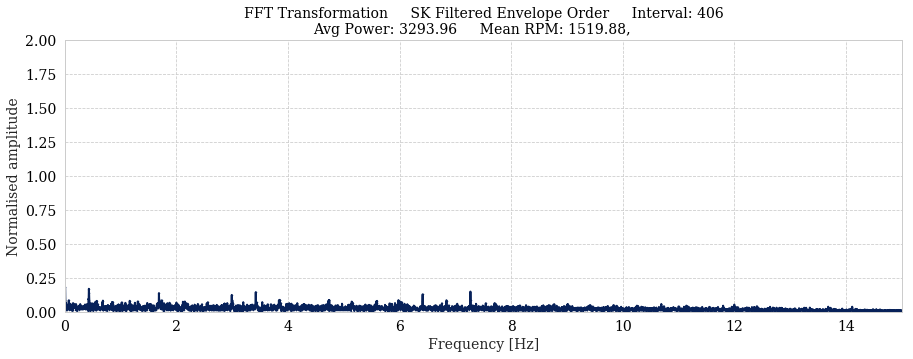

Kurtosis of 406 0.158
Center Frequency: 12000.000
Used Bandwidth in orders: 15.791


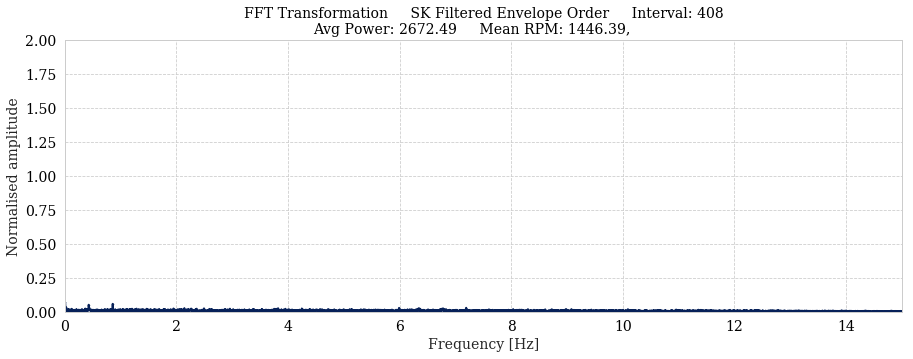

Kurtosis of 408 0.152
Center Frequency: 12000.000
Used Bandwidth in orders: 16.593


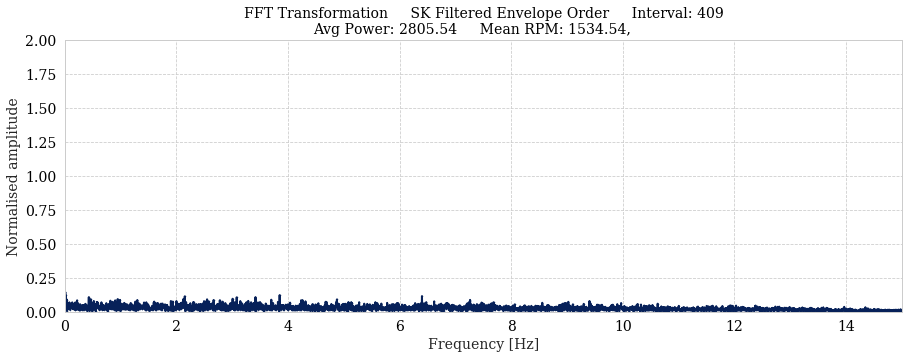

Kurtosis of 409 0.015
Center Frequency: 12000.000
Used Bandwidth in orders: 15.640


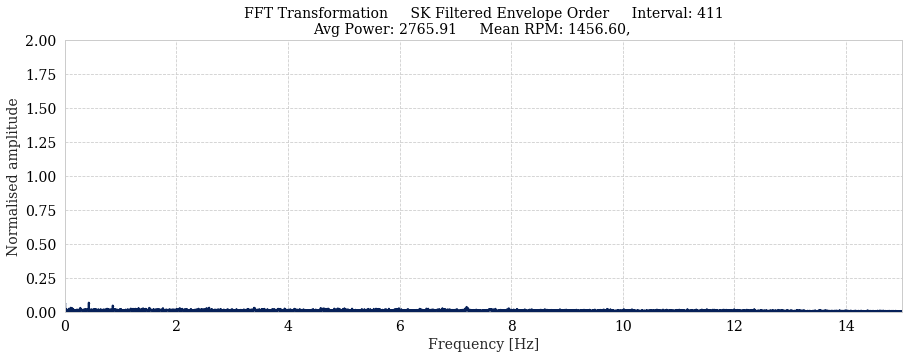

Kurtosis of 411 0.124
Center Frequency: 12000.000
Used Bandwidth in orders: 16.477


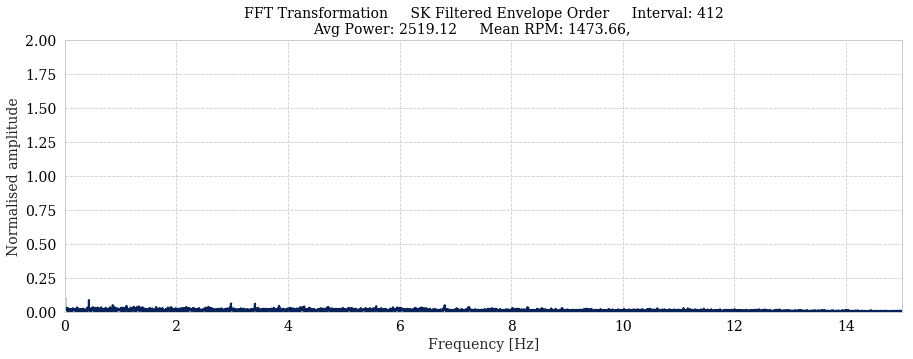

Kurtosis of 412 0.143
Center Frequency: 12000.000
Used Bandwidth in orders: 16.286


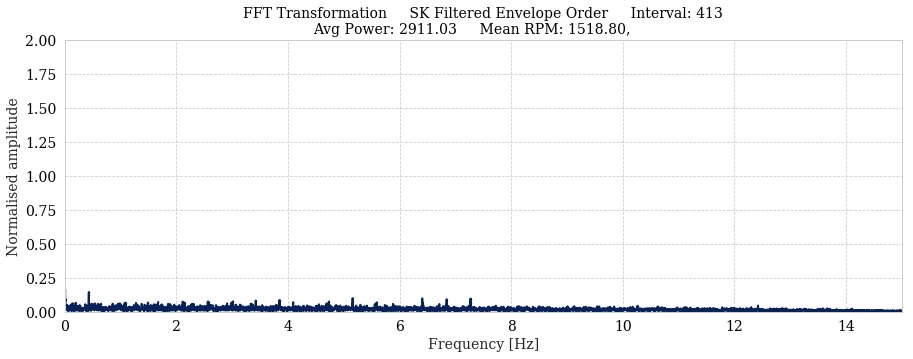

Kurtosis of 413 0.224
Center Frequency: 12000.000
Used Bandwidth in orders: 15.802


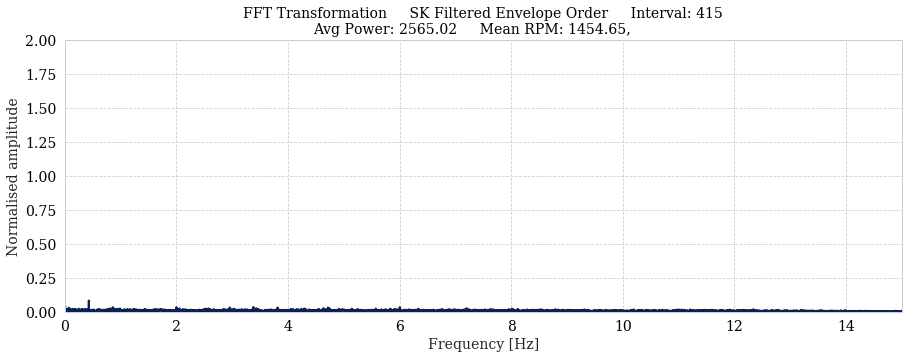

Kurtosis of 415 0.121
Center Frequency: 12000.000
Used Bandwidth in orders: 16.499


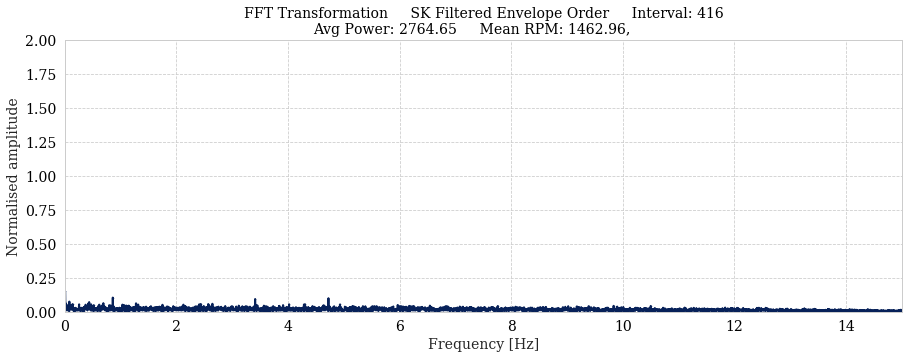

Kurtosis of 416 0.146
Center Frequency: 12000.000
Used Bandwidth in orders: 16.405


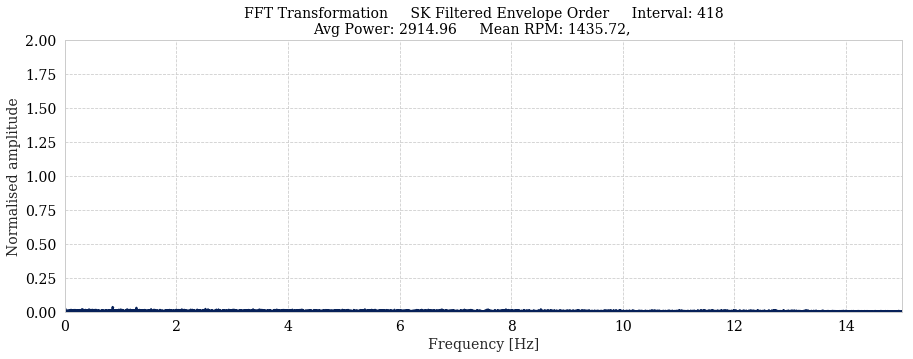

Kurtosis of 418 -0.003
Center Frequency: 12000.000
Used Bandwidth in orders: 16.716


In [61]:
interesting_intervals = [31,91,95,147,191,224,231,232,266,284,312,347]
bandpassed_signal = bandpassed_12K
#cf = 11500

for i, signal in enumerate(bandpassed_signal):
#for i in interesting_intervals:
    if avg_power[i] < 2400:
        continue
    bw = float(concated['Bandwidths'][i])
    if i == 50:
        print('------------------------------------------------\n\n')
        print('               FIRST 50 FINISHED')
        print('\n\n------------------------------------------------')
    if i< 30 or i>390: #bw < 1000 and i<50:# or (i>50 and i<60) or (i > 190 and i < 200)):
        # Plot SK filtered signal
        #plotting_methods.plot_signal(times[i][1:], bandpassed_signal[i],name='SK Filtered', interval_num=i, avg_power=avg_power[i], avg_rpm=avg_rpm[i])
        #plotting_methods.plot_fft(times[i][1:], bandpassed_signal[i], name='SK Filtered', interval_num=i, avg_power=avg_power[i], avg_rpm=avg_rpm[i])
        
        #Calcutale envelope
        highut_lp = 1000
        rectified = abs(bandpassed_signal[i])**2
        bandpass_filtered_rect_lp = filters.butter_lp_filter(rectified, highut_lp, fs, order=5)
        
        #Plot envelope signal
        one_order = avg_rpm[i]/60
        freq=[one_order]
        #plotting_methods.plot_fft(times[i][1:], bandpass_filtered_rect_lp, x_max=100,frequency_lines=freq,name='SK Filtered Envelope', interval_num=i, avg_power=avg_power[i], avg_rpm=avg_rpm[i])
        
        #Calculate Envelope Order
        try:
            x_round, resampled_envelope, x_time = resample_signals.do_cubic_resampling(times[i][1:], bandpass_filtered_rect_lp, peak_array[i], number_of_resample_points=2000)
            plotting_methods.plot_fft(x_round, resampled_envelope, x_max=15, y_max=2,frequency_lines=[], name='SK Filtered Envelope Order', interval_num=i, avg_power=avg_power[i], avg_rpm=avg_rpm[i])
        except: #If resampling fails for some reason
            print('---------------------------------------\n\n')
            print(f'              INTERVAL {i}')
            print('ENVELOPE ORDER COULD NOT BE CALCULATED!\n\n')
            print('---------------------------------------')
        
        # Print key values
        print(f'Kurtosis of {i} {kurtosis(bandpassed_signal[i]):.3f}')
        print(f'Center Frequency: {cf:.3f}')
        print(f'Used Bandwidth in orders: {400*60/avg_rpm[i]:.3f}')
